In [ ]:
!git clone https://github.com/paoloripamonti/face-recognition

In [ ]:
# !pip install keras-facenet

In [ ]:
# !wget http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz
# ! tar -xvzf /content/face-recognition/lfw-deepfunneled.tgz

In [1]:
%cd face-recognition

/content/face-recognition


In [2]:
from google.colab import drive
drive.mount('/content/drive')

MODEL_PATH = r'/content/drive/MyDrive/face_ident/lfw_model.pkl'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score

import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import random
import numpy as np
import cv2
import base64
from tqdm import tqdm
import requests
from pprint import pprint

In [4]:
from face_recognition import FaceRecognition

fr = FaceRecognition()

In [5]:
ROOT_FOLDER ='/content/face-recognition/lfw-deepfunneled'

dataset = []
for path in glob.iglob(os.path.join(ROOT_FOLDER, "**", "*.jpg")):
    person = path.split("/")[-2]
    dataset.append({"person":person, "path": path})

dataset = pd.DataFrame(dataset)
dataset = dataset.groupby("person").filter(lambda x: len(x) > 10)
dataset.head(5)

person                                               path
13  Andre_Agassi  /content/face-recognition/lfw-deepfunneled/And...
14  Andre_Agassi  /content/face-recognition/lfw-deepfunneled/And...
15  Andre_Agassi  /content/face-recognition/lfw-deepfunneled/And...
16  Andre_Agassi  /content/face-recognition/lfw-deepfunneled/And...
17  Andre_Agassi  /content/face-recognition/lfw-deepfunneled/And...

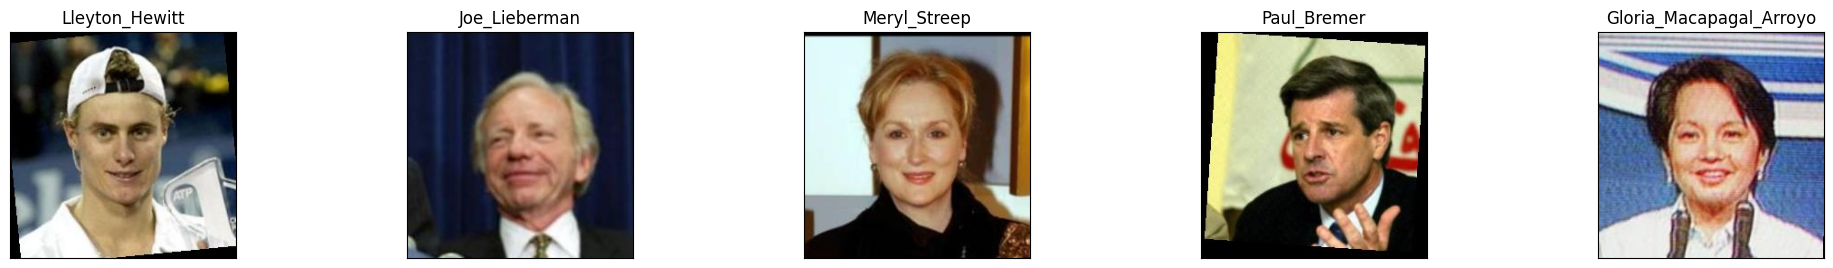

In [6]:
plt.figure(figsize=(20,10))
for i in range(5):
    idx = random.randint(0, len(dataset))
    img = plt.imread(dataset.path.iloc[idx])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(dataset.person.iloc[idx])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.25, random_state=0)

Train: 2087
Validation: 1669
Test: 418


In [9]:
fr.fit_from_dataframe(train)

1/1 [==============================] - 0s 294ms/step


  3%|▎         | 58/2087 [01:26<1:11:02,  2.10s/it]

1/1 [==============================] - 0s 157ms/step


  3%|▎         | 59/2087 [01:27<1:08:54,  2.04s/it]

1/1 [==============================] - 0s 131ms/step


  3%|▎         | 60/2087 [01:29<1:04:04,  1.90s/it]

1/1 [==============================] - 0s 154ms/step


  3%|▎         | 61/2087 [01:31<1:00:40,  1.80s/it]

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 62/2087 [01:33<1:01:47,  1.83s/it]

1/1 [==============================] - 0s 300ms/step


  3%|▎         | 63/2087 [01:35<1:11:51,  2.13s/it]

1/1 [==============================] - 0s 354ms/step


  3%|▎         | 64/2087 [01:39<1:31:51,  2.72s/it]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 65/2087 [01:42<1:26:18,  2.56s/it]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 66/2087 [01:43<1:16:03,  2.26s/it]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 67/2087 [01:44<1:04:47,  1.92s/it]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 68/2087 [01:46<57:28,  1.71s/it]  

1/1 [==============================] - 0s 109ms/step


  3%|▎         | 69/2087 [01:47<51:32,  1.53s/it]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 70/2087 [01:48<46:23,  1.38s/it]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 71/2087 [01:49<43:23,  1.29s/it]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 72/2087 [01:50<42:12,  1.26s/it]

1/1 [==============================] - 0s 113ms/step


  3%|▎         | 73/2087 [01:51<40:50,  1.22s/it]

1/1 [==============================] - 0s 103ms/step


  4%|▎         | 74/2087 [01:52<40:06,  1.20s/it]

1/1 [==============================] - 0s 165ms/step


  4%|▎         | 75/2087 [01:53<40:24,  1.20s/it]

1/1 [==============================] - 0s 172ms/step


  4%|▎         | 76/2087 [01:55<45:04,  1.34s/it]

1/1 [==============================] - 0s 157ms/step


  4%|▎         | 77/2087 [01:57<49:22,  1.47s/it]

1/1 [==============================] - 0s 109ms/step


  4%|▎         | 78/2087 [01:58<48:20,  1.44s/it]

1/1 [==============================] - 0s 104ms/step


  4%|▍         | 79/2087 [01:59<45:02,  1.35s/it]

1/1 [==============================] - 0s 102ms/step


  4%|▍         | 80/2087 [02:01<42:55,  1.28s/it]

1/1 [==============================] - 0s 94ms/step


  4%|▍         | 81/2087 [02:02<40:44,  1.22s/it]

1/1 [==============================] - 0s 96ms/step


  4%|▍         | 82/2087 [02:03<39:13,  1.17s/it]

1/1 [==============================] - 0s 115ms/step


  4%|▍         | 83/2087 [02:04<38:50,  1.16s/it]

1/1 [==============================] - 0s 113ms/step


  4%|▍         | 84/2087 [02:05<39:00,  1.17s/it]

1/1 [==============================] - 0s 106ms/step


  4%|▍         | 85/2087 [02:06<38:14,  1.15s/it]

1/1 [==============================] - 0s 95ms/step


  4%|▍         | 86/2087 [02:07<39:31,  1.18s/it]

1/1 [==============================] - 0s 158ms/step


  4%|▍         | 87/2087 [02:09<40:25,  1.21s/it]

1/1 [==============================] - 0s 161ms/step


  4%|▍         | 88/2087 [02:10<43:14,  1.30s/it]

1/1 [==============================] - 0s 199ms/step


  4%|▍         | 89/2087 [02:12<45:12,  1.36s/it]

1/1 [==============================] - 0s 106ms/step


  4%|▍         | 90/2087 [02:13<46:08,  1.39s/it]

1/1 [==============================] - 0s 108ms/step


  4%|▍         | 91/2087 [02:14<42:41,  1.28s/it]

1/1 [==============================] - 0s 101ms/step


  4%|▍         | 92/2087 [02:15<42:48,  1.29s/it]

1/1 [==============================] - 0s 101ms/step


  4%|▍         | 93/2087 [02:16<40:43,  1.23s/it]

1/1 [==============================] - 0s 102ms/step


  5%|▍         | 94/2087 [02:18<39:43,  1.20s/it]

1/1 [==============================] - 0s 108ms/step


  5%|▍         | 95/2087 [02:19<38:30,  1.16s/it]

1/1 [==============================] - 0s 112ms/step


  5%|▍         | 96/2087 [02:20<37:59,  1.14s/it]

1/1 [==============================] - 0s 107ms/step


  5%|▍         | 97/2087 [02:21<38:14,  1.15s/it]

1/1 [==============================] - 0s 101ms/step


  5%|▍         | 98/2087 [02:22<39:43,  1.20s/it]

1/1 [==============================] - 0s 175ms/step


  5%|▍         | 99/2087 [02:24<41:17,  1.25s/it]

1/1 [==============================] - 0s 184ms/step


  5%|▍         | 100/2087 [02:25<46:56,  1.42s/it]

1/1 [==============================] - 0s 173ms/step


  5%|▍         | 101/2087 [02:27<47:49,  1.44s/it]

1/1 [==============================] - 0s 101ms/step


  5%|▍         | 102/2087 [02:28<46:09,  1.40s/it]

1/1 [==============================] - 0s 98ms/step


  5%|▍         | 103/2087 [02:29<43:22,  1.31s/it]

1/1 [==============================] - 0s 132ms/step


  5%|▍         | 104/2087 [02:31<48:50,  1.48s/it]

1/1 [==============================] - 0s 116ms/step


  5%|▌         | 105/2087 [02:33<47:57,  1.45s/it]

1/1 [==============================] - 0s 123ms/step


  5%|▌         | 106/2087 [02:34<46:21,  1.40s/it]

1/1 [==============================] - 0s 116ms/step


  5%|▌         | 107/2087 [02:35<46:20,  1.40s/it]

1/1 [==============================] - 0s 112ms/step


  5%|▌         | 108/2087 [02:37<44:37,  1.35s/it]

1/1 [==============================] - 0s 173ms/step


  5%|▌         | 109/2087 [02:38<43:57,  1.33s/it]

1/1 [==============================] - 0s 199ms/step


  5%|▌         | 110/2087 [02:40<47:22,  1.44s/it]

1/1 [==============================] - 0s 174ms/step


  5%|▌         | 111/2087 [02:41<50:44,  1.54s/it]

1/1 [==============================] - 0s 115ms/step


  5%|▌         | 112/2087 [02:43<49:37,  1.51s/it]

1/1 [==============================] - 0s 99ms/step


  5%|▌         | 113/2087 [02:44<46:29,  1.41s/it]

1/1 [==============================] - 0s 104ms/step


  5%|▌         | 114/2087 [02:45<43:08,  1.31s/it]

1/1 [==============================] - 0s 119ms/step


  6%|▌         | 115/2087 [02:46<41:04,  1.25s/it]

1/1 [==============================] - 0s 101ms/step


  6%|▌         | 116/2087 [02:47<39:48,  1.21s/it]

1/1 [==============================] - 0s 115ms/step


  6%|▌         | 117/2087 [02:48<39:14,  1.20s/it]

1/1 [==============================] - 0s 105ms/step


  6%|▌         | 118/2087 [02:49<37:47,  1.15s/it]

1/1 [==============================] - 0s 104ms/step


  6%|▌         | 119/2087 [02:51<37:31,  1.14s/it]

1/1 [==============================] - 0s 104ms/step


  6%|▌         | 120/2087 [02:52<37:19,  1.14s/it]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 121/2087 [02:53<41:20,  1.26s/it]

1/1 [==============================] - 0s 187ms/step


  6%|▌         | 122/2087 [02:55<44:52,  1.37s/it]

1/1 [==============================] - 0s 161ms/step


  6%|▌         | 123/2087 [02:56<47:13,  1.44s/it]

1/1 [==============================] - 0s 102ms/step


  6%|▌         | 124/2087 [02:58<45:21,  1.39s/it]

1/1 [==============================] - 0s 100ms/step


  6%|▌         | 125/2087 [02:59<43:08,  1.32s/it]

1/1 [==============================] - 0s 102ms/step


  6%|▌         | 126/2087 [03:00<41:07,  1.26s/it]

1/1 [==============================] - 0s 118ms/step


  6%|▌         | 127/2087 [03:01<40:21,  1.24s/it]

1/1 [==============================] - 0s 117ms/step


  6%|▌         | 128/2087 [03:02<39:30,  1.21s/it]

1/1 [==============================] - 0s 107ms/step


  6%|▌         | 129/2087 [03:03<38:30,  1.18s/it]

1/1 [==============================] - 0s 103ms/step


  6%|▌         | 130/2087 [03:05<38:07,  1.17s/it]

1/1 [==============================] - 0s 98ms/step


  6%|▋         | 131/2087 [03:06<37:02,  1.14s/it]

1/1 [==============================] - 0s 103ms/step


  6%|▋         | 132/2087 [03:07<37:17,  1.14s/it]

1/1 [==============================] - 0s 201ms/step


  6%|▋         | 133/2087 [03:08<40:52,  1.25s/it]

1/1 [==============================] - 0s 169ms/step


  6%|▋         | 134/2087 [03:10<44:13,  1.36s/it]

1/1 [==============================] - 0s 228ms/step


  6%|▋         | 135/2087 [03:12<48:27,  1.49s/it]

1/1 [==============================] - 0s 99ms/step


  7%|▋         | 136/2087 [03:13<47:16,  1.45s/it]

1/1 [==============================] - 0s 128ms/step


  7%|▋         | 137/2087 [03:14<44:13,  1.36s/it]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 138/2087 [03:15<42:10,  1.30s/it]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 139/2087 [03:16<40:09,  1.24s/it]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 140/2087 [03:18<39:04,  1.20s/it]

1/1 [==============================] - 0s 109ms/step


  7%|▋         | 141/2087 [03:19<37:53,  1.17s/it]

1/1 [==============================] - 0s 99ms/step


  7%|▋         | 142/2087 [03:20<37:42,  1.16s/it]

1/1 [==============================] - 0s 102ms/step


  7%|▋         | 143/2087 [03:21<37:05,  1.14s/it]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 144/2087 [03:22<38:15,  1.18s/it]

1/1 [==============================] - 0s 187ms/step


  7%|▋         | 145/2087 [03:24<42:47,  1.32s/it]

1/1 [==============================] - 0s 180ms/step


  7%|▋         | 146/2087 [03:26<47:20,  1.46s/it]

1/1 [==============================] - 0s 108ms/step


  7%|▋         | 147/2087 [03:27<47:06,  1.46s/it]

1/1 [==============================] - 0s 117ms/step


  7%|▋         | 148/2087 [03:28<44:17,  1.37s/it]

1/1 [==============================] - 0s 103ms/step


  7%|▋         | 149/2087 [03:29<42:47,  1.32s/it]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 150/2087 [03:31<40:37,  1.26s/it]

1/1 [==============================] - 0s 106ms/step


  7%|▋         | 151/2087 [03:32<39:29,  1.22s/it]

1/1 [==============================] - 0s 101ms/step


  7%|▋         | 152/2087 [03:33<39:22,  1.22s/it]

1/1 [==============================] - 0s 106ms/step


  7%|▋         | 153/2087 [03:34<38:40,  1.20s/it]

1/1 [==============================] - 0s 99ms/step


  7%|▋         | 154/2087 [03:35<37:35,  1.17s/it]

1/1 [==============================] - 0s 111ms/step


  7%|▋         | 155/2087 [03:36<37:27,  1.16s/it]

1/1 [==============================] - 0s 163ms/step


  7%|▋         | 156/2087 [03:38<41:04,  1.28s/it]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 157/2087 [03:40<44:52,  1.39s/it]

1/1 [==============================] - 0s 187ms/step


  8%|▊         | 158/2087 [03:41<47:27,  1.48s/it]

1/1 [==============================] - 0s 118ms/step


  8%|▊         | 159/2087 [03:43<45:36,  1.42s/it]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 160/2087 [03:44<42:23,  1.32s/it]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 161/2087 [03:45<44:09,  1.38s/it]

1/1 [==============================] - 0s 105ms/step


  8%|▊         | 162/2087 [03:46<42:01,  1.31s/it]

1/1 [==============================] - 0s 106ms/step


  8%|▊         | 163/2087 [03:47<40:18,  1.26s/it]

1/1 [==============================] - 0s 115ms/step


  8%|▊         | 164/2087 [03:48<38:39,  1.21s/it]

1/1 [==============================] - 0s 103ms/step


  8%|▊         | 165/2087 [03:50<38:11,  1.19s/it]

1/1 [==============================] - 0s 110ms/step


  8%|▊         | 166/2087 [03:51<37:11,  1.16s/it]

1/1 [==============================] - 0s 168ms/step


  8%|▊         | 167/2087 [03:52<37:32,  1.17s/it]

1/1 [==============================] - 0s 156ms/step


  8%|▊         | 168/2087 [03:53<41:17,  1.29s/it]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 169/2087 [03:55<46:07,  1.44s/it]

1/1 [==============================] - 0s 112ms/step


  8%|▊         | 170/2087 [03:57<46:34,  1.46s/it]

1/1 [==============================] - 0s 121ms/step


  8%|▊         | 171/2087 [03:58<43:59,  1.38s/it]

1/1 [==============================] - 0s 112ms/step


  8%|▊         | 172/2087 [03:59<41:30,  1.30s/it]

1/1 [==============================] - 0s 104ms/step


  8%|▊         | 173/2087 [04:00<40:48,  1.28s/it]

1/1 [==============================] - 0s 118ms/step


  8%|▊         | 174/2087 [04:01<39:21,  1.23s/it]

1/1 [==============================] - 0s 111ms/step


  8%|▊         | 175/2087 [04:03<37:40,  1.18s/it]

1/1 [==============================] - 0s 95ms/step


  8%|▊         | 176/2087 [04:04<36:44,  1.15s/it]

1/1 [==============================] - 0s 109ms/step


  8%|▊         | 177/2087 [04:05<36:56,  1.16s/it]

1/1 [==============================] - 0s 107ms/step


  9%|▊         | 178/2087 [04:06<37:23,  1.18s/it]

1/1 [==============================] - 0s 185ms/step


  9%|▊         | 179/2087 [04:08<41:53,  1.32s/it]

1/1 [==============================] - 0s 208ms/step


  9%|▊         | 180/2087 [04:09<46:56,  1.48s/it]

1/1 [==============================] - 0s 118ms/step


  9%|▊         | 181/2087 [04:12<56:04,  1.77s/it]

1/1 [==============================] - 0s 122ms/step


  9%|▊         | 182/2087 [04:13<53:58,  1.70s/it]

1/1 [==============================] - 0s 123ms/step


  9%|▉         | 183/2087 [04:15<51:37,  1.63s/it]

1/1 [==============================] - 0s 111ms/step


  9%|▉         | 184/2087 [04:16<48:43,  1.54s/it]

1/1 [==============================] - 0s 99ms/step


  9%|▉         | 185/2087 [04:18<45:59,  1.45s/it]

1/1 [==============================] - 0s 111ms/step


  9%|▉         | 186/2087 [04:19<43:38,  1.38s/it]

1/1 [==============================] - 0s 98ms/step


  9%|▉         | 187/2087 [04:20<42:19,  1.34s/it]

1/1 [==============================] - 0s 125ms/step


  9%|▉         | 188/2087 [04:21<40:18,  1.27s/it]

1/1 [==============================] - 0s 173ms/step


  9%|▉         | 189/2087 [04:23<43:25,  1.37s/it]

1/1 [==============================] - 0s 170ms/step


  9%|▉         | 190/2087 [04:25<49:16,  1.56s/it]

1/1 [==============================] - 0s 117ms/step


  9%|▉         | 191/2087 [04:26<49:00,  1.55s/it]

1/1 [==============================] - 0s 103ms/step


  9%|▉         | 192/2087 [04:27<45:00,  1.43s/it]

1/1 [==============================] - 0s 99ms/step


  9%|▉         | 193/2087 [04:28<42:23,  1.34s/it]

1/1 [==============================] - 0s 109ms/step


  9%|▉         | 194/2087 [04:30<41:09,  1.30s/it]

1/1 [==============================] - 0s 104ms/step


  9%|▉         | 195/2087 [04:31<39:31,  1.25s/it]

1/1 [==============================] - 0s 101ms/step


  9%|▉         | 196/2087 [04:32<39:04,  1.24s/it]

1/1 [==============================] - 0s 136ms/step


  9%|▉         | 197/2087 [04:33<38:25,  1.22s/it]

1/1 [==============================] - 0s 100ms/step


  9%|▉         | 198/2087 [04:34<37:32,  1.19s/it]

1/1 [==============================] - 0s 104ms/step


 10%|▉         | 199/2087 [04:36<37:28,  1.19s/it]

1/1 [==============================] - 0s 176ms/step


 10%|▉         | 200/2087 [04:37<39:51,  1.27s/it]

1/1 [==============================] - 0s 172ms/step


 10%|▉         | 201/2087 [04:39<44:39,  1.42s/it]

1/1 [==============================] - 0s 173ms/step


 10%|▉         | 202/2087 [04:40<47:04,  1.50s/it]

1/1 [==============================] - 0s 104ms/step


 10%|▉         | 203/2087 [04:42<48:35,  1.55s/it]

1/1 [==============================] - 0s 113ms/step


 10%|▉         | 204/2087 [04:43<45:05,  1.44s/it]

1/1 [==============================] - 0s 106ms/step


 10%|▉         | 205/2087 [04:44<42:29,  1.35s/it]

1/1 [==============================] - 0s 103ms/step


 10%|▉         | 206/2087 [04:46<40:25,  1.29s/it]

1/1 [==============================] - 0s 101ms/step


 10%|▉         | 207/2087 [04:47<41:11,  1.31s/it]

1/1 [==============================] - 0s 104ms/step


 10%|▉         | 208/2087 [04:48<39:29,  1.26s/it]

1/1 [==============================] - 0s 117ms/step


 10%|█         | 209/2087 [04:49<37:57,  1.21s/it]

1/1 [==============================] - 0s 101ms/step


 10%|█         | 210/2087 [04:50<36:50,  1.18s/it]

1/1 [==============================] - 0s 169ms/step


 10%|█         | 211/2087 [04:52<39:31,  1.26s/it]

1/1 [==============================] - 0s 160ms/step


 10%|█         | 212/2087 [04:53<42:35,  1.36s/it]

1/1 [==============================] - 0s 165ms/step


 10%|█         | 213/2087 [04:55<43:48,  1.40s/it]

1/1 [==============================] - 0s 94ms/step


 10%|█         | 214/2087 [04:56<44:16,  1.42s/it]

1/1 [==============================] - 0s 96ms/step


 10%|█         | 215/2087 [04:57<41:40,  1.34s/it]

1/1 [==============================] - 0s 113ms/step


 10%|█         | 216/2087 [04:59<39:27,  1.27s/it]

1/1 [==============================] - 0s 98ms/step


 10%|█         | 217/2087 [05:00<37:37,  1.21s/it]

1/1 [==============================] - 0s 106ms/step


 10%|█         | 218/2087 [05:01<36:54,  1.18s/it]

1/1 [==============================] - 0s 103ms/step


 10%|█         | 219/2087 [05:02<36:46,  1.18s/it]

1/1 [==============================] - 0s 104ms/step


 11%|█         | 220/2087 [05:03<35:55,  1.15s/it]

1/1 [==============================] - 0s 106ms/step


 11%|█         | 221/2087 [05:04<35:06,  1.13s/it]

1/1 [==============================] - 0s 103ms/step


 11%|█         | 222/2087 [05:05<35:34,  1.14s/it]

1/1 [==============================] - 0s 172ms/step


 11%|█         | 223/2087 [05:07<37:29,  1.21s/it]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 224/2087 [05:08<42:03,  1.35s/it]

1/1 [==============================] - 0s 165ms/step


 11%|█         | 225/2087 [05:10<44:16,  1.43s/it]

1/1 [==============================] - 0s 95ms/step


 11%|█         | 226/2087 [05:11<44:08,  1.42s/it]

1/1 [==============================] - 0s 108ms/step


 11%|█         | 227/2087 [05:13<44:24,  1.43s/it]

1/1 [==============================] - 0s 101ms/step


 11%|█         | 228/2087 [05:14<44:22,  1.43s/it]

1/1 [==============================] - 0s 94ms/step


 11%|█         | 229/2087 [05:16<43:38,  1.41s/it]

1/1 [==============================] - 0s 101ms/step


 11%|█         | 230/2087 [05:17<40:34,  1.31s/it]

1/1 [==============================] - 0s 104ms/step


 11%|█         | 231/2087 [05:18<38:34,  1.25s/it]

1/1 [==============================] - 0s 110ms/step


 11%|█         | 232/2087 [05:19<37:56,  1.23s/it]

1/1 [==============================] - 0s 99ms/step


 11%|█         | 233/2087 [05:20<36:56,  1.20s/it]

1/1 [==============================] - 0s 179ms/step


 11%|█         | 234/2087 [05:21<38:20,  1.24s/it]

1/1 [==============================] - 0s 160ms/step


 11%|█▏        | 235/2087 [05:23<45:40,  1.48s/it]

1/1 [==============================] - 0s 161ms/step


 11%|█▏        | 236/2087 [05:25<46:14,  1.50s/it]

1/1 [==============================] - 0s 97ms/step


 11%|█▏        | 237/2087 [05:26<45:55,  1.49s/it]

1/1 [==============================] - 0s 99ms/step


 11%|█▏        | 238/2087 [05:28<43:02,  1.40s/it]

1/1 [==============================] - 0s 97ms/step


 11%|█▏        | 239/2087 [05:29<40:48,  1.33s/it]

1/1 [==============================] - 0s 107ms/step


 11%|█▏        | 240/2087 [05:30<38:41,  1.26s/it]

1/1 [==============================] - 0s 98ms/step


 12%|█▏        | 241/2087 [05:31<40:01,  1.30s/it]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 242/2087 [05:32<38:55,  1.27s/it]

1/1 [==============================] - 0s 103ms/step


 12%|█▏        | 243/2087 [05:34<37:39,  1.23s/it]

1/1 [==============================] - 0s 104ms/step


 12%|█▏        | 244/2087 [05:35<36:43,  1.20s/it]

1/1 [==============================] - 0s 136ms/step


 12%|█▏        | 245/2087 [05:36<36:25,  1.19s/it]

1/1 [==============================] - 0s 181ms/step


 12%|█▏        | 246/2087 [05:38<40:26,  1.32s/it]

1/1 [==============================] - 0s 177ms/step


 12%|█▏        | 247/2087 [05:39<44:00,  1.44s/it]

1/1 [==============================] - 0s 182ms/step


 12%|█▏        | 248/2087 [05:41<45:34,  1.49s/it]

1/1 [==============================] - 0s 115ms/step


 12%|█▏        | 249/2087 [05:42<42:15,  1.38s/it]

1/1 [==============================] - 0s 108ms/step


 12%|█▏        | 250/2087 [05:43<39:36,  1.29s/it]

1/1 [==============================] - 0s 104ms/step


 12%|█▏        | 251/2087 [05:44<37:41,  1.23s/it]

1/1 [==============================] - 0s 102ms/step


 12%|█▏        | 252/2087 [05:45<37:07,  1.21s/it]

1/1 [==============================] - 0s 108ms/step


 12%|█▏        | 253/2087 [05:47<37:15,  1.22s/it]

1/1 [==============================] - 0s 106ms/step


 12%|█▏        | 254/2087 [05:48<36:46,  1.20s/it]

1/1 [==============================] - 0s 104ms/step


 12%|█▏        | 255/2087 [05:49<40:23,  1.32s/it]

1/1 [==============================] - 0s 99ms/step


 12%|█▏        | 256/2087 [05:50<38:47,  1.27s/it]

1/1 [==============================] - 0s 173ms/step


 12%|█▏        | 257/2087 [05:52<42:06,  1.38s/it]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 258/2087 [05:55<53:53,  1.77s/it]

1/1 [==============================] - 0s 120ms/step


 12%|█▏        | 259/2087 [05:56<52:36,  1.73s/it]

1/1 [==============================] - 0s 120ms/step


 12%|█▏        | 260/2087 [05:58<50:14,  1.65s/it]

1/1 [==============================] - 0s 134ms/step


 13%|█▎        | 261/2087 [05:59<47:32,  1.56s/it]

1/1 [==============================] - 0s 120ms/step


 13%|█▎        | 262/2087 [06:01<45:37,  1.50s/it]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 263/2087 [06:02<43:50,  1.44s/it]

1/1 [==============================] - 0s 109ms/step


 13%|█▎        | 264/2087 [06:03<41:16,  1.36s/it]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 265/2087 [06:04<41:35,  1.37s/it]

1/1 [==============================] - 0s 118ms/step


 13%|█▎        | 266/2087 [06:06<39:01,  1.29s/it]

1/1 [==============================] - 0s 166ms/step


 13%|█▎        | 267/2087 [06:07<41:16,  1.36s/it]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 268/2087 [06:09<46:17,  1.53s/it]

1/1 [==============================] - 0s 103ms/step


 13%|█▎        | 269/2087 [06:11<49:46,  1.64s/it]

1/1 [==============================] - 0s 101ms/step


 13%|█▎        | 270/2087 [06:12<45:13,  1.49s/it]

1/1 [==============================] - 0s 118ms/step


 13%|█▎        | 271/2087 [06:13<41:58,  1.39s/it]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 272/2087 [06:14<40:22,  1.33s/it]

1/1 [==============================] - 0s 103ms/step


 13%|█▎        | 273/2087 [06:16<41:22,  1.37s/it]

1/1 [==============================] - 0s 104ms/step


 13%|█▎        | 274/2087 [06:17<39:26,  1.31s/it]

1/1 [==============================] - 0s 114ms/step


 13%|█▎        | 275/2087 [06:18<38:15,  1.27s/it]

1/1 [==============================] - 0s 113ms/step


 13%|█▎        | 276/2087 [06:19<37:51,  1.25s/it]

1/1 [==============================] - 0s 107ms/step


 13%|█▎        | 277/2087 [06:21<36:44,  1.22s/it]

1/1 [==============================] - 0s 161ms/step


 13%|█▎        | 278/2087 [06:23<44:59,  1.49s/it]

1/1 [==============================] - 0s 165ms/step


 13%|█▎        | 279/2087 [06:24<45:53,  1.52s/it]

1/1 [==============================] - 0s 113ms/step


 13%|█▎        | 280/2087 [06:26<46:58,  1.56s/it]

1/1 [==============================] - 0s 116ms/step


 13%|█▎        | 281/2087 [06:27<43:14,  1.44s/it]

1/1 [==============================] - 0s 108ms/step


 14%|█▎        | 282/2087 [06:28<40:25,  1.34s/it]

1/1 [==============================] - 0s 100ms/step


 14%|█▎        | 283/2087 [06:29<38:51,  1.29s/it]

1/1 [==============================] - 0s 99ms/step


 14%|█▎        | 284/2087 [06:31<37:32,  1.25s/it]

1/1 [==============================] - 0s 100ms/step


 14%|█▎        | 285/2087 [06:32<39:42,  1.32s/it]

1/1 [==============================] - 0s 117ms/step


 14%|█▎        | 286/2087 [06:33<38:08,  1.27s/it]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 287/2087 [06:34<37:08,  1.24s/it]

1/1 [==============================] - 0s 95ms/step


 14%|█▍        | 288/2087 [06:35<36:35,  1.22s/it]

1/1 [==============================] - 0s 170ms/step


 14%|█▍        | 289/2087 [06:37<39:08,  1.31s/it]

1/1 [==============================] - 0s 163ms/step


 14%|█▍        | 290/2087 [06:39<41:47,  1.40s/it]

1/1 [==============================] - 0s 164ms/step


 14%|█▍        | 291/2087 [06:40<44:27,  1.49s/it]

1/1 [==============================] - 0s 111ms/step


 14%|█▍        | 292/2087 [06:42<43:08,  1.44s/it]

1/1 [==============================] - 0s 116ms/step


 14%|█▍        | 293/2087 [06:43<40:37,  1.36s/it]

1/1 [==============================] - 0s 102ms/step


 14%|█▍        | 294/2087 [06:44<38:37,  1.29s/it]

1/1 [==============================] - 0s 114ms/step


 14%|█▍        | 295/2087 [06:45<37:13,  1.25s/it]

1/1 [==============================] - 0s 105ms/step


 14%|█▍        | 296/2087 [06:46<36:05,  1.21s/it]

1/1 [==============================] - 0s 103ms/step


 14%|█▍        | 297/2087 [06:47<36:27,  1.22s/it]

1/1 [==============================] - 0s 108ms/step


 14%|█▍        | 298/2087 [06:49<35:45,  1.20s/it]

1/1 [==============================] - 0s 106ms/step


 14%|█▍        | 299/2087 [06:50<37:40,  1.26s/it]

1/1 [==============================] - 0s 201ms/step


 14%|█▍        | 300/2087 [06:51<39:35,  1.33s/it]

1/1 [==============================] - 0s 157ms/step


 14%|█▍        | 301/2087 [06:53<41:23,  1.39s/it]

1/1 [==============================] - 0s 184ms/step


 14%|█▍        | 302/2087 [06:55<44:40,  1.50s/it]

1/1 [==============================] - 0s 111ms/step


 15%|█▍        | 303/2087 [06:56<44:05,  1.48s/it]

1/1 [==============================] - 0s 118ms/step


 15%|█▍        | 304/2087 [06:58<43:27,  1.46s/it]

1/1 [==============================] - 0s 106ms/step


 15%|█▍        | 305/2087 [06:59<41:07,  1.38s/it]

1/1 [==============================] - 0s 108ms/step


 15%|█▍        | 306/2087 [07:00<39:09,  1.32s/it]

1/1 [==============================] - 0s 104ms/step


 15%|█▍        | 307/2087 [07:01<36:56,  1.25s/it]

1/1 [==============================] - 0s 111ms/step


 15%|█▍        | 308/2087 [07:02<36:27,  1.23s/it]

1/1 [==============================] - 0s 108ms/step


 15%|█▍        | 309/2087 [07:03<36:11,  1.22s/it]

1/1 [==============================] - 0s 111ms/step


 15%|█▍        | 310/2087 [07:05<35:28,  1.20s/it]

1/1 [==============================] - 0s 117ms/step


 15%|█▍        | 311/2087 [07:06<35:13,  1.19s/it]

1/1 [==============================] - 0s 180ms/step


 15%|█▍        | 312/2087 [07:08<40:23,  1.37s/it]

1/1 [==============================] - 0s 175ms/step


 15%|█▍        | 313/2087 [07:09<45:06,  1.53s/it]

1/1 [==============================] - 0s 100ms/step


 15%|█▌        | 314/2087 [07:11<47:35,  1.61s/it]

1/1 [==============================] - 0s 99ms/step


 15%|█▌        | 315/2087 [07:12<43:11,  1.46s/it]

1/1 [==============================] - 0s 93ms/step


 15%|█▌        | 316/2087 [07:14<40:34,  1.37s/it]

1/1 [==============================] - 0s 96ms/step


 15%|█▌        | 317/2087 [07:15<37:51,  1.28s/it]

1/1 [==============================] - 0s 116ms/step


 15%|█▌        | 318/2087 [07:16<36:30,  1.24s/it]

1/1 [==============================] - 0s 109ms/step


 15%|█▌        | 319/2087 [07:17<35:33,  1.21s/it]

1/1 [==============================] - 0s 102ms/step


 15%|█▌        | 320/2087 [07:18<34:53,  1.18s/it]

1/1 [==============================] - 0s 99ms/step


 15%|█▌        | 321/2087 [07:19<36:52,  1.25s/it]

1/1 [==============================] - 0s 110ms/step


 15%|█▌        | 322/2087 [07:21<36:20,  1.24s/it]

1/1 [==============================] - 0s 211ms/step


 15%|█▌        | 323/2087 [07:22<39:24,  1.34s/it]

1/1 [==============================] - 0s 159ms/step


 16%|█▌        | 324/2087 [07:25<51:48,  1.76s/it]

1/1 [==============================] - 0s 98ms/step


 16%|█▌        | 325/2087 [07:27<50:21,  1.71s/it]

1/1 [==============================] - 0s 114ms/step


 16%|█▌        | 326/2087 [07:28<45:28,  1.55s/it]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 327/2087 [07:29<42:03,  1.43s/it]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 328/2087 [07:30<39:48,  1.36s/it]

1/1 [==============================] - 0s 108ms/step


 16%|█▌        | 329/2087 [07:31<38:26,  1.31s/it]

1/1 [==============================] - 0s 95ms/step


 16%|█▌        | 330/2087 [07:32<36:38,  1.25s/it]

1/1 [==============================] - 0s 94ms/step


 16%|█▌        | 331/2087 [07:34<35:29,  1.21s/it]

1/1 [==============================] - 0s 103ms/step


 16%|█▌        | 332/2087 [07:35<35:04,  1.20s/it]

1/1 [==============================] - 0s 108ms/step


 16%|█▌        | 333/2087 [07:36<34:16,  1.17s/it]

1/1 [==============================] - 0s 191ms/step


 16%|█▌        | 334/2087 [07:38<43:05,  1.47s/it]

1/1 [==============================] - 0s 192ms/step


 16%|█▌        | 335/2087 [07:40<47:09,  1.61s/it]

1/1 [==============================] - 0s 116ms/step


 16%|█▌        | 336/2087 [07:42<47:57,  1.64s/it]

1/1 [==============================] - 0s 113ms/step


 16%|█▌        | 337/2087 [07:43<45:57,  1.58s/it]

1/1 [==============================] - 0s 127ms/step


 16%|█▌        | 338/2087 [07:44<44:12,  1.52s/it]

1/1 [==============================] - 0s 119ms/step


 16%|█▌        | 339/2087 [07:46<41:51,  1.44s/it]

1/1 [==============================] - 0s 111ms/step


 16%|█▋        | 340/2087 [07:47<41:33,  1.43s/it]

1/1 [==============================] - 0s 116ms/step


 16%|█▋        | 341/2087 [07:48<39:18,  1.35s/it]

1/1 [==============================] - 0s 103ms/step


 16%|█▋        | 342/2087 [07:49<37:41,  1.30s/it]

1/1 [==============================] - 0s 96ms/step


 16%|█▋        | 343/2087 [07:51<39:16,  1.35s/it]

1/1 [==============================] - 0s 177ms/step


 16%|█▋        | 344/2087 [07:53<41:45,  1.44s/it]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 345/2087 [07:54<43:34,  1.50s/it]

1/1 [==============================] - 0s 166ms/step


 17%|█▋        | 346/2087 [07:56<45:19,  1.56s/it]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 347/2087 [07:57<42:21,  1.46s/it]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 348/2087 [07:58<38:57,  1.34s/it]

1/1 [==============================] - 0s 108ms/step


 17%|█▋        | 349/2087 [07:59<37:39,  1.30s/it]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 350/2087 [08:00<35:46,  1.24s/it]

1/1 [==============================] - 0s 96ms/step


 17%|█▋        | 351/2087 [08:02<34:37,  1.20s/it]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 352/2087 [08:03<33:27,  1.16s/it]

1/1 [==============================] - 0s 106ms/step


 17%|█▋        | 353/2087 [08:04<33:25,  1.16s/it]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 354/2087 [08:05<33:48,  1.17s/it]

1/1 [==============================] - 0s 123ms/step


 17%|█▋        | 355/2087 [08:06<34:05,  1.18s/it]

1/1 [==============================] - 0s 159ms/step


 17%|█▋        | 356/2087 [08:08<37:51,  1.31s/it]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 357/2087 [08:09<40:19,  1.40s/it]

1/1 [==============================] - 0s 111ms/step


 17%|█▋        | 358/2087 [08:11<45:44,  1.59s/it]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 359/2087 [08:13<42:28,  1.48s/it]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 360/2087 [08:14<41:33,  1.44s/it]

1/1 [==============================] - 0s 110ms/step


 17%|█▋        | 361/2087 [08:15<39:20,  1.37s/it]

1/1 [==============================] - 0s 108ms/step


 17%|█▋        | 362/2087 [08:16<37:27,  1.30s/it]

1/1 [==============================] - 0s 100ms/step


 17%|█▋        | 363/2087 [08:18<36:04,  1.26s/it]

1/1 [==============================] - 0s 122ms/step


 17%|█▋        | 364/2087 [08:19<35:38,  1.24s/it]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 365/2087 [08:20<35:59,  1.25s/it]

1/1 [==============================] - 0s 120ms/step


 18%|█▊        | 366/2087 [08:21<35:23,  1.23s/it]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 367/2087 [08:23<40:39,  1.42s/it]

1/1 [==============================] - 0s 175ms/step


 18%|█▊        | 368/2087 [08:25<44:27,  1.55s/it]

1/1 [==============================] - 0s 108ms/step


 18%|█▊        | 369/2087 [08:27<45:26,  1.59s/it]

1/1 [==============================] - 0s 115ms/step


 18%|█▊        | 370/2087 [08:28<44:00,  1.54s/it]

1/1 [==============================] - 0s 107ms/step


 18%|█▊        | 371/2087 [08:29<43:16,  1.51s/it]

1/1 [==============================] - 0s 111ms/step


 18%|█▊        | 372/2087 [08:31<40:36,  1.42s/it]

1/1 [==============================] - 0s 104ms/step


 18%|█▊        | 373/2087 [08:32<38:13,  1.34s/it]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 374/2087 [08:33<35:58,  1.26s/it]

1/1 [==============================] - 0s 94ms/step


 18%|█▊        | 375/2087 [08:34<35:20,  1.24s/it]

1/1 [==============================] - 0s 116ms/step


 18%|█▊        | 376/2087 [08:35<35:13,  1.24s/it]

1/1 [==============================] - 0s 149ms/step


 18%|█▊        | 377/2087 [08:37<36:36,  1.28s/it]

1/1 [==============================] - 0s 164ms/step


 18%|█▊        | 378/2087 [08:38<39:05,  1.37s/it]

1/1 [==============================] - 0s 167ms/step


 18%|█▊        | 379/2087 [08:40<40:48,  1.43s/it]

1/1 [==============================] - 0s 165ms/step


 18%|█▊        | 380/2087 [08:42<42:59,  1.51s/it]

1/1 [==============================] - 0s 104ms/step


 18%|█▊        | 381/2087 [08:43<41:39,  1.46s/it]

1/1 [==============================] - 0s 103ms/step


 18%|█▊        | 382/2087 [08:45<43:18,  1.52s/it]

1/1 [==============================] - 0s 109ms/step


 18%|█▊        | 383/2087 [08:46<42:16,  1.49s/it]

1/1 [==============================] - 0s 105ms/step


 18%|█▊        | 384/2087 [08:47<39:44,  1.40s/it]

1/1 [==============================] - 0s 99ms/step


 18%|█▊        | 385/2087 [08:48<37:59,  1.34s/it]

1/1 [==============================] - 0s 102ms/step


 18%|█▊        | 386/2087 [08:50<37:08,  1.31s/it]

1/1 [==============================] - 0s 100ms/step


 19%|█▊        | 387/2087 [08:51<35:29,  1.25s/it]

1/1 [==============================] - 0s 176ms/step


 19%|█▊        | 388/2087 [08:52<39:15,  1.39s/it]

1/1 [==============================] - 0s 171ms/step


 19%|█▊        | 389/2087 [08:54<41:13,  1.46s/it]

1/1 [==============================] - 0s 178ms/step


 19%|█▊        | 390/2087 [08:56<44:19,  1.57s/it]

1/1 [==============================] - 0s 98ms/step


 19%|█▊        | 391/2087 [08:57<44:46,  1.58s/it]

1/1 [==============================] - 0s 109ms/step


 19%|█▉        | 392/2087 [08:59<41:51,  1.48s/it]

1/1 [==============================] - 0s 105ms/step


 19%|█▉        | 393/2087 [09:00<38:34,  1.37s/it]

1/1 [==============================] - 0s 94ms/step


 19%|█▉        | 394/2087 [09:01<37:01,  1.31s/it]

1/1 [==============================] - 0s 106ms/step


 19%|█▉        | 395/2087 [09:02<35:38,  1.26s/it]

1/1 [==============================] - 0s 99ms/step


 19%|█▉        | 396/2087 [09:03<34:44,  1.23s/it]

1/1 [==============================] - 0s 97ms/step


 19%|█▉        | 397/2087 [09:04<33:33,  1.19s/it]

1/1 [==============================] - 0s 107ms/step


 19%|█▉        | 398/2087 [09:06<32:50,  1.17s/it]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 399/2087 [09:07<32:45,  1.16s/it]

1/1 [==============================] - 0s 156ms/step


 19%|█▉        | 400/2087 [09:08<35:12,  1.25s/it]

1/1 [==============================] - 0s 199ms/step


 19%|█▉        | 401/2087 [09:10<38:05,  1.36s/it]

1/1 [==============================] - 0s 151ms/step


 19%|█▉        | 402/2087 [09:11<40:17,  1.43s/it]

1/1 [==============================] - 0s 106ms/step


 19%|█▉        | 403/2087 [09:13<40:05,  1.43s/it]

1/1 [==============================] - 0s 107ms/step


 19%|█▉        | 404/2087 [09:14<40:01,  1.43s/it]

1/1 [==============================] - 0s 99ms/step


 19%|█▉        | 405/2087 [09:15<37:48,  1.35s/it]

1/1 [==============================] - 0s 113ms/step


 19%|█▉        | 406/2087 [09:17<36:35,  1.31s/it]

1/1 [==============================] - 0s 108ms/step


 20%|█▉        | 407/2087 [09:18<41:06,  1.47s/it]

1/1 [==============================] - 0s 109ms/step


 20%|█▉        | 408/2087 [09:20<39:16,  1.40s/it]

1/1 [==============================] - 0s 107ms/step


 20%|█▉        | 409/2087 [09:21<36:50,  1.32s/it]

1/1 [==============================] - 0s 196ms/step


 20%|█▉        | 410/2087 [09:23<44:21,  1.59s/it]

1/1 [==============================] - 0s 179ms/step


 20%|█▉        | 411/2087 [09:25<47:14,  1.69s/it]

1/1 [==============================] - 0s 189ms/step


 20%|█▉        | 412/2087 [09:27<50:58,  1.83s/it]

1/1 [==============================] - 0s 113ms/step


 20%|█▉        | 413/2087 [09:29<48:40,  1.74s/it]

1/1 [==============================] - 0s 113ms/step


 20%|█▉        | 414/2087 [09:30<45:08,  1.62s/it]

1/1 [==============================] - 0s 111ms/step


 20%|█▉        | 415/2087 [09:31<42:31,  1.53s/it]

1/1 [==============================] - 0s 127ms/step


 20%|█▉        | 416/2087 [09:33<40:26,  1.45s/it]

1/1 [==============================] - 0s 102ms/step


 20%|█▉        | 417/2087 [09:34<38:51,  1.40s/it]

1/1 [==============================] - 0s 103ms/step


 20%|██        | 418/2087 [09:35<37:07,  1.33s/it]

1/1 [==============================] - 0s 116ms/step


 20%|██        | 419/2087 [09:36<35:59,  1.29s/it]

1/1 [==============================] - 0s 190ms/step


 20%|██        | 420/2087 [09:38<39:43,  1.43s/it]

1/1 [==============================] - 0s 166ms/step


 20%|██        | 421/2087 [09:40<41:51,  1.51s/it]

1/1 [==============================] - 0s 165ms/step


 20%|██        | 422/2087 [09:41<43:59,  1.59s/it]

1/1 [==============================] - 0s 102ms/step


 20%|██        | 423/2087 [09:43<42:14,  1.52s/it]

1/1 [==============================] - 0s 101ms/step


 20%|██        | 424/2087 [09:44<39:00,  1.41s/it]

1/1 [==============================] - 0s 108ms/step


 20%|██        | 425/2087 [09:45<36:20,  1.31s/it]

1/1 [==============================] - 0s 107ms/step


 20%|██        | 426/2087 [09:46<35:19,  1.28s/it]

1/1 [==============================] - 0s 104ms/step


 20%|██        | 427/2087 [09:47<33:45,  1.22s/it]

1/1 [==============================] - 0s 116ms/step


 21%|██        | 428/2087 [09:48<33:05,  1.20s/it]

1/1 [==============================] - 0s 115ms/step


 21%|██        | 429/2087 [09:50<32:53,  1.19s/it]

1/1 [==============================] - 0s 99ms/step


 21%|██        | 430/2087 [09:51<32:33,  1.18s/it]

1/1 [==============================] - 0s 100ms/step


 21%|██        | 431/2087 [09:52<32:38,  1.18s/it]

1/1 [==============================] - 0s 167ms/step


 21%|██        | 432/2087 [09:53<35:08,  1.27s/it]

1/1 [==============================] - 0s 169ms/step


 21%|██        | 433/2087 [09:55<37:49,  1.37s/it]

1/1 [==============================] - 0s 168ms/step


 21%|██        | 434/2087 [09:57<40:23,  1.47s/it]

1/1 [==============================] - 0s 100ms/step


 21%|██        | 435/2087 [09:58<40:34,  1.47s/it]

1/1 [==============================] - 0s 106ms/step


 21%|██        | 436/2087 [09:59<37:51,  1.38s/it]

1/1 [==============================] - 0s 93ms/step


 21%|██        | 437/2087 [10:01<36:00,  1.31s/it]

1/1 [==============================] - 0s 123ms/step


 21%|██        | 438/2087 [10:02<35:16,  1.28s/it]

1/1 [==============================] - 0s 101ms/step


 21%|██        | 439/2087 [10:03<34:57,  1.27s/it]

1/1 [==============================] - 0s 104ms/step


 21%|██        | 440/2087 [10:04<35:55,  1.31s/it]

1/1 [==============================] - 0s 103ms/step


 21%|██        | 441/2087 [10:06<35:26,  1.29s/it]

1/1 [==============================] - 0s 110ms/step


 21%|██        | 442/2087 [10:07<35:02,  1.28s/it]

1/1 [==============================] - 0s 102ms/step


 21%|██        | 443/2087 [10:08<34:19,  1.25s/it]

1/1 [==============================] - 0s 177ms/step


 21%|██▏       | 444/2087 [10:10<37:47,  1.38s/it]

1/1 [==============================] - 0s 175ms/step


 21%|██▏       | 445/2087 [10:12<44:37,  1.63s/it]

1/1 [==============================] - 0s 109ms/step


 21%|██▏       | 446/2087 [10:13<43:27,  1.59s/it]

1/1 [==============================] - 0s 105ms/step


 21%|██▏       | 447/2087 [10:15<39:54,  1.46s/it]

1/1 [==============================] - 0s 111ms/step


 21%|██▏       | 448/2087 [10:16<36:47,  1.35s/it]

1/1 [==============================] - 0s 102ms/step


 22%|██▏       | 449/2087 [10:17<34:53,  1.28s/it]

1/1 [==============================] - 0s 101ms/step


 22%|██▏       | 450/2087 [10:18<34:36,  1.27s/it]

1/1 [==============================] - 0s 118ms/step


 22%|██▏       | 451/2087 [10:19<33:13,  1.22s/it]

1/1 [==============================] - 0s 107ms/step


 22%|██▏       | 452/2087 [10:20<32:43,  1.20s/it]

1/1 [==============================] - 0s 109ms/step


 22%|██▏       | 453/2087 [10:22<32:24,  1.19s/it]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 454/2087 [10:23<33:18,  1.22s/it]

1/1 [==============================] - 0s 166ms/step


 22%|██▏       | 455/2087 [10:24<34:28,  1.27s/it]

1/1 [==============================] - 0s 166ms/step


 22%|██▏       | 456/2087 [10:26<38:14,  1.41s/it]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 457/2087 [10:28<40:38,  1.50s/it]

1/1 [==============================] - 0s 93ms/step


 22%|██▏       | 458/2087 [10:29<40:36,  1.50s/it]

1/1 [==============================] - 0s 107ms/step


 22%|██▏       | 459/2087 [10:30<38:01,  1.40s/it]

1/1 [==============================] - 0s 111ms/step


 22%|██▏       | 460/2087 [10:31<36:21,  1.34s/it]

1/1 [==============================] - 0s 105ms/step


 22%|██▏       | 461/2087 [10:33<34:57,  1.29s/it]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 462/2087 [10:34<35:46,  1.32s/it]

1/1 [==============================] - 0s 103ms/step


 22%|██▏       | 463/2087 [10:35<34:59,  1.29s/it]

1/1 [==============================] - 0s 116ms/step


 22%|██▏       | 464/2087 [10:36<33:57,  1.26s/it]

1/1 [==============================] - 0s 113ms/step


 22%|██▏       | 465/2087 [10:38<33:23,  1.24s/it]

1/1 [==============================] - 0s 178ms/step


 22%|██▏       | 466/2087 [10:39<35:44,  1.32s/it]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 467/2087 [10:41<38:56,  1.44s/it]

1/1 [==============================] - 0s 180ms/step


 22%|██▏       | 468/2087 [10:43<42:09,  1.56s/it]

1/1 [==============================] - 0s 112ms/step


 22%|██▏       | 469/2087 [10:44<42:24,  1.57s/it]

1/1 [==============================] - 0s 105ms/step


 23%|██▎       | 470/2087 [10:45<38:50,  1.44s/it]

1/1 [==============================] - 0s 108ms/step


 23%|██▎       | 471/2087 [10:47<37:09,  1.38s/it]

1/1 [==============================] - 0s 94ms/step


 23%|██▎       | 472/2087 [10:48<35:43,  1.33s/it]

1/1 [==============================] - 0s 112ms/step


 23%|██▎       | 473/2087 [10:49<34:23,  1.28s/it]

1/1 [==============================] - 0s 114ms/step


 23%|██▎       | 474/2087 [10:50<34:13,  1.27s/it]

1/1 [==============================] - 0s 104ms/step


 23%|██▎       | 475/2087 [10:52<34:18,  1.28s/it]

1/1 [==============================] - 0s 101ms/step


 23%|██▎       | 476/2087 [10:53<33:03,  1.23s/it]

1/1 [==============================] - 0s 116ms/step


 23%|██▎       | 477/2087 [10:54<32:18,  1.20s/it]

1/1 [==============================] - 0s 163ms/step


 23%|██▎       | 478/2087 [10:55<35:28,  1.32s/it]

1/1 [==============================] - 0s 166ms/step


 23%|██▎       | 479/2087 [10:57<38:17,  1.43s/it]

1/1 [==============================] - 0s 195ms/step


 23%|██▎       | 480/2087 [10:59<41:23,  1.55s/it]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 481/2087 [11:00<38:10,  1.43s/it]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 482/2087 [11:01<35:53,  1.34s/it]

1/1 [==============================] - 0s 100ms/step


 23%|██▎       | 483/2087 [11:03<36:20,  1.36s/it]

1/1 [==============================] - 0s 128ms/step


 23%|██▎       | 484/2087 [11:04<34:56,  1.31s/it]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 485/2087 [11:05<34:35,  1.30s/it]

1/1 [==============================] - 0s 102ms/step


 23%|██▎       | 486/2087 [11:06<32:56,  1.23s/it]

1/1 [==============================] - 0s 127ms/step


 23%|██▎       | 487/2087 [11:08<39:22,  1.48s/it]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 488/2087 [11:10<42:36,  1.60s/it]

1/1 [==============================] - 0s 204ms/step


 23%|██▎       | 489/2087 [11:12<47:24,  1.78s/it]

1/1 [==============================] - 0s 114ms/step


 23%|██▎       | 490/2087 [11:15<50:39,  1.90s/it]

1/1 [==============================] - 0s 107ms/step


 24%|██▎       | 491/2087 [11:16<48:10,  1.81s/it]

1/1 [==============================] - 0s 117ms/step


 24%|██▎       | 492/2087 [11:17<44:04,  1.66s/it]

1/1 [==============================] - 0s 121ms/step


 24%|██▎       | 493/2087 [11:19<39:58,  1.50s/it]

1/1 [==============================] - 0s 99ms/step


 24%|██▎       | 494/2087 [11:20<40:12,  1.51s/it]

1/1 [==============================] - 0s 114ms/step


 24%|██▎       | 495/2087 [11:22<39:50,  1.50s/it]

1/1 [==============================] - 0s 109ms/step


 24%|██▍       | 496/2087 [11:23<38:05,  1.44s/it]

1/1 [==============================] - 0s 100ms/step


 24%|██▍       | 497/2087 [11:24<36:42,  1.39s/it]

1/1 [==============================] - 0s 179ms/step


 24%|██▍       | 498/2087 [11:26<38:35,  1.46s/it]

1/1 [==============================] - 0s 176ms/step


 24%|██▍       | 499/2087 [11:28<40:59,  1.55s/it]

1/1 [==============================] - 0s 175ms/step


 24%|██▍       | 500/2087 [11:29<43:14,  1.63s/it]

1/1 [==============================] - 0s 106ms/step


 24%|██▍       | 501/2087 [11:30<39:08,  1.48s/it]

1/1 [==============================] - 0s 94ms/step


 24%|██▍       | 502/2087 [11:32<36:50,  1.39s/it]

1/1 [==============================] - 0s 118ms/step


 24%|██▍       | 503/2087 [11:33<35:42,  1.35s/it]

1/1 [==============================] - 0s 113ms/step


 24%|██▍       | 504/2087 [11:34<35:05,  1.33s/it]

1/1 [==============================] - 0s 103ms/step


 24%|██▍       | 505/2087 [11:35<34:08,  1.29s/it]

1/1 [==============================] - 0s 105ms/step


 24%|██▍       | 506/2087 [11:37<35:04,  1.33s/it]

1/1 [==============================] - 0s 108ms/step


 24%|██▍       | 507/2087 [11:38<34:00,  1.29s/it]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 508/2087 [11:40<37:17,  1.42s/it]

1/1 [==============================] - 0s 179ms/step


 24%|██▍       | 509/2087 [11:42<40:16,  1.53s/it]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 510/2087 [11:43<42:41,  1.62s/it]

1/1 [==============================] - 0s 117ms/step


 24%|██▍       | 511/2087 [11:45<42:13,  1.61s/it]

1/1 [==============================] - 0s 105ms/step


 25%|██▍       | 512/2087 [11:46<38:45,  1.48s/it]

1/1 [==============================] - 0s 100ms/step


 25%|██▍       | 513/2087 [11:48<39:59,  1.52s/it]

1/1 [==============================] - 0s 97ms/step


 25%|██▍       | 514/2087 [11:49<39:25,  1.50s/it]

1/1 [==============================] - 0s 106ms/step


 25%|██▍       | 515/2087 [11:50<37:06,  1.42s/it]

1/1 [==============================] - 0s 122ms/step


 25%|██▍       | 516/2087 [11:52<35:06,  1.34s/it]

1/1 [==============================] - 0s 96ms/step


 25%|██▍       | 517/2087 [11:53<34:56,  1.34s/it]

1/1 [==============================] - 0s 97ms/step


 25%|██▍       | 518/2087 [11:54<33:17,  1.27s/it]

1/1 [==============================] - 0s 171ms/step


 25%|██▍       | 519/2087 [11:56<34:59,  1.34s/it]

1/1 [==============================] - 0s 165ms/step


 25%|██▍       | 520/2087 [11:57<37:20,  1.43s/it]

1/1 [==============================] - 0s 174ms/step


 25%|██▍       | 521/2087 [11:59<40:09,  1.54s/it]

1/1 [==============================] - 0s 111ms/step


 25%|██▌       | 522/2087 [12:00<39:51,  1.53s/it]

1/1 [==============================] - 0s 118ms/step


 25%|██▌       | 523/2087 [12:02<36:41,  1.41s/it]

1/1 [==============================] - 0s 109ms/step


 25%|██▌       | 524/2087 [12:03<34:52,  1.34s/it]

1/1 [==============================] - 0s 119ms/step


 25%|██▌       | 525/2087 [12:04<33:42,  1.29s/it]

1/1 [==============================] - 0s 103ms/step


 25%|██▌       | 526/2087 [12:05<35:17,  1.36s/it]

1/1 [==============================] - 0s 101ms/step


 25%|██▌       | 527/2087 [12:07<35:00,  1.35s/it]

1/1 [==============================] - 0s 102ms/step


 25%|██▌       | 528/2087 [12:08<33:57,  1.31s/it]

1/1 [==============================] - 0s 109ms/step


 25%|██▌       | 529/2087 [12:09<32:52,  1.27s/it]

1/1 [==============================] - 0s 159ms/step


 25%|██▌       | 530/2087 [12:10<32:55,  1.27s/it]

1/1 [==============================] - 0s 176ms/step


 25%|██▌       | 531/2087 [12:12<37:08,  1.43s/it]

1/1 [==============================] - 0s 168ms/step


 25%|██▌       | 532/2087 [12:14<41:35,  1.60s/it]

1/1 [==============================] - 0s 115ms/step


 26%|██▌       | 533/2087 [12:16<40:50,  1.58s/it]

1/1 [==============================] - 0s 103ms/step


 26%|██▌       | 534/2087 [12:17<41:36,  1.61s/it]

1/1 [==============================] - 0s 94ms/step


 26%|██▌       | 535/2087 [12:19<38:08,  1.47s/it]

1/1 [==============================] - 0s 114ms/step


 26%|██▌       | 536/2087 [12:20<35:32,  1.37s/it]

1/1 [==============================] - 0s 103ms/step


 26%|██▌       | 537/2087 [12:21<33:51,  1.31s/it]

1/1 [==============================] - 0s 103ms/step


 26%|██▌       | 538/2087 [12:22<32:14,  1.25s/it]

1/1 [==============================] - 0s 102ms/step


 26%|██▌       | 539/2087 [12:23<31:54,  1.24s/it]

1/1 [==============================] - 0s 101ms/step


 26%|██▌       | 540/2087 [12:24<31:42,  1.23s/it]

1/1 [==============================] - 0s 169ms/step


 26%|██▌       | 541/2087 [12:26<33:14,  1.29s/it]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 542/2087 [12:28<36:51,  1.43s/it]

1/1 [==============================] - 0s 166ms/step


 26%|██▌       | 543/2087 [12:29<38:17,  1.49s/it]

1/1 [==============================] - 0s 116ms/step


 26%|██▌       | 544/2087 [12:31<39:45,  1.55s/it]

1/1 [==============================] - 0s 102ms/step


 26%|██▌       | 545/2087 [12:32<36:53,  1.44s/it]

1/1 [==============================] - 0s 109ms/step


 26%|██▌       | 546/2087 [12:33<35:11,  1.37s/it]

1/1 [==============================] - 0s 104ms/step


 26%|██▌       | 547/2087 [12:35<33:46,  1.32s/it]

1/1 [==============================] - 0s 101ms/step


 26%|██▋       | 548/2087 [12:36<34:53,  1.36s/it]

1/1 [==============================] - 0s 102ms/step


 26%|██▋       | 549/2087 [12:37<33:23,  1.30s/it]

1/1 [==============================] - 0s 107ms/step


 26%|██▋       | 550/2087 [12:38<32:34,  1.27s/it]

1/1 [==============================] - 0s 116ms/step


 26%|██▋       | 551/2087 [12:40<31:49,  1.24s/it]

1/1 [==============================] - 0s 128ms/step


 26%|██▋       | 552/2087 [12:41<31:28,  1.23s/it]

1/1 [==============================] - 0s 159ms/step


 26%|██▋       | 553/2087 [12:42<34:58,  1.37s/it]

1/1 [==============================] - 0s 170ms/step


 27%|██▋       | 554/2087 [12:44<37:15,  1.46s/it]

1/1 [==============================] - 0s 101ms/step


 27%|██▋       | 555/2087 [12:47<44:32,  1.74s/it]

1/1 [==============================] - 0s 108ms/step


 27%|██▋       | 556/2087 [12:48<40:17,  1.58s/it]

1/1 [==============================] - 0s 102ms/step


 27%|██▋       | 557/2087 [12:49<39:27,  1.55s/it]

1/1 [==============================] - 0s 103ms/step


 27%|██▋       | 558/2087 [12:50<36:56,  1.45s/it]

1/1 [==============================] - 0s 117ms/step


 27%|██▋       | 559/2087 [12:52<35:31,  1.39s/it]

1/1 [==============================] - 0s 107ms/step


 27%|██▋       | 560/2087 [12:53<33:55,  1.33s/it]

1/1 [==============================] - 0s 111ms/step


 27%|██▋       | 561/2087 [12:54<33:18,  1.31s/it]

1/1 [==============================] - 0s 130ms/step


 27%|██▋       | 562/2087 [12:56<37:38,  1.48s/it]

1/1 [==============================] - 0s 183ms/step


 27%|██▋       | 563/2087 [12:58<41:20,  1.63s/it]

1/1 [==============================] - 0s 210ms/step


 27%|██▋       | 564/2087 [13:00<45:22,  1.79s/it]

1/1 [==============================] - 0s 121ms/step


 27%|██▋       | 565/2087 [13:02<44:54,  1.77s/it]

1/1 [==============================] - 0s 105ms/step


 27%|██▋       | 566/2087 [13:03<42:37,  1.68s/it]

1/1 [==============================] - 0s 113ms/step


 27%|██▋       | 567/2087 [13:05<39:43,  1.57s/it]

1/1 [==============================] - 0s 101ms/step


 27%|██▋       | 568/2087 [13:06<37:30,  1.48s/it]

1/1 [==============================] - 0s 104ms/step


 27%|██▋       | 569/2087 [13:07<35:59,  1.42s/it]

1/1 [==============================] - 0s 98ms/step


 27%|██▋       | 570/2087 [13:08<34:13,  1.35s/it]

1/1 [==============================] - 0s 105ms/step


 27%|██▋       | 571/2087 [13:10<33:11,  1.31s/it]

1/1 [==============================] - 0s 102ms/step


 27%|██▋       | 572/2087 [13:11<32:02,  1.27s/it]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 573/2087 [13:12<34:40,  1.37s/it]

1/1 [==============================] - 0s 169ms/step


 28%|██▊       | 574/2087 [13:14<36:13,  1.44s/it]

1/1 [==============================] - 0s 166ms/step


 28%|██▊       | 575/2087 [13:16<37:31,  1.49s/it]

1/1 [==============================] - 0s 103ms/step


 28%|██▊       | 576/2087 [13:17<37:30,  1.49s/it]

1/1 [==============================] - 0s 117ms/step


 28%|██▊       | 577/2087 [13:18<36:05,  1.43s/it]

1/1 [==============================] - 0s 112ms/step


 28%|██▊       | 578/2087 [13:20<34:42,  1.38s/it]

1/1 [==============================] - 0s 108ms/step


 28%|██▊       | 579/2087 [13:21<33:03,  1.32s/it]

1/1 [==============================] - 0s 108ms/step


 28%|██▊       | 580/2087 [13:22<35:44,  1.42s/it]

1/1 [==============================] - 0s 93ms/step


 28%|██▊       | 581/2087 [13:24<33:45,  1.34s/it]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 582/2087 [13:25<32:36,  1.30s/it]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 583/2087 [13:26<32:00,  1.28s/it]

1/1 [==============================] - 0s 183ms/step


 28%|██▊       | 584/2087 [13:28<34:05,  1.36s/it]

1/1 [==============================] - 0s 181ms/step


 28%|██▊       | 585/2087 [13:29<37:26,  1.50s/it]

1/1 [==============================] - 0s 163ms/step


 28%|██▊       | 586/2087 [13:31<38:27,  1.54s/it]

1/1 [==============================] - 0s 108ms/step


 28%|██▊       | 587/2087 [13:33<38:35,  1.54s/it]

1/1 [==============================] - 0s 108ms/step


 28%|██▊       | 588/2087 [13:34<36:27,  1.46s/it]

1/1 [==============================] - 0s 103ms/step


 28%|██▊       | 589/2087 [13:35<34:46,  1.39s/it]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 590/2087 [13:36<32:44,  1.31s/it]

1/1 [==============================] - 0s 96ms/step


 28%|██▊       | 591/2087 [13:38<33:40,  1.35s/it]

1/1 [==============================] - 0s 111ms/step


 28%|██▊       | 592/2087 [13:39<32:51,  1.32s/it]

1/1 [==============================] - 0s 118ms/step


 28%|██▊       | 593/2087 [13:40<32:45,  1.32s/it]

1/1 [==============================] - 0s 100ms/step


 28%|██▊       | 594/2087 [13:41<32:01,  1.29s/it]

1/1 [==============================] - 0s 168ms/step


 29%|██▊       | 595/2087 [13:43<32:28,  1.31s/it]

1/1 [==============================] - 0s 167ms/step


 29%|██▊       | 596/2087 [13:45<38:17,  1.54s/it]

1/1 [==============================] - 0s 182ms/step


 29%|██▊       | 597/2087 [13:47<39:43,  1.60s/it]

1/1 [==============================] - 0s 100ms/step


 29%|██▊       | 598/2087 [13:48<40:11,  1.62s/it]

1/1 [==============================] - 0s 107ms/step


 29%|██▊       | 599/2087 [13:50<37:28,  1.51s/it]

1/1 [==============================] - 0s 102ms/step


 29%|██▊       | 600/2087 [13:51<34:15,  1.38s/it]

1/1 [==============================] - 0s 109ms/step


 29%|██▉       | 601/2087 [13:52<32:36,  1.32s/it]

1/1 [==============================] - 0s 102ms/step


 29%|██▉       | 602/2087 [13:53<32:26,  1.31s/it]

1/1 [==============================] - 0s 101ms/step


 29%|██▉       | 603/2087 [13:55<33:49,  1.37s/it]

1/1 [==============================] - 0s 114ms/step


 29%|██▉       | 604/2087 [13:56<32:37,  1.32s/it]

1/1 [==============================] - 0s 99ms/step


 29%|██▉       | 605/2087 [13:57<33:58,  1.38s/it]

1/1 [==============================] - 0s 186ms/step


 29%|██▉       | 606/2087 [13:59<36:11,  1.47s/it]

1/1 [==============================] - 0s 163ms/step


 29%|██▉       | 607/2087 [14:01<37:08,  1.51s/it]

1/1 [==============================] - 0s 172ms/step


 29%|██▉       | 608/2087 [14:02<37:20,  1.51s/it]

1/1 [==============================] - 0s 136ms/step


 29%|██▉       | 609/2087 [14:04<38:15,  1.55s/it]

1/1 [==============================] - 0s 98ms/step


 29%|██▉       | 610/2087 [14:05<35:24,  1.44s/it]

1/1 [==============================] - 0s 95ms/step


 29%|██▉       | 611/2087 [14:06<33:41,  1.37s/it]

1/1 [==============================] - 0s 101ms/step


 29%|██▉       | 612/2087 [14:07<32:27,  1.32s/it]

1/1 [==============================] - 0s 114ms/step


 29%|██▉       | 613/2087 [14:09<31:34,  1.29s/it]

1/1 [==============================] - 0s 113ms/step


 29%|██▉       | 614/2087 [14:10<30:44,  1.25s/it]

1/1 [==============================] - 0s 102ms/step


 29%|██▉       | 615/2087 [14:11<29:50,  1.22s/it]

1/1 [==============================] - 0s 104ms/step


 30%|██▉       | 616/2087 [14:12<29:55,  1.22s/it]

1/1 [==============================] - 0s 110ms/step


 30%|██▉       | 617/2087 [14:13<29:44,  1.21s/it]

1/1 [==============================] - 0s 166ms/step


 30%|██▉       | 618/2087 [14:15<32:04,  1.31s/it]

1/1 [==============================] - 0s 176ms/step


 30%|██▉       | 619/2087 [14:17<36:33,  1.49s/it]

1/1 [==============================] - 0s 183ms/step


 30%|██▉       | 620/2087 [14:19<38:57,  1.59s/it]

1/1 [==============================] - 0s 105ms/step


 30%|██▉       | 621/2087 [14:20<37:05,  1.52s/it]

1/1 [==============================] - 0s 118ms/step


 30%|██▉       | 622/2087 [14:21<35:15,  1.44s/it]

1/1 [==============================] - 0s 121ms/step


 30%|██▉       | 623/2087 [14:22<33:24,  1.37s/it]

1/1 [==============================] - 0s 105ms/step


 30%|██▉       | 624/2087 [14:24<32:38,  1.34s/it]

1/1 [==============================] - 0s 106ms/step


 30%|██▉       | 625/2087 [14:25<31:08,  1.28s/it]

1/1 [==============================] - 0s 107ms/step


 30%|██▉       | 626/2087 [14:26<31:21,  1.29s/it]

1/1 [==============================] - 0s 101ms/step


 30%|███       | 627/2087 [14:27<30:37,  1.26s/it]

1/1 [==============================] - 0s 94ms/step


 30%|███       | 628/2087 [14:28<30:08,  1.24s/it]

1/1 [==============================] - 0s 167ms/step


 30%|███       | 629/2087 [14:30<31:22,  1.29s/it]

1/1 [==============================] - 0s 170ms/step


 30%|███       | 630/2087 [14:32<34:30,  1.42s/it]

1/1 [==============================] - 0s 184ms/step


 30%|███       | 631/2087 [14:34<38:09,  1.57s/it]

1/1 [==============================] - 0s 111ms/step


 30%|███       | 632/2087 [14:35<38:07,  1.57s/it]

1/1 [==============================] - 0s 113ms/step


 30%|███       | 633/2087 [14:36<36:00,  1.49s/it]

1/1 [==============================] - 0s 103ms/step


 30%|███       | 634/2087 [14:38<33:48,  1.40s/it]

1/1 [==============================] - 0s 96ms/step


 30%|███       | 635/2087 [14:39<32:31,  1.34s/it]

1/1 [==============================] - 0s 114ms/step


 30%|███       | 636/2087 [14:40<32:30,  1.34s/it]

1/1 [==============================] - 0s 101ms/step


 31%|███       | 637/2087 [14:41<32:03,  1.33s/it]

1/1 [==============================] - 0s 100ms/step


 31%|███       | 638/2087 [14:43<31:23,  1.30s/it]

1/1 [==============================] - 0s 111ms/step


 31%|███       | 639/2087 [14:44<31:01,  1.29s/it]

1/1 [==============================] - 0s 181ms/step


 31%|███       | 640/2087 [14:46<39:09,  1.62s/it]

1/1 [==============================] - 0s 179ms/step


 31%|███       | 641/2087 [14:49<48:52,  2.03s/it]

1/1 [==============================] - 0s 118ms/step


 31%|███       | 642/2087 [14:51<47:02,  1.95s/it]

1/1 [==============================] - 0s 112ms/step


 31%|███       | 643/2087 [14:52<42:33,  1.77s/it]

1/1 [==============================] - 0s 111ms/step


 31%|███       | 644/2087 [14:54<38:28,  1.60s/it]

1/1 [==============================] - 0s 107ms/step


 31%|███       | 645/2087 [14:55<37:38,  1.57s/it]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 646/2087 [14:56<35:15,  1.47s/it]

1/1 [==============================] - 0s 98ms/step


 31%|███       | 647/2087 [14:58<33:48,  1.41s/it]

1/1 [==============================] - 0s 104ms/step


 31%|███       | 648/2087 [14:59<32:10,  1.34s/it]

1/1 [==============================] - 0s 191ms/step


 31%|███       | 649/2087 [15:00<32:01,  1.34s/it]

1/1 [==============================] - 0s 175ms/step


 31%|███       | 650/2087 [15:02<35:34,  1.49s/it]

1/1 [==============================] - 0s 167ms/step


 31%|███       | 651/2087 [15:04<36:54,  1.54s/it]

1/1 [==============================] - 0s 174ms/step


 31%|███       | 652/2087 [15:05<38:33,  1.61s/it]

1/1 [==============================] - 0s 111ms/step


 31%|███▏      | 653/2087 [15:07<35:54,  1.50s/it]

1/1 [==============================] - 0s 100ms/step


 31%|███▏      | 654/2087 [15:08<33:46,  1.41s/it]

1/1 [==============================] - 0s 105ms/step


 31%|███▏      | 655/2087 [15:09<31:48,  1.33s/it]

1/1 [==============================] - 0s 114ms/step


 31%|███▏      | 656/2087 [15:10<31:30,  1.32s/it]

1/1 [==============================] - 0s 103ms/step


 31%|███▏      | 657/2087 [15:12<32:35,  1.37s/it]

1/1 [==============================] - 0s 103ms/step


 32%|███▏      | 658/2087 [15:13<31:33,  1.33s/it]

1/1 [==============================] - 0s 110ms/step


 32%|███▏      | 659/2087 [15:14<30:28,  1.28s/it]

1/1 [==============================] - 0s 192ms/step


 32%|███▏      | 660/2087 [15:16<32:43,  1.38s/it]

1/1 [==============================] - 0s 179ms/step


 32%|███▏      | 661/2087 [15:18<35:43,  1.50s/it]

1/1 [==============================] - 0s 158ms/step


 32%|███▏      | 662/2087 [15:19<37:37,  1.58s/it]

1/1 [==============================] - 0s 102ms/step


 32%|███▏      | 663/2087 [15:21<40:29,  1.71s/it]

1/1 [==============================] - 0s 109ms/step


 32%|███▏      | 664/2087 [15:23<36:57,  1.56s/it]

1/1 [==============================] - 0s 102ms/step


 32%|███▏      | 665/2087 [15:24<34:58,  1.48s/it]

1/1 [==============================] - 0s 120ms/step


 32%|███▏      | 666/2087 [15:25<33:28,  1.41s/it]

1/1 [==============================] - 0s 104ms/step


 32%|███▏      | 667/2087 [15:26<32:17,  1.36s/it]

1/1 [==============================] - 0s 107ms/step


 32%|███▏      | 668/2087 [15:28<31:23,  1.33s/it]

1/1 [==============================] - 0s 106ms/step


 32%|███▏      | 669/2087 [15:29<30:23,  1.29s/it]

1/1 [==============================] - 0s 107ms/step


 32%|███▏      | 670/2087 [15:30<29:36,  1.25s/it]

1/1 [==============================] - 0s 151ms/step


 32%|███▏      | 671/2087 [15:31<29:21,  1.24s/it]

1/1 [==============================] - 0s 174ms/step


 32%|███▏      | 672/2087 [15:33<32:36,  1.38s/it]

1/1 [==============================] - 0s 189ms/step


 32%|███▏      | 673/2087 [15:35<36:17,  1.54s/it]

1/1 [==============================] - 0s 165ms/step


 32%|███▏      | 674/2087 [15:37<37:50,  1.61s/it]

1/1 [==============================] - 0s 105ms/step


 32%|███▏      | 675/2087 [15:38<35:58,  1.53s/it]

1/1 [==============================] - 0s 110ms/step


 32%|███▏      | 676/2087 [15:39<33:31,  1.43s/it]

1/1 [==============================] - 0s 111ms/step


 32%|███▏      | 677/2087 [15:40<31:45,  1.35s/it]

1/1 [==============================] - 0s 110ms/step


 32%|███▏      | 678/2087 [15:42<30:58,  1.32s/it]

1/1 [==============================] - 0s 109ms/step


 33%|███▎      | 679/2087 [15:43<30:01,  1.28s/it]

1/1 [==============================] - 0s 120ms/step


 33%|███▎      | 680/2087 [15:44<29:58,  1.28s/it]

1/1 [==============================] - 0s 101ms/step


 33%|███▎      | 681/2087 [15:45<29:40,  1.27s/it]

1/1 [==============================] - 0s 108ms/step


 33%|███▎      | 682/2087 [15:46<29:31,  1.26s/it]

1/1 [==============================] - 0s 187ms/step


 33%|███▎      | 683/2087 [15:48<32:39,  1.40s/it]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 684/2087 [15:50<35:26,  1.52s/it]

1/1 [==============================] - 0s 172ms/step


 33%|███▎      | 685/2087 [15:52<37:14,  1.59s/it]

1/1 [==============================] - 0s 111ms/step


 33%|███▎      | 686/2087 [15:53<36:40,  1.57s/it]

1/1 [==============================] - 0s 109ms/step


 33%|███▎      | 687/2087 [15:55<34:54,  1.50s/it]

1/1 [==============================] - 0s 107ms/step


 33%|███▎      | 688/2087 [15:56<33:09,  1.42s/it]

1/1 [==============================] - 0s 114ms/step


 33%|███▎      | 689/2087 [15:57<32:03,  1.38s/it]

1/1 [==============================] - 0s 100ms/step


 33%|███▎      | 690/2087 [15:58<31:26,  1.35s/it]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 691/2087 [16:00<30:40,  1.32s/it]

1/1 [==============================] - 0s 101ms/step


 33%|███▎      | 692/2087 [16:01<30:20,  1.31s/it]

1/1 [==============================] - 0s 110ms/step


 33%|███▎      | 693/2087 [16:02<29:26,  1.27s/it]

1/1 [==============================] - 0s 180ms/step


 33%|███▎      | 694/2087 [16:04<31:35,  1.36s/it]

1/1 [==============================] - 0s 181ms/step


 33%|███▎      | 695/2087 [16:06<36:09,  1.56s/it]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 696/2087 [16:07<37:31,  1.62s/it]

1/1 [==============================] - 0s 119ms/step


 33%|███▎      | 697/2087 [16:09<36:04,  1.56s/it]

1/1 [==============================] - 0s 99ms/step


 33%|███▎      | 698/2087 [16:10<34:22,  1.48s/it]

1/1 [==============================] - 0s 112ms/step


 33%|███▎      | 699/2087 [16:11<32:45,  1.42s/it]

1/1 [==============================] - 0s 103ms/step


 34%|███▎      | 700/2087 [16:13<32:16,  1.40s/it]

1/1 [==============================] - 0s 129ms/step


 34%|███▎      | 701/2087 [16:14<32:13,  1.40s/it]

1/1 [==============================] - 0s 103ms/step


 34%|███▎      | 702/2087 [16:15<31:12,  1.35s/it]

1/1 [==============================] - 0s 106ms/step


 34%|███▎      | 703/2087 [16:17<31:46,  1.38s/it]

1/1 [==============================] - 0s 179ms/step


 34%|███▎      | 704/2087 [16:19<33:27,  1.45s/it]

1/1 [==============================] - 0s 182ms/step


 34%|███▍      | 705/2087 [16:20<36:05,  1.57s/it]

1/1 [==============================] - 0s 182ms/step


 34%|███▍      | 706/2087 [16:22<38:53,  1.69s/it]

1/1 [==============================] - 0s 102ms/step


 34%|███▍      | 707/2087 [16:24<38:24,  1.67s/it]

1/1 [==============================] - 0s 114ms/step


 34%|███▍      | 708/2087 [16:25<35:17,  1.54s/it]

1/1 [==============================] - 0s 102ms/step


 34%|███▍      | 709/2087 [16:26<33:33,  1.46s/it]

1/1 [==============================] - 0s 108ms/step


 34%|███▍      | 710/2087 [16:28<31:59,  1.39s/it]

1/1 [==============================] - 0s 108ms/step


 34%|███▍      | 711/2087 [16:29<30:36,  1.33s/it]

1/1 [==============================] - 0s 97ms/step


 34%|███▍      | 712/2087 [16:30<29:42,  1.30s/it]

1/1 [==============================] - 0s 101ms/step


 34%|███▍      | 713/2087 [16:31<29:23,  1.28s/it]

1/1 [==============================] - 0s 107ms/step


 34%|███▍      | 714/2087 [16:33<30:30,  1.33s/it]

1/1 [==============================] - 0s 186ms/step


 34%|███▍      | 715/2087 [16:34<31:08,  1.36s/it]

1/1 [==============================] - 0s 164ms/step


 34%|███▍      | 716/2087 [16:36<33:05,  1.45s/it]

1/1 [==============================] - 0s 180ms/step


 34%|███▍      | 717/2087 [16:39<41:57,  1.84s/it]

1/1 [==============================] - 0s 112ms/step


 34%|███▍      | 718/2087 [16:40<41:48,  1.83s/it]

1/1 [==============================] - 0s 128ms/step


 34%|███▍      | 719/2087 [16:42<39:56,  1.75s/it]

1/1 [==============================] - 0s 106ms/step


 34%|███▍      | 720/2087 [16:43<37:38,  1.65s/it]

1/1 [==============================] - 0s 120ms/step


 35%|███▍      | 721/2087 [16:45<35:25,  1.56s/it]

1/1 [==============================] - 0s 114ms/step


 35%|███▍      | 722/2087 [16:46<33:15,  1.46s/it]

1/1 [==============================] - 0s 112ms/step


 35%|███▍      | 723/2087 [16:47<32:48,  1.44s/it]

1/1 [==============================] - 0s 106ms/step


 35%|███▍      | 724/2087 [16:49<31:36,  1.39s/it]

1/1 [==============================] - 0s 165ms/step


 35%|███▍      | 725/2087 [16:50<33:33,  1.48s/it]

1/1 [==============================] - 0s 162ms/step


 35%|███▍      | 726/2087 [16:52<35:15,  1.55s/it]

1/1 [==============================] - 0s 179ms/step


 35%|███▍      | 727/2087 [16:54<38:13,  1.69s/it]

1/1 [==============================] - 0s 102ms/step


 35%|███▍      | 728/2087 [16:55<36:20,  1.60s/it]

1/1 [==============================] - 0s 111ms/step


 35%|███▍      | 729/2087 [16:57<35:19,  1.56s/it]

1/1 [==============================] - 0s 107ms/step


 35%|███▍      | 730/2087 [16:58<33:23,  1.48s/it]

1/1 [==============================] - 0s 117ms/step


 35%|███▌      | 731/2087 [16:59<31:39,  1.40s/it]

1/1 [==============================] - 0s 100ms/step


 35%|███▌      | 732/2087 [17:01<30:32,  1.35s/it]

1/1 [==============================] - 0s 119ms/step


 35%|███▌      | 733/2087 [17:02<30:22,  1.35s/it]

1/1 [==============================] - 0s 104ms/step


 35%|███▌      | 734/2087 [17:03<29:16,  1.30s/it]

1/1 [==============================] - 0s 172ms/step


 35%|███▌      | 735/2087 [17:05<32:34,  1.45s/it]

1/1 [==============================] - 0s 174ms/step


 35%|███▌      | 736/2087 [17:07<35:29,  1.58s/it]

1/1 [==============================] - 0s 184ms/step


 35%|███▌      | 737/2087 [17:09<36:49,  1.64s/it]

1/1 [==============================] - 0s 102ms/step


 35%|███▌      | 738/2087 [17:11<38:28,  1.71s/it]

1/1 [==============================] - 0s 102ms/step


 35%|███▌      | 739/2087 [17:12<35:26,  1.58s/it]

1/1 [==============================] - 0s 101ms/step


 35%|███▌      | 740/2087 [17:13<32:51,  1.46s/it]

1/1 [==============================] - 0s 106ms/step


 36%|███▌      | 741/2087 [17:14<30:35,  1.36s/it]

1/1 [==============================] - 0s 100ms/step


 36%|███▌      | 742/2087 [17:16<31:01,  1.38s/it]

1/1 [==============================] - 0s 101ms/step


 36%|███▌      | 743/2087 [17:17<29:29,  1.32s/it]

1/1 [==============================] - 0s 101ms/step


 36%|███▌      | 744/2087 [17:18<29:21,  1.31s/it]

1/1 [==============================] - 0s 111ms/step


 36%|███▌      | 745/2087 [17:19<29:04,  1.30s/it]

1/1 [==============================] - 0s 174ms/step


 36%|███▌      | 746/2087 [17:21<30:03,  1.35s/it]

1/1 [==============================] - 0s 185ms/step


 36%|███▌      | 747/2087 [17:23<34:22,  1.54s/it]

1/1 [==============================] - 0s 181ms/step


 36%|███▌      | 748/2087 [17:24<35:28,  1.59s/it]

1/1 [==============================] - 0s 111ms/step


 36%|███▌      | 749/2087 [17:26<36:30,  1.64s/it]

1/1 [==============================] - 0s 112ms/step


 36%|███▌      | 750/2087 [17:27<34:08,  1.53s/it]

1/1 [==============================] - 0s 104ms/step


 36%|███▌      | 751/2087 [17:29<32:13,  1.45s/it]

1/1 [==============================] - 0s 106ms/step


 36%|███▌      | 752/2087 [17:30<31:05,  1.40s/it]

1/1 [==============================] - 0s 118ms/step


 36%|███▌      | 753/2087 [17:31<29:25,  1.32s/it]

1/1 [==============================] - 0s 115ms/step


 36%|███▌      | 754/2087 [17:32<29:02,  1.31s/it]

1/1 [==============================] - 0s 110ms/step


 36%|███▌      | 755/2087 [17:34<30:55,  1.39s/it]

1/1 [==============================] - 0s 131ms/step


 36%|███▌      | 756/2087 [17:35<30:10,  1.36s/it]

1/1 [==============================] - 0s 166ms/step


 36%|███▋      | 757/2087 [17:37<31:43,  1.43s/it]

1/1 [==============================] - 0s 185ms/step


 36%|███▋      | 758/2087 [17:39<34:26,  1.56s/it]

1/1 [==============================] - 0s 172ms/step


 36%|███▋      | 759/2087 [17:41<36:04,  1.63s/it]

1/1 [==============================] - 0s 99ms/step


 36%|███▋      | 760/2087 [17:42<35:46,  1.62s/it]

1/1 [==============================] - 0s 106ms/step


 36%|███▋      | 761/2087 [17:43<33:17,  1.51s/it]

1/1 [==============================] - 0s 116ms/step


 37%|███▋      | 762/2087 [17:45<31:44,  1.44s/it]

1/1 [==============================] - 0s 101ms/step


 37%|███▋      | 763/2087 [17:46<30:41,  1.39s/it]

1/1 [==============================] - 0s 111ms/step


 37%|███▋      | 764/2087 [17:47<29:54,  1.36s/it]

1/1 [==============================] - 0s 110ms/step


 37%|███▋      | 765/2087 [17:49<30:49,  1.40s/it]

1/1 [==============================] - 0s 103ms/step


 37%|███▋      | 766/2087 [17:50<30:25,  1.38s/it]

1/1 [==============================] - 0s 108ms/step


 37%|███▋      | 767/2087 [17:51<29:46,  1.35s/it]

1/1 [==============================] - 0s 193ms/step


 37%|███▋      | 768/2087 [17:53<32:46,  1.49s/it]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 769/2087 [17:55<34:58,  1.59s/it]

1/1 [==============================] - 0s 174ms/step


 37%|███▋      | 770/2087 [17:57<36:24,  1.66s/it]

1/1 [==============================] - 0s 107ms/step


 37%|███▋      | 771/2087 [17:58<35:10,  1.60s/it]

1/1 [==============================] - 0s 111ms/step


 37%|███▋      | 772/2087 [18:00<34:21,  1.57s/it]

1/1 [==============================] - 0s 104ms/step


 37%|███▋      | 773/2087 [18:01<32:36,  1.49s/it]

1/1 [==============================] - 0s 97ms/step


 37%|███▋      | 774/2087 [18:02<30:30,  1.39s/it]

1/1 [==============================] - 0s 100ms/step


 37%|███▋      | 775/2087 [18:03<29:14,  1.34s/it]

1/1 [==============================] - 0s 107ms/step


 37%|███▋      | 776/2087 [18:05<29:34,  1.35s/it]

1/1 [==============================] - 0s 100ms/step


 37%|███▋      | 777/2087 [18:06<28:07,  1.29s/it]

1/1 [==============================] - 0s 108ms/step


 37%|███▋      | 778/2087 [18:07<27:42,  1.27s/it]

1/1 [==============================] - 0s 168ms/step


 37%|███▋      | 779/2087 [18:09<30:37,  1.40s/it]

1/1 [==============================] - 0s 163ms/step


 37%|███▋      | 780/2087 [18:11<33:28,  1.54s/it]

1/1 [==============================] - 0s 166ms/step


 37%|███▋      | 781/2087 [18:13<36:36,  1.68s/it]

1/1 [==============================] - 0s 114ms/step


 37%|███▋      | 782/2087 [18:14<33:54,  1.56s/it]

1/1 [==============================] - 0s 103ms/step


 38%|███▊      | 783/2087 [18:15<31:42,  1.46s/it]

1/1 [==============================] - 0s 107ms/step


 38%|███▊      | 784/2087 [18:16<29:56,  1.38s/it]

1/1 [==============================] - 0s 101ms/step


 38%|███▊      | 785/2087 [18:18<29:59,  1.38s/it]

1/1 [==============================] - 0s 100ms/step


 38%|███▊      | 786/2087 [18:20<32:23,  1.49s/it]

1/1 [==============================] - 0s 111ms/step


 38%|███▊      | 787/2087 [18:21<30:23,  1.40s/it]

1/1 [==============================] - 0s 123ms/step


 38%|███▊      | 788/2087 [18:22<29:49,  1.38s/it]

1/1 [==============================] - 0s 165ms/step


 38%|███▊      | 789/2087 [18:24<31:17,  1.45s/it]

1/1 [==============================] - 0s 165ms/step


 38%|███▊      | 790/2087 [18:26<33:40,  1.56s/it]

1/1 [==============================] - 0s 187ms/step


 38%|███▊      | 791/2087 [18:27<35:02,  1.62s/it]

1/1 [==============================] - 0s 99ms/step


 38%|███▊      | 792/2087 [18:29<35:10,  1.63s/it]

1/1 [==============================] - 0s 100ms/step


 38%|███▊      | 793/2087 [18:30<32:50,  1.52s/it]

1/1 [==============================] - 0s 124ms/step


 38%|███▊      | 794/2087 [18:32<36:07,  1.68s/it]

1/1 [==============================] - 0s 127ms/step


 38%|███▊      | 795/2087 [18:34<34:52,  1.62s/it]

1/1 [==============================] - 0s 111ms/step


 38%|███▊      | 796/2087 [18:35<34:48,  1.62s/it]

1/1 [==============================] - 0s 121ms/step


 38%|███▊      | 797/2087 [18:37<33:32,  1.56s/it]

1/1 [==============================] - 0s 109ms/step


 38%|███▊      | 798/2087 [18:38<32:25,  1.51s/it]

1/1 [==============================] - 0s 168ms/step


 38%|███▊      | 799/2087 [18:40<33:11,  1.55s/it]

1/1 [==============================] - 0s 165ms/step


 38%|███▊      | 800/2087 [18:41<33:51,  1.58s/it]

1/1 [==============================] - 0s 178ms/step


 38%|███▊      | 801/2087 [18:43<36:03,  1.68s/it]

1/1 [==============================] - 0s 116ms/step


 38%|███▊      | 802/2087 [18:45<35:25,  1.65s/it]

1/1 [==============================] - 0s 110ms/step


 38%|███▊      | 803/2087 [18:46<32:41,  1.53s/it]

1/1 [==============================] - 0s 112ms/step


 39%|███▊      | 804/2087 [18:48<32:15,  1.51s/it]

1/1 [==============================] - 0s 101ms/step


 39%|███▊      | 805/2087 [18:49<31:31,  1.48s/it]

1/1 [==============================] - 0s 98ms/step


 39%|███▊      | 806/2087 [18:50<30:01,  1.41s/it]

1/1 [==============================] - 0s 109ms/step


 39%|███▊      | 807/2087 [18:52<28:57,  1.36s/it]

1/1 [==============================] - 0s 110ms/step


 39%|███▊      | 808/2087 [18:53<28:15,  1.33s/it]

1/1 [==============================] - 0s 96ms/step


 39%|███▉      | 809/2087 [18:54<27:34,  1.29s/it]

1/1 [==============================] - 0s 172ms/step


 39%|███▉      | 810/2087 [18:56<29:37,  1.39s/it]

1/1 [==============================] - 0s 195ms/step


 39%|███▉      | 811/2087 [18:58<35:31,  1.67s/it]

1/1 [==============================] - 0s 181ms/step


 39%|███▉      | 812/2087 [19:00<37:33,  1.77s/it]

1/1 [==============================] - 0s 104ms/step


 39%|███▉      | 813/2087 [19:01<34:04,  1.60s/it]

1/1 [==============================] - 0s 108ms/step


 39%|███▉      | 814/2087 [19:03<32:04,  1.51s/it]

1/1 [==============================] - 0s 106ms/step


 39%|███▉      | 815/2087 [19:04<30:38,  1.45s/it]

1/1 [==============================] - 0s 111ms/step


 39%|███▉      | 816/2087 [19:05<29:21,  1.39s/it]

1/1 [==============================] - 0s 113ms/step


 39%|███▉      | 817/2087 [19:06<28:17,  1.34s/it]

1/1 [==============================] - 0s 105ms/step


 39%|███▉      | 818/2087 [19:07<27:10,  1.29s/it]

1/1 [==============================] - 0s 106ms/step


 39%|███▉      | 819/2087 [19:09<27:10,  1.29s/it]

1/1 [==============================] - 0s 99ms/step


 39%|███▉      | 820/2087 [19:10<26:33,  1.26s/it]

1/1 [==============================] - 0s 177ms/step


 39%|███▉      | 821/2087 [19:12<30:22,  1.44s/it]

1/1 [==============================] - 0s 194ms/step


 39%|███▉      | 822/2087 [19:14<33:36,  1.59s/it]

1/1 [==============================] - 0s 166ms/step


 39%|███▉      | 823/2087 [19:15<34:31,  1.64s/it]

1/1 [==============================] - 0s 123ms/step


 39%|███▉      | 824/2087 [19:17<31:51,  1.51s/it]

1/1 [==============================] - 0s 105ms/step


 40%|███▉      | 825/2087 [19:18<29:47,  1.42s/it]

1/1 [==============================] - 0s 101ms/step


 40%|███▉      | 826/2087 [19:19<28:39,  1.36s/it]

1/1 [==============================] - 0s 102ms/step


 40%|███▉      | 827/2087 [19:20<27:53,  1.33s/it]

1/1 [==============================] - 0s 107ms/step


 40%|███▉      | 828/2087 [19:22<27:13,  1.30s/it]

1/1 [==============================] - 0s 113ms/step


 40%|███▉      | 829/2087 [19:23<27:08,  1.29s/it]

1/1 [==============================] - 0s 103ms/step


 40%|███▉      | 830/2087 [19:24<26:52,  1.28s/it]

1/1 [==============================] - 0s 99ms/step


 40%|███▉      | 831/2087 [19:25<26:56,  1.29s/it]

1/1 [==============================] - 0s 172ms/step


 40%|███▉      | 832/2087 [19:27<29:38,  1.42s/it]

1/1 [==============================] - 0s 179ms/step


 40%|███▉      | 833/2087 [19:29<32:11,  1.54s/it]

1/1 [==============================] - 0s 171ms/step


 40%|███▉      | 834/2087 [19:31<33:58,  1.63s/it]

1/1 [==============================] - 0s 128ms/step


 40%|████      | 835/2087 [19:32<33:02,  1.58s/it]

1/1 [==============================] - 0s 106ms/step


 40%|████      | 836/2087 [19:34<34:34,  1.66s/it]

1/1 [==============================] - 0s 124ms/step


 40%|████      | 837/2087 [19:35<32:18,  1.55s/it]

1/1 [==============================] - 0s 116ms/step


 40%|████      | 838/2087 [19:37<30:59,  1.49s/it]

1/1 [==============================] - 0s 106ms/step


 40%|████      | 839/2087 [19:38<29:34,  1.42s/it]

1/1 [==============================] - 0s 100ms/step


 40%|████      | 840/2087 [19:39<28:06,  1.35s/it]

1/1 [==============================] - 0s 96ms/step


 40%|████      | 841/2087 [19:41<29:11,  1.41s/it]

1/1 [==============================] - 0s 174ms/step


 40%|████      | 842/2087 [19:42<29:18,  1.41s/it]

1/1 [==============================] - 0s 162ms/step


 40%|████      | 843/2087 [19:44<32:17,  1.56s/it]

1/1 [==============================] - 0s 171ms/step


 40%|████      | 844/2087 [19:46<33:12,  1.60s/it]

1/1 [==============================] - 0s 169ms/step


 40%|████      | 845/2087 [19:48<35:34,  1.72s/it]

1/1 [==============================] - 0s 154ms/step


 41%|████      | 846/2087 [19:49<35:06,  1.70s/it]

1/1 [==============================] - 0s 98ms/step


 41%|████      | 847/2087 [19:51<33:31,  1.62s/it]

1/1 [==============================] - 0s 106ms/step


 41%|████      | 848/2087 [19:53<35:32,  1.72s/it]

1/1 [==============================] - 0s 118ms/step


 41%|████      | 849/2087 [19:54<32:46,  1.59s/it]

1/1 [==============================] - 0s 122ms/step


 41%|████      | 850/2087 [19:55<30:20,  1.47s/it]

1/1 [==============================] - 0s 99ms/step


 41%|████      | 851/2087 [19:56<28:21,  1.38s/it]

1/1 [==============================] - 0s 181ms/step


 41%|████      | 852/2087 [19:58<31:30,  1.53s/it]

1/1 [==============================] - 0s 167ms/step


 41%|████      | 853/2087 [20:00<32:10,  1.56s/it]

1/1 [==============================] - 0s 182ms/step


 41%|████      | 854/2087 [20:02<33:44,  1.64s/it]

1/1 [==============================] - 0s 185ms/step


 41%|████      | 855/2087 [20:04<34:30,  1.68s/it]

1/1 [==============================] - 0s 116ms/step


 41%|████      | 856/2087 [20:05<32:09,  1.57s/it]

1/1 [==============================] - 0s 111ms/step


 41%|████      | 857/2087 [20:06<30:46,  1.50s/it]

1/1 [==============================] - 0s 107ms/step


 41%|████      | 858/2087 [20:08<29:28,  1.44s/it]

1/1 [==============================] - 0s 95ms/step


 41%|████      | 859/2087 [20:09<27:52,  1.36s/it]

1/1 [==============================] - 0s 97ms/step


 41%|████      | 860/2087 [20:10<27:26,  1.34s/it]

1/1 [==============================] - 0s 112ms/step


 41%|████▏     | 861/2087 [20:11<26:55,  1.32s/it]

1/1 [==============================] - 0s 113ms/step


 41%|████▏     | 862/2087 [20:13<26:35,  1.30s/it]

1/1 [==============================] - 0s 173ms/step


 41%|████▏     | 863/2087 [20:14<26:51,  1.32s/it]

1/1 [==============================] - 0s 171ms/step


 41%|████▏     | 864/2087 [20:16<29:30,  1.45s/it]

1/1 [==============================] - 0s 218ms/step


 41%|████▏     | 865/2087 [20:18<32:04,  1.58s/it]

1/1 [==============================] - 0s 188ms/step


 41%|████▏     | 866/2087 [20:19<33:45,  1.66s/it]

1/1 [==============================] - 0s 108ms/step


 42%|████▏     | 867/2087 [20:21<32:10,  1.58s/it]

1/1 [==============================] - 0s 116ms/step


 42%|████▏     | 868/2087 [20:22<30:46,  1.52s/it]

1/1 [==============================] - 0s 111ms/step


 42%|████▏     | 869/2087 [20:24<31:11,  1.54s/it]

1/1 [==============================] - 0s 101ms/step


 42%|████▏     | 870/2087 [20:25<29:41,  1.46s/it]

1/1 [==============================] - 0s 129ms/step


 42%|████▏     | 871/2087 [20:27<33:43,  1.66s/it]

1/1 [==============================] - 0s 112ms/step


 42%|████▏     | 872/2087 [20:29<34:10,  1.69s/it]

1/1 [==============================] - 0s 227ms/step


 42%|████▏     | 873/2087 [20:31<35:40,  1.76s/it]

1/1 [==============================] - 0s 197ms/step


 42%|████▏     | 874/2087 [20:33<38:45,  1.92s/it]

1/1 [==============================] - 0s 184ms/step


 42%|████▏     | 875/2087 [20:35<39:25,  1.95s/it]

1/1 [==============================] - 0s 113ms/step


 42%|████▏     | 876/2087 [20:37<36:11,  1.79s/it]

1/1 [==============================] - 0s 102ms/step


 42%|████▏     | 877/2087 [20:38<33:30,  1.66s/it]

1/1 [==============================] - 0s 106ms/step


 42%|████▏     | 878/2087 [20:39<30:52,  1.53s/it]

1/1 [==============================] - 0s 106ms/step


 42%|████▏     | 879/2087 [20:40<29:10,  1.45s/it]

1/1 [==============================] - 0s 97ms/step


 42%|████▏     | 880/2087 [20:42<29:10,  1.45s/it]

1/1 [==============================] - 0s 100ms/step


 42%|████▏     | 881/2087 [20:43<27:50,  1.39s/it]

1/1 [==============================] - 0s 107ms/step


 42%|████▏     | 882/2087 [20:44<26:57,  1.34s/it]

1/1 [==============================] - 0s 167ms/step


 42%|████▏     | 883/2087 [20:46<27:08,  1.35s/it]

1/1 [==============================] - 0s 165ms/step


 42%|████▏     | 884/2087 [20:47<29:30,  1.47s/it]

1/1 [==============================] - 0s 183ms/step


 42%|████▏     | 885/2087 [20:49<31:13,  1.56s/it]

1/1 [==============================] - 0s 163ms/step


 42%|████▏     | 886/2087 [20:51<32:45,  1.64s/it]

1/1 [==============================] - 0s 114ms/step


 43%|████▎     | 887/2087 [20:53<33:03,  1.65s/it]

1/1 [==============================] - 0s 101ms/step


 43%|████▎     | 888/2087 [20:54<30:17,  1.52s/it]

1/1 [==============================] - 0s 109ms/step


 43%|████▎     | 889/2087 [20:55<28:48,  1.44s/it]

1/1 [==============================] - 0s 106ms/step


 43%|████▎     | 890/2087 [20:56<27:58,  1.40s/it]

1/1 [==============================] - 0s 117ms/step


 43%|████▎     | 891/2087 [20:58<27:41,  1.39s/it]

1/1 [==============================] - 0s 123ms/step


 43%|████▎     | 892/2087 [20:59<27:05,  1.36s/it]

1/1 [==============================] - 0s 105ms/step


 43%|████▎     | 893/2087 [21:00<25:45,  1.29s/it]

1/1 [==============================] - 0s 130ms/step


 43%|████▎     | 894/2087 [21:01<24:55,  1.25s/it]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 895/2087 [21:03<28:24,  1.43s/it]

1/1 [==============================] - 0s 167ms/step


 43%|████▎     | 896/2087 [21:05<30:21,  1.53s/it]

1/1 [==============================] - 0s 160ms/step


 43%|████▎     | 897/2087 [21:07<31:14,  1.57s/it]

1/1 [==============================] - 0s 103ms/step


 43%|████▎     | 898/2087 [21:09<33:47,  1.71s/it]

1/1 [==============================] - 0s 103ms/step


 43%|████▎     | 899/2087 [21:10<31:22,  1.58s/it]

1/1 [==============================] - 0s 99ms/step


 43%|████▎     | 900/2087 [21:12<30:59,  1.57s/it]

1/1 [==============================] - 0s 100ms/step


 43%|████▎     | 901/2087 [21:13<29:06,  1.47s/it]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 902/2087 [21:14<27:42,  1.40s/it]

1/1 [==============================] - 0s 105ms/step


 43%|████▎     | 903/2087 [21:15<26:16,  1.33s/it]

1/1 [==============================] - 0s 112ms/step


 43%|████▎     | 904/2087 [21:17<26:11,  1.33s/it]

1/1 [==============================] - 0s 163ms/step


 43%|████▎     | 905/2087 [21:18<28:59,  1.47s/it]

1/1 [==============================] - 0s 178ms/step


 43%|████▎     | 906/2087 [21:20<31:18,  1.59s/it]

1/1 [==============================] - 0s 180ms/step


 43%|████▎     | 907/2087 [21:22<33:05,  1.68s/it]

1/1 [==============================] - 0s 103ms/step


 44%|████▎     | 908/2087 [21:24<32:46,  1.67s/it]

1/1 [==============================] - 0s 104ms/step


 44%|████▎     | 909/2087 [21:25<31:39,  1.61s/it]

1/1 [==============================] - 0s 93ms/step


 44%|████▎     | 910/2087 [21:26<29:00,  1.48s/it]

1/1 [==============================] - 0s 119ms/step


 44%|████▎     | 911/2087 [21:28<27:47,  1.42s/it]

1/1 [==============================] - 0s 108ms/step


 44%|████▎     | 912/2087 [21:29<27:11,  1.39s/it]

1/1 [==============================] - 0s 107ms/step


 44%|████▎     | 913/2087 [21:31<30:02,  1.54s/it]

1/1 [==============================] - 0s 115ms/step


 44%|████▍     | 914/2087 [21:32<28:31,  1.46s/it]

1/1 [==============================] - 0s 102ms/step


 44%|████▍     | 915/2087 [21:33<27:40,  1.42s/it]

1/1 [==============================] - 0s 184ms/step


 44%|████▍     | 916/2087 [21:35<31:05,  1.59s/it]

1/1 [==============================] - 0s 185ms/step


 44%|████▍     | 917/2087 [21:37<32:59,  1.69s/it]

1/1 [==============================] - 0s 134ms/step


 44%|████▍     | 918/2087 [21:39<33:54,  1.74s/it]

1/1 [==============================] - 0s 109ms/step


 44%|████▍     | 919/2087 [21:41<31:13,  1.60s/it]

1/1 [==============================] - 0s 104ms/step


 44%|████▍     | 920/2087 [21:42<30:38,  1.58s/it]

1/1 [==============================] - 0s 103ms/step


 44%|████▍     | 921/2087 [21:43<28:54,  1.49s/it]

1/1 [==============================] - 0s 105ms/step


 44%|████▍     | 922/2087 [21:45<27:57,  1.44s/it]

1/1 [==============================] - 0s 103ms/step


 44%|████▍     | 923/2087 [21:46<27:06,  1.40s/it]

1/1 [==============================] - 0s 112ms/step


 44%|████▍     | 924/2087 [21:47<26:08,  1.35s/it]

1/1 [==============================] - 0s 106ms/step


 44%|████▍     | 925/2087 [21:48<25:48,  1.33s/it]

1/1 [==============================] - 0s 178ms/step


 44%|████▍     | 926/2087 [21:50<27:35,  1.43s/it]

1/1 [==============================] - 0s 169ms/step


 44%|████▍     | 927/2087 [21:52<29:30,  1.53s/it]

1/1 [==============================] - 0s 159ms/step


 44%|████▍     | 928/2087 [21:54<32:17,  1.67s/it]

1/1 [==============================] - 0s 113ms/step


 45%|████▍     | 929/2087 [21:55<31:33,  1.64s/it]

1/1 [==============================] - 0s 121ms/step


 45%|████▍     | 930/2087 [21:57<29:44,  1.54s/it]

1/1 [==============================] - 0s 108ms/step


 45%|████▍     | 931/2087 [21:58<29:33,  1.53s/it]

1/1 [==============================] - 0s 101ms/step


 45%|████▍     | 932/2087 [22:00<27:46,  1.44s/it]

1/1 [==============================] - 0s 111ms/step


 45%|████▍     | 933/2087 [22:01<26:55,  1.40s/it]

1/1 [==============================] - 0s 110ms/step


 45%|████▍     | 934/2087 [22:02<26:18,  1.37s/it]

1/1 [==============================] - 0s 105ms/step


 45%|████▍     | 935/2087 [22:03<26:01,  1.36s/it]

1/1 [==============================] - 0s 109ms/step


 45%|████▍     | 936/2087 [22:05<25:12,  1.31s/it]

1/1 [==============================] - 0s 176ms/step


 45%|████▍     | 937/2087 [22:06<27:48,  1.45s/it]

1/1 [==============================] - 0s 166ms/step


 45%|████▍     | 938/2087 [22:08<29:57,  1.56s/it]

1/1 [==============================] - 0s 173ms/step


 45%|████▍     | 939/2087 [22:10<31:30,  1.65s/it]

1/1 [==============================] - 0s 102ms/step


 45%|████▌     | 940/2087 [22:12<30:29,  1.60s/it]

1/1 [==============================] - 0s 108ms/step


 45%|████▌     | 941/2087 [22:13<28:47,  1.51s/it]

1/1 [==============================] - 0s 101ms/step


 45%|████▌     | 942/2087 [22:15<29:43,  1.56s/it]

1/1 [==============================] - 0s 107ms/step


 45%|████▌     | 943/2087 [22:16<27:55,  1.46s/it]

1/1 [==============================] - 0s 110ms/step


 45%|████▌     | 944/2087 [22:17<26:34,  1.40s/it]

1/1 [==============================] - 0s 100ms/step


 45%|████▌     | 945/2087 [22:18<25:21,  1.33s/it]

1/1 [==============================] - 0s 95ms/step


 45%|████▌     | 946/2087 [22:19<24:49,  1.31s/it]

1/1 [==============================] - 0s 192ms/step


 45%|████▌     | 947/2087 [22:22<33:42,  1.77s/it]

1/1 [==============================] - 0s 219ms/step


 45%|████▌     | 948/2087 [22:25<35:57,  1.89s/it]

1/1 [==============================] - 0s 132ms/step


 45%|████▌     | 949/2087 [22:27<36:46,  1.94s/it]

1/1 [==============================] - 0s 135ms/step


 46%|████▌     | 950/2087 [22:28<34:39,  1.83s/it]

1/1 [==============================] - 0s 128ms/step


 46%|████▌     | 951/2087 [22:30<32:31,  1.72s/it]

1/1 [==============================] - 0s 98ms/step


 46%|████▌     | 952/2087 [22:31<30:18,  1.60s/it]

1/1 [==============================] - 0s 110ms/step


 46%|████▌     | 953/2087 [22:32<29:51,  1.58s/it]

1/1 [==============================] - 0s 96ms/step


 46%|████▌     | 954/2087 [22:34<29:24,  1.56s/it]

1/1 [==============================] - 0s 102ms/step


 46%|████▌     | 955/2087 [22:35<27:21,  1.45s/it]

1/1 [==============================] - 0s 163ms/step


 46%|████▌     | 956/2087 [22:36<26:46,  1.42s/it]

1/1 [==============================] - 0s 173ms/step


 46%|████▌     | 957/2087 [22:38<28:46,  1.53s/it]

1/1 [==============================] - 0s 162ms/step


 46%|████▌     | 958/2087 [22:40<30:24,  1.62s/it]

1/1 [==============================] - 0s 172ms/step


 46%|████▌     | 959/2087 [22:42<31:19,  1.67s/it]

1/1 [==============================] - 0s 109ms/step


 46%|████▌     | 960/2087 [22:43<29:06,  1.55s/it]

1/1 [==============================] - 0s 109ms/step


 46%|████▌     | 961/2087 [22:44<27:42,  1.48s/it]

1/1 [==============================] - 0s 101ms/step


 46%|████▌     | 962/2087 [22:46<26:28,  1.41s/it]

1/1 [==============================] - 0s 105ms/step


 46%|████▌     | 963/2087 [22:48<29:02,  1.55s/it]

1/1 [==============================] - 0s 104ms/step


 46%|████▌     | 964/2087 [22:49<27:17,  1.46s/it]

1/1 [==============================] - 0s 107ms/step


 46%|████▌     | 965/2087 [22:50<26:13,  1.40s/it]

1/1 [==============================] - 0s 120ms/step


 46%|████▋     | 966/2087 [22:51<25:34,  1.37s/it]

1/1 [==============================] - 0s 188ms/step


 46%|████▋     | 967/2087 [22:53<25:50,  1.38s/it]

1/1 [==============================] - 0s 177ms/step


 46%|████▋     | 968/2087 [22:55<27:59,  1.50s/it]

1/1 [==============================] - 0s 163ms/step


 46%|████▋     | 969/2087 [22:56<29:47,  1.60s/it]

1/1 [==============================] - 0s 159ms/step


 46%|████▋     | 970/2087 [22:58<30:58,  1.66s/it]

1/1 [==============================] - 0s 105ms/step


 47%|████▋     | 971/2087 [23:00<28:47,  1.55s/it]

1/1 [==============================] - 0s 103ms/step


 47%|████▋     | 972/2087 [23:01<30:27,  1.64s/it]

1/1 [==============================] - 0s 109ms/step


 47%|████▋     | 973/2087 [23:03<28:06,  1.51s/it]

1/1 [==============================] - 0s 113ms/step


 47%|████▋     | 974/2087 [23:04<26:59,  1.45s/it]

1/1 [==============================] - 0s 108ms/step


 47%|████▋     | 975/2087 [23:05<26:27,  1.43s/it]

1/1 [==============================] - 0s 110ms/step


 47%|████▋     | 976/2087 [23:06<25:08,  1.36s/it]

1/1 [==============================] - 0s 102ms/step


 47%|████▋     | 977/2087 [23:08<24:43,  1.34s/it]

1/1 [==============================] - 0s 180ms/step


 47%|████▋     | 978/2087 [23:09<26:07,  1.41s/it]

1/1 [==============================] - 0s 176ms/step


 47%|████▋     | 979/2087 [23:11<28:18,  1.53s/it]

1/1 [==============================] - 0s 165ms/step


 47%|████▋     | 980/2087 [23:13<28:52,  1.56s/it]

1/1 [==============================] - 0s 179ms/step


 47%|████▋     | 981/2087 [23:15<30:42,  1.67s/it]

1/1 [==============================] - 0s 100ms/step


 47%|████▋     | 982/2087 [23:16<28:08,  1.53s/it]

1/1 [==============================] - 0s 113ms/step


 47%|████▋     | 983/2087 [23:17<26:53,  1.46s/it]

1/1 [==============================] - 0s 115ms/step


 47%|████▋     | 984/2087 [23:18<25:28,  1.39s/it]

1/1 [==============================] - 0s 110ms/step


 47%|████▋     | 985/2087 [23:20<25:03,  1.36s/it]

1/1 [==============================] - 0s 111ms/step


 47%|████▋     | 986/2087 [23:21<24:33,  1.34s/it]

1/1 [==============================] - 0s 144ms/step


 47%|████▋     | 987/2087 [23:22<24:20,  1.33s/it]

1/1 [==============================] - 0s 99ms/step


 47%|████▋     | 988/2087 [23:24<23:51,  1.30s/it]

1/1 [==============================] - 0s 160ms/step


 47%|████▋     | 989/2087 [23:25<23:41,  1.29s/it]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 990/2087 [23:27<27:58,  1.53s/it]

1/1 [==============================] - 0s 186ms/step


 47%|████▋     | 991/2087 [23:29<29:44,  1.63s/it]

1/1 [==============================] - 0s 176ms/step


 48%|████▊     | 992/2087 [23:31<31:22,  1.72s/it]

1/1 [==============================] - 0s 103ms/step


 48%|████▊     | 993/2087 [23:32<29:01,  1.59s/it]

1/1 [==============================] - 0s 108ms/step


 48%|████▊     | 994/2087 [23:33<27:16,  1.50s/it]

1/1 [==============================] - 0s 105ms/step


 48%|████▊     | 995/2087 [23:35<25:56,  1.43s/it]

1/1 [==============================] - 0s 96ms/step


 48%|████▊     | 996/2087 [23:36<26:08,  1.44s/it]

1/1 [==============================] - 0s 95ms/step


 48%|████▊     | 997/2087 [23:37<24:33,  1.35s/it]

1/1 [==============================] - 0s 105ms/step


 48%|████▊     | 998/2087 [23:38<23:40,  1.30s/it]

1/1 [==============================] - 0s 103ms/step


 48%|████▊     | 999/2087 [23:40<23:29,  1.30s/it]

1/1 [==============================] - 0s 182ms/step


 48%|████▊     | 1000/2087 [23:41<25:51,  1.43s/it]

1/1 [==============================] - 0s 170ms/step


 48%|████▊     | 1001/2087 [23:43<28:13,  1.56s/it]

1/1 [==============================] - 0s 192ms/step


 48%|████▊     | 1002/2087 [23:45<29:44,  1.64s/it]

1/1 [==============================] - 0s 167ms/step


 48%|████▊     | 1003/2087 [23:47<29:14,  1.62s/it]

1/1 [==============================] - 0s 107ms/step


 48%|████▊     | 1004/2087 [23:48<27:50,  1.54s/it]

1/1 [==============================] - 0s 99ms/step


 48%|████▊     | 1005/2087 [23:49<26:10,  1.45s/it]

1/1 [==============================] - 0s 115ms/step


 48%|████▊     | 1006/2087 [23:50<25:06,  1.39s/it]

1/1 [==============================] - 0s 103ms/step


 48%|████▊     | 1007/2087 [23:52<25:25,  1.41s/it]

1/1 [==============================] - 0s 101ms/step


 48%|████▊     | 1008/2087 [23:53<24:32,  1.37s/it]

1/1 [==============================] - 0s 103ms/step


 48%|████▊     | 1009/2087 [23:54<23:50,  1.33s/it]

1/1 [==============================] - 0s 109ms/step


 48%|████▊     | 1010/2087 [23:56<23:39,  1.32s/it]

1/1 [==============================] - 0s 115ms/step


 48%|████▊     | 1011/2087 [23:57<23:19,  1.30s/it]

1/1 [==============================] - 0s 170ms/step


 48%|████▊     | 1012/2087 [23:58<24:20,  1.36s/it]

1/1 [==============================] - 0s 178ms/step


 49%|████▊     | 1013/2087 [24:00<26:58,  1.51s/it]

1/1 [==============================] - 0s 176ms/step


 49%|████▊     | 1014/2087 [24:02<29:09,  1.63s/it]

1/1 [==============================] - 0s 109ms/step


 49%|████▊     | 1015/2087 [24:04<30:16,  1.69s/it]

1/1 [==============================] - 0s 103ms/step


 49%|████▊     | 1016/2087 [24:05<28:15,  1.58s/it]

1/1 [==============================] - 0s 104ms/step


 49%|████▊     | 1017/2087 [24:07<26:22,  1.48s/it]

1/1 [==============================] - 0s 110ms/step


 49%|████▉     | 1018/2087 [24:08<24:48,  1.39s/it]

1/1 [==============================] - 0s 107ms/step


 49%|████▉     | 1019/2087 [24:09<23:55,  1.34s/it]

1/1 [==============================] - 0s 105ms/step


 49%|████▉     | 1020/2087 [24:10<23:25,  1.32s/it]

1/1 [==============================] - 0s 101ms/step


 49%|████▉     | 1021/2087 [24:12<23:14,  1.31s/it]

1/1 [==============================] - 0s 106ms/step


 49%|████▉     | 1022/2087 [24:13<22:47,  1.28s/it]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 1023/2087 [24:14<24:06,  1.36s/it]

1/1 [==============================] - 0s 190ms/step


 49%|████▉     | 1024/2087 [24:17<30:48,  1.74s/it]

1/1 [==============================] - 0s 185ms/step


 49%|████▉     | 1025/2087 [24:19<33:12,  1.88s/it]

1/1 [==============================] - 0s 129ms/step


 49%|████▉     | 1026/2087 [24:21<32:00,  1.81s/it]

1/1 [==============================] - 0s 152ms/step


 49%|████▉     | 1027/2087 [24:22<30:42,  1.74s/it]

1/1 [==============================] - 0s 114ms/step


 49%|████▉     | 1028/2087 [24:24<30:10,  1.71s/it]

1/1 [==============================] - 0s 97ms/step


 49%|████▉     | 1029/2087 [24:26<29:36,  1.68s/it]

1/1 [==============================] - 0s 99ms/step


 49%|████▉     | 1030/2087 [24:27<27:50,  1.58s/it]

1/1 [==============================] - 0s 97ms/step


 49%|████▉     | 1031/2087 [24:28<26:24,  1.50s/it]

1/1 [==============================] - 0s 187ms/step


 49%|████▉     | 1032/2087 [24:30<26:05,  1.48s/it]

1/1 [==============================] - 0s 181ms/step


 49%|████▉     | 1033/2087 [24:32<29:37,  1.69s/it]

1/1 [==============================] - 0s 166ms/step


 50%|████▉     | 1034/2087 [24:34<30:12,  1.72s/it]

1/1 [==============================] - 0s 100ms/step


 50%|████▉     | 1035/2087 [24:36<32:35,  1.86s/it]

1/1 [==============================] - 0s 95ms/step


 50%|████▉     | 1036/2087 [24:37<30:52,  1.76s/it]

1/1 [==============================] - 0s 102ms/step


 50%|████▉     | 1037/2087 [24:39<29:15,  1.67s/it]

1/1 [==============================] - 0s 101ms/step


 50%|████▉     | 1038/2087 [24:40<27:30,  1.57s/it]

1/1 [==============================] - 0s 109ms/step


 50%|████▉     | 1039/2087 [24:42<25:53,  1.48s/it]

1/1 [==============================] - 0s 109ms/step


 50%|████▉     | 1040/2087 [24:43<25:09,  1.44s/it]

1/1 [==============================] - 0s 126ms/step


 50%|████▉     | 1041/2087 [24:44<24:27,  1.40s/it]

1/1 [==============================] - 0s 162ms/step


 50%|████▉     | 1042/2087 [24:46<25:28,  1.46s/it]

1/1 [==============================] - 0s 173ms/step


 50%|████▉     | 1043/2087 [24:48<27:43,  1.59s/it]

1/1 [==============================] - 0s 169ms/step


 50%|█████     | 1044/2087 [24:49<28:12,  1.62s/it]

1/1 [==============================] - 0s 125ms/step


 50%|█████     | 1045/2087 [24:52<31:47,  1.83s/it]

1/1 [==============================] - 0s 106ms/step


 50%|█████     | 1046/2087 [24:53<29:54,  1.72s/it]

1/1 [==============================] - 0s 106ms/step


 50%|█████     | 1047/2087 [24:55<27:57,  1.61s/it]

1/1 [==============================] - 0s 101ms/step


 50%|█████     | 1048/2087 [24:56<26:16,  1.52s/it]

1/1 [==============================] - 0s 112ms/step


 50%|█████     | 1049/2087 [24:57<25:27,  1.47s/it]

1/1 [==============================] - 0s 108ms/step


 50%|█████     | 1050/2087 [24:59<24:35,  1.42s/it]

1/1 [==============================] - 0s 96ms/step


 50%|█████     | 1051/2087 [25:00<23:52,  1.38s/it]

1/1 [==============================] - 0s 118ms/step


 50%|█████     | 1052/2087 [25:01<23:14,  1.35s/it]

1/1 [==============================] - 0s 159ms/step


 50%|█████     | 1053/2087 [25:03<25:52,  1.50s/it]

1/1 [==============================] - 0s 185ms/step


 51%|█████     | 1054/2087 [25:05<27:37,  1.60s/it]

1/1 [==============================] - 0s 168ms/step


 51%|█████     | 1055/2087 [25:07<31:00,  1.80s/it]

1/1 [==============================] - 0s 101ms/step


 51%|█████     | 1056/2087 [25:09<29:53,  1.74s/it]

1/1 [==============================] - 0s 103ms/step


 51%|█████     | 1057/2087 [25:10<27:17,  1.59s/it]

1/1 [==============================] - 0s 112ms/step


 51%|█████     | 1058/2087 [25:11<25:19,  1.48s/it]

1/1 [==============================] - 0s 112ms/step


 51%|█████     | 1059/2087 [25:12<24:30,  1.43s/it]

1/1 [==============================] - 0s 101ms/step


 51%|█████     | 1060/2087 [25:14<24:47,  1.45s/it]

1/1 [==============================] - 0s 108ms/step


 51%|█████     | 1061/2087 [25:15<23:50,  1.39s/it]

1/1 [==============================] - 0s 105ms/step


 51%|█████     | 1062/2087 [25:16<23:04,  1.35s/it]

1/1 [==============================] - 0s 106ms/step


 51%|█████     | 1063/2087 [25:18<24:15,  1.42s/it]

1/1 [==============================] - 0s 170ms/step


 51%|█████     | 1064/2087 [25:20<26:09,  1.53s/it]

1/1 [==============================] - 0s 177ms/step


 51%|█████     | 1065/2087 [25:22<27:53,  1.64s/it]

1/1 [==============================] - 0s 164ms/step


 51%|█████     | 1066/2087 [25:23<28:24,  1.67s/it]

1/1 [==============================] - 0s 117ms/step


 51%|█████     | 1067/2087 [25:25<28:02,  1.65s/it]

1/1 [==============================] - 0s 103ms/step


 51%|█████     | 1068/2087 [25:26<26:08,  1.54s/it]

1/1 [==============================] - 0s 103ms/step


 51%|█████     | 1069/2087 [25:28<24:55,  1.47s/it]

1/1 [==============================] - 0s 108ms/step


 51%|█████▏    | 1070/2087 [25:29<24:06,  1.42s/it]

1/1 [==============================] - 0s 114ms/step


 51%|█████▏    | 1071/2087 [25:30<23:19,  1.38s/it]

1/1 [==============================] - 0s 102ms/step


 51%|█████▏    | 1072/2087 [25:32<24:07,  1.43s/it]

1/1 [==============================] - 0s 111ms/step


 51%|█████▏    | 1073/2087 [25:33<23:37,  1.40s/it]

1/1 [==============================] - 0s 101ms/step


 51%|█████▏    | 1074/2087 [25:34<22:55,  1.36s/it]

1/1 [==============================] - 0s 184ms/step


 52%|█████▏    | 1075/2087 [25:36<24:05,  1.43s/it]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 1076/2087 [25:38<26:25,  1.57s/it]

1/1 [==============================] - 0s 186ms/step


 52%|█████▏    | 1077/2087 [25:40<28:12,  1.68s/it]

1/1 [==============================] - 0s 102ms/step


 52%|█████▏    | 1078/2087 [25:42<29:02,  1.73s/it]

1/1 [==============================] - 0s 108ms/step


 52%|█████▏    | 1079/2087 [25:43<28:46,  1.71s/it]

1/1 [==============================] - 0s 100ms/step


 52%|█████▏    | 1080/2087 [25:45<26:38,  1.59s/it]

1/1 [==============================] - 0s 107ms/step


 52%|█████▏    | 1081/2087 [25:46<25:12,  1.50s/it]

1/1 [==============================] - 0s 117ms/step


 52%|█████▏    | 1082/2087 [25:47<24:01,  1.43s/it]

1/1 [==============================] - 0s 101ms/step


 52%|█████▏    | 1083/2087 [25:49<24:38,  1.47s/it]

1/1 [==============================] - 0s 99ms/step


 52%|█████▏    | 1084/2087 [25:50<24:01,  1.44s/it]

1/1 [==============================] - 0s 164ms/step


 52%|█████▏    | 1085/2087 [25:52<25:08,  1.51s/it]

1/1 [==============================] - 0s 176ms/step


 52%|█████▏    | 1086/2087 [25:54<26:53,  1.61s/it]

1/1 [==============================] - 0s 194ms/step


 52%|█████▏    | 1087/2087 [25:56<29:21,  1.76s/it]

1/1 [==============================] - 0s 114ms/step


 52%|█████▏    | 1088/2087 [25:57<29:03,  1.75s/it]

1/1 [==============================] - 0s 126ms/step


 52%|█████▏    | 1089/2087 [25:59<26:47,  1.61s/it]

1/1 [==============================] - 0s 102ms/step


 52%|█████▏    | 1090/2087 [26:00<25:46,  1.55s/it]

1/1 [==============================] - 0s 103ms/step


 52%|█████▏    | 1091/2087 [26:01<24:36,  1.48s/it]

1/1 [==============================] - 0s 109ms/step


 52%|█████▏    | 1092/2087 [26:03<23:58,  1.45s/it]

1/1 [==============================] - 0s 103ms/step


 52%|█████▏    | 1093/2087 [26:05<25:49,  1.56s/it]

1/1 [==============================] - 0s 109ms/step


 52%|█████▏    | 1094/2087 [26:06<24:45,  1.50s/it]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 1095/2087 [26:08<27:01,  1.63s/it]

1/1 [==============================] - 0s 171ms/step


 53%|█████▎    | 1096/2087 [26:10<28:05,  1.70s/it]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 1097/2087 [26:12<29:04,  1.76s/it]

1/1 [==============================] - 0s 121ms/step


 53%|█████▎    | 1098/2087 [26:13<28:45,  1.75s/it]

1/1 [==============================] - 0s 104ms/step


 53%|█████▎    | 1099/2087 [26:15<26:28,  1.61s/it]

1/1 [==============================] - 0s 120ms/step


 53%|█████▎    | 1100/2087 [26:17<28:50,  1.75s/it]

1/1 [==============================] - 0s 129ms/step


 53%|█████▎    | 1101/2087 [26:18<28:04,  1.71s/it]

1/1 [==============================] - 0s 120ms/step


 53%|█████▎    | 1102/2087 [26:20<27:37,  1.68s/it]

1/1 [==============================] - 0s 120ms/step


 53%|█████▎    | 1103/2087 [26:22<26:53,  1.64s/it]

1/1 [==============================] - 0s 116ms/step


 53%|█████▎    | 1104/2087 [26:23<26:40,  1.63s/it]

1/1 [==============================] - 0s 178ms/step


 53%|█████▎    | 1105/2087 [26:25<29:14,  1.79s/it]

1/1 [==============================] - 0s 169ms/step


 53%|█████▎    | 1106/2087 [26:27<29:48,  1.82s/it]

1/1 [==============================] - 0s 186ms/step


 53%|█████▎    | 1107/2087 [26:29<30:32,  1.87s/it]

1/1 [==============================] - 0s 110ms/step


 53%|█████▎    | 1108/2087 [26:31<28:24,  1.74s/it]

1/1 [==============================] - 0s 105ms/step


 53%|█████▎    | 1109/2087 [26:32<26:44,  1.64s/it]

1/1 [==============================] - 0s 104ms/step


 53%|█████▎    | 1110/2087 [26:33<25:12,  1.55s/it]

1/1 [==============================] - 0s 108ms/step


 53%|█████▎    | 1111/2087 [26:35<24:24,  1.50s/it]

1/1 [==============================] - 0s 113ms/step


 53%|█████▎    | 1112/2087 [26:36<23:20,  1.44s/it]

1/1 [==============================] - 0s 132ms/step


 53%|█████▎    | 1113/2087 [26:37<22:49,  1.41s/it]

1/1 [==============================] - 0s 113ms/step


 53%|█████▎    | 1114/2087 [26:39<22:55,  1.41s/it]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 1115/2087 [26:40<23:32,  1.45s/it]

1/1 [==============================] - 0s 184ms/step


 53%|█████▎    | 1116/2087 [26:42<26:28,  1.64s/it]

1/1 [==============================] - 0s 183ms/step


 54%|█████▎    | 1117/2087 [26:44<27:17,  1.69s/it]

1/1 [==============================] - 0s 121ms/step


 54%|█████▎    | 1118/2087 [26:46<27:20,  1.69s/it]

1/1 [==============================] - 0s 109ms/step


 54%|█████▎    | 1119/2087 [26:47<25:25,  1.58s/it]

1/1 [==============================] - 0s 105ms/step


 54%|█████▎    | 1120/2087 [26:49<23:59,  1.49s/it]

1/1 [==============================] - 0s 100ms/step


 54%|█████▎    | 1121/2087 [26:50<22:55,  1.42s/it]

1/1 [==============================] - 0s 115ms/step


 54%|█████▍    | 1122/2087 [26:51<22:13,  1.38s/it]

1/1 [==============================] - 0s 97ms/step


 54%|█████▍    | 1123/2087 [26:53<24:08,  1.50s/it]

1/1 [==============================] - 0s 113ms/step


 54%|█████▍    | 1124/2087 [26:54<23:01,  1.43s/it]

1/1 [==============================] - 0s 106ms/step


 54%|█████▍    | 1125/2087 [26:56<22:46,  1.42s/it]

1/1 [==============================] - 0s 187ms/step


 54%|█████▍    | 1126/2087 [26:57<24:06,  1.50s/it]

1/1 [==============================] - 0s 171ms/step


 54%|█████▍    | 1127/2087 [26:59<25:48,  1.61s/it]

1/1 [==============================] - 0s 179ms/step


 54%|█████▍    | 1128/2087 [27:01<27:25,  1.72s/it]

1/1 [==============================] - 0s 122ms/step


 54%|█████▍    | 1129/2087 [27:03<27:04,  1.70s/it]

1/1 [==============================] - 0s 111ms/step


 54%|█████▍    | 1130/2087 [27:04<24:56,  1.56s/it]

1/1 [==============================] - 0s 100ms/step


 54%|█████▍    | 1131/2087 [27:05<23:19,  1.46s/it]

1/1 [==============================] - 0s 108ms/step


 54%|█████▍    | 1132/2087 [27:06<22:25,  1.41s/it]

1/1 [==============================] - 0s 119ms/step


 54%|█████▍    | 1133/2087 [27:08<21:59,  1.38s/it]

1/1 [==============================] - 0s 108ms/step


 54%|█████▍    | 1134/2087 [27:09<21:50,  1.38s/it]

1/1 [==============================] - 0s 100ms/step


 54%|█████▍    | 1135/2087 [27:10<21:08,  1.33s/it]

1/1 [==============================] - 0s 95ms/step


 54%|█████▍    | 1136/2087 [27:12<20:45,  1.31s/it]

1/1 [==============================] - 0s 169ms/step


 54%|█████▍    | 1137/2087 [27:13<22:12,  1.40s/it]

1/1 [==============================] - 0s 171ms/step


 55%|█████▍    | 1138/2087 [27:15<24:08,  1.53s/it]

1/1 [==============================] - 0s 198ms/step


 55%|█████▍    | 1139/2087 [27:17<25:27,  1.61s/it]

1/1 [==============================] - 0s 117ms/step


 55%|█████▍    | 1140/2087 [27:19<27:44,  1.76s/it]

1/1 [==============================] - 0s 115ms/step


 55%|█████▍    | 1141/2087 [27:20<25:47,  1.64s/it]

1/1 [==============================] - 0s 102ms/step


 55%|█████▍    | 1142/2087 [27:22<24:32,  1.56s/it]

1/1 [==============================] - 0s 114ms/step


 55%|█████▍    | 1143/2087 [27:23<23:14,  1.48s/it]

1/1 [==============================] - 0s 108ms/step


 55%|█████▍    | 1144/2087 [27:24<22:31,  1.43s/it]

1/1 [==============================] - 0s 107ms/step


 55%|█████▍    | 1145/2087 [27:26<21:59,  1.40s/it]

1/1 [==============================] - 0s 118ms/step


 55%|█████▍    | 1146/2087 [27:27<21:23,  1.36s/it]

1/1 [==============================] - 0s 102ms/step


 55%|█████▍    | 1147/2087 [27:28<21:11,  1.35s/it]

1/1 [==============================] - 0s 178ms/step


 55%|█████▌    | 1148/2087 [27:30<23:25,  1.50s/it]

1/1 [==============================] - 0s 195ms/step


 55%|█████▌    | 1149/2087 [27:32<25:15,  1.62s/it]

1/1 [==============================] - 0s 178ms/step


 55%|█████▌    | 1150/2087 [27:34<25:50,  1.65s/it]

1/1 [==============================] - 0s 110ms/step


 55%|█████▌    | 1151/2087 [27:36<26:34,  1.70s/it]

1/1 [==============================] - 0s 111ms/step


 55%|█████▌    | 1152/2087 [27:37<24:44,  1.59s/it]

1/1 [==============================] - 0s 108ms/step


 55%|█████▌    | 1153/2087 [27:38<23:44,  1.53s/it]

1/1 [==============================] - 0s 115ms/step


 55%|█████▌    | 1154/2087 [27:40<22:59,  1.48s/it]

1/1 [==============================] - 0s 99ms/step


 55%|█████▌    | 1155/2087 [27:41<22:35,  1.45s/it]

1/1 [==============================] - 0s 113ms/step


 55%|█████▌    | 1156/2087 [27:42<21:43,  1.40s/it]

1/1 [==============================] - 0s 115ms/step


 55%|█████▌    | 1157/2087 [27:44<22:24,  1.45s/it]

1/1 [==============================] - 0s 115ms/step


 55%|█████▌    | 1158/2087 [27:45<21:50,  1.41s/it]

1/1 [==============================] - 0s 176ms/step


 56%|█████▌    | 1159/2087 [27:47<23:06,  1.49s/it]

1/1 [==============================] - 0s 173ms/step


 56%|█████▌    | 1160/2087 [27:49<24:21,  1.58s/it]

1/1 [==============================] - 0s 162ms/step


 56%|█████▌    | 1161/2087 [27:50<24:59,  1.62s/it]

1/1 [==============================] - 0s 116ms/step


 56%|█████▌    | 1162/2087 [27:53<27:42,  1.80s/it]

1/1 [==============================] - 0s 116ms/step


 56%|█████▌    | 1163/2087 [27:54<26:09,  1.70s/it]

1/1 [==============================] - 0s 95ms/step


 56%|█████▌    | 1164/2087 [27:55<24:13,  1.58s/it]

1/1 [==============================] - 0s 109ms/step


 56%|█████▌    | 1165/2087 [27:57<22:56,  1.49s/it]

1/1 [==============================] - 0s 104ms/step


 56%|█████▌    | 1166/2087 [27:58<21:57,  1.43s/it]

1/1 [==============================] - 0s 101ms/step


 56%|█████▌    | 1167/2087 [27:59<21:52,  1.43s/it]

1/1 [==============================] - 0s 106ms/step


 56%|█████▌    | 1168/2087 [28:01<21:23,  1.40s/it]

1/1 [==============================] - 0s 114ms/step


 56%|█████▌    | 1169/2087 [28:02<21:14,  1.39s/it]

1/1 [==============================] - 0s 203ms/step


 56%|█████▌    | 1170/2087 [28:04<23:53,  1.56s/it]

1/1 [==============================] - 0s 186ms/step


 56%|█████▌    | 1171/2087 [28:06<26:04,  1.71s/it]

1/1 [==============================] - 0s 172ms/step


 56%|█████▌    | 1172/2087 [28:08<27:38,  1.81s/it]

1/1 [==============================] - 0s 116ms/step


 56%|█████▌    | 1173/2087 [28:09<25:44,  1.69s/it]

1/1 [==============================] - 0s 98ms/step


 56%|█████▋    | 1174/2087 [28:11<24:20,  1.60s/it]

1/1 [==============================] - 0s 110ms/step


 56%|█████▋    | 1175/2087 [28:12<23:09,  1.52s/it]

1/1 [==============================] - 0s 111ms/step


 56%|█████▋    | 1176/2087 [28:13<22:04,  1.45s/it]

1/1 [==============================] - 0s 110ms/step


 56%|█████▋    | 1177/2087 [28:16<24:50,  1.64s/it]

1/1 [==============================] - 0s 136ms/step


 56%|█████▋    | 1178/2087 [28:17<24:30,  1.62s/it]

1/1 [==============================] - 0s 207ms/step


 56%|█████▋    | 1179/2087 [28:19<26:01,  1.72s/it]

1/1 [==============================] - 0s 205ms/step


 57%|█████▋    | 1180/2087 [28:22<29:44,  1.97s/it]

1/1 [==============================] - 0s 112ms/step


 57%|█████▋    | 1181/2087 [28:24<30:24,  2.01s/it]

1/1 [==============================] - 0s 119ms/step


 57%|█████▋    | 1182/2087 [28:25<27:30,  1.82s/it]

1/1 [==============================] - 0s 106ms/step


 57%|█████▋    | 1183/2087 [28:27<25:51,  1.72s/it]

1/1 [==============================] - 0s 108ms/step


 57%|█████▋    | 1184/2087 [28:28<24:08,  1.60s/it]

1/1 [==============================] - 0s 116ms/step


 57%|█████▋    | 1185/2087 [28:29<22:45,  1.51s/it]

1/1 [==============================] - 0s 101ms/step


 57%|█████▋    | 1186/2087 [28:31<21:36,  1.44s/it]

1/1 [==============================] - 0s 96ms/step


 57%|█████▋    | 1187/2087 [28:32<22:07,  1.48s/it]

1/1 [==============================] - 0s 95ms/step


 57%|█████▋    | 1188/2087 [28:33<21:03,  1.41s/it]

1/1 [==============================] - 0s 206ms/step


 57%|█████▋    | 1189/2087 [28:35<22:06,  1.48s/it]

1/1 [==============================] - 0s 173ms/step


 57%|█████▋    | 1190/2087 [28:37<24:44,  1.66s/it]

1/1 [==============================] - 0s 179ms/step


 57%|█████▋    | 1191/2087 [28:39<25:24,  1.70s/it]

1/1 [==============================] - 0s 103ms/step


 57%|█████▋    | 1192/2087 [28:41<25:12,  1.69s/it]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 1193/2087 [28:42<23:21,  1.57s/it]

1/1 [==============================] - 0s 114ms/step


 57%|█████▋    | 1194/2087 [28:43<22:14,  1.49s/it]

1/1 [==============================] - 0s 101ms/step


 57%|█████▋    | 1195/2087 [28:44<21:30,  1.45s/it]

1/1 [==============================] - 0s 103ms/step


 57%|█████▋    | 1196/2087 [28:46<20:49,  1.40s/it]

1/1 [==============================] - 0s 103ms/step


 57%|█████▋    | 1197/2087 [28:47<21:32,  1.45s/it]

1/1 [==============================] - 0s 112ms/step


 57%|█████▋    | 1198/2087 [28:49<20:51,  1.41s/it]

1/1 [==============================] - 0s 103ms/step


 57%|█████▋    | 1199/2087 [28:50<20:27,  1.38s/it]

1/1 [==============================] - 0s 171ms/step


 57%|█████▋    | 1200/2087 [28:52<21:39,  1.46s/it]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 1201/2087 [28:54<23:45,  1.61s/it]

1/1 [==============================] - 0s 161ms/step


 58%|█████▊    | 1202/2087 [28:55<24:39,  1.67s/it]

1/1 [==============================] - 0s 126ms/step


 58%|█████▊    | 1203/2087 [28:57<25:14,  1.71s/it]

1/1 [==============================] - 0s 113ms/step


 58%|█████▊    | 1204/2087 [28:59<23:39,  1.61s/it]

1/1 [==============================] - 0s 99ms/step


 58%|█████▊    | 1205/2087 [29:00<22:33,  1.53s/it]

1/1 [==============================] - 0s 111ms/step


 58%|█████▊    | 1206/2087 [29:01<21:46,  1.48s/it]

1/1 [==============================] - 0s 102ms/step


 58%|█████▊    | 1207/2087 [29:03<21:29,  1.46s/it]

1/1 [==============================] - 0s 105ms/step


 58%|█████▊    | 1208/2087 [29:04<21:07,  1.44s/it]

1/1 [==============================] - 0s 108ms/step


 58%|█████▊    | 1209/2087 [29:05<20:34,  1.41s/it]

1/1 [==============================] - 0s 103ms/step


 58%|█████▊    | 1210/2087 [29:07<20:05,  1.37s/it]

1/1 [==============================] - 0s 171ms/step


 58%|█████▊    | 1211/2087 [29:08<21:57,  1.50s/it]

1/1 [==============================] - 0s 184ms/step


 58%|█████▊    | 1212/2087 [29:10<23:52,  1.64s/it]

1/1 [==============================] - 0s 194ms/step


 58%|█████▊    | 1213/2087 [29:13<28:09,  1.93s/it]

1/1 [==============================] - 0s 119ms/step


 58%|█████▊    | 1214/2087 [29:15<26:12,  1.80s/it]

1/1 [==============================] - 0s 110ms/step


 58%|█████▊    | 1215/2087 [29:16<25:01,  1.72s/it]

1/1 [==============================] - 0s 120ms/step


 58%|█████▊    | 1216/2087 [29:17<23:22,  1.61s/it]

1/1 [==============================] - 0s 101ms/step


 58%|█████▊    | 1217/2087 [29:19<22:26,  1.55s/it]

1/1 [==============================] - 0s 121ms/step


 58%|█████▊    | 1218/2087 [29:20<21:31,  1.49s/it]

1/1 [==============================] - 0s 109ms/step


 58%|█████▊    | 1219/2087 [29:22<20:51,  1.44s/it]

1/1 [==============================] - 0s 122ms/step


 58%|█████▊    | 1220/2087 [29:23<20:09,  1.40s/it]

1/1 [==============================] - 0s 183ms/step


 59%|█████▊    | 1221/2087 [29:24<20:51,  1.44s/it]

1/1 [==============================] - 0s 187ms/step


 59%|█████▊    | 1222/2087 [29:26<23:18,  1.62s/it]

1/1 [==============================] - 0s 214ms/step


 59%|█████▊    | 1223/2087 [29:28<24:31,  1.70s/it]

1/1 [==============================] - 0s 182ms/step


 59%|█████▊    | 1224/2087 [29:30<24:23,  1.70s/it]

1/1 [==============================] - 0s 102ms/step


 59%|█████▊    | 1225/2087 [29:31<23:15,  1.62s/it]

1/1 [==============================] - 0s 107ms/step


 59%|█████▊    | 1226/2087 [29:33<21:42,  1.51s/it]

1/1 [==============================] - 0s 125ms/step


 59%|█████▉    | 1227/2087 [29:34<22:00,  1.54s/it]

1/1 [==============================] - 0s 104ms/step


 59%|█████▉    | 1228/2087 [29:36<21:06,  1.47s/it]

1/1 [==============================] - 0s 114ms/step


 59%|█████▉    | 1229/2087 [29:37<20:32,  1.44s/it]

1/1 [==============================] - 0s 112ms/step


 59%|█████▉    | 1230/2087 [29:38<19:50,  1.39s/it]

1/1 [==============================] - 0s 104ms/step


 59%|█████▉    | 1231/2087 [29:40<20:35,  1.44s/it]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 1232/2087 [29:42<22:08,  1.55s/it]

1/1 [==============================] - 0s 183ms/step


 59%|█████▉    | 1233/2087 [29:44<25:11,  1.77s/it]

1/1 [==============================] - 0s 168ms/step


 59%|█████▉    | 1234/2087 [29:46<25:03,  1.76s/it]

1/1 [==============================] - 0s 128ms/step


 59%|█████▉    | 1235/2087 [29:47<24:55,  1.76s/it]

1/1 [==============================] - 0s 98ms/step


 59%|█████▉    | 1236/2087 [29:49<23:04,  1.63s/it]

1/1 [==============================] - 0s 103ms/step


 59%|█████▉    | 1237/2087 [29:50<21:56,  1.55s/it]

1/1 [==============================] - 0s 103ms/step


 59%|█████▉    | 1238/2087 [29:51<21:02,  1.49s/it]

1/1 [==============================] - 0s 98ms/step


 59%|█████▉    | 1239/2087 [29:53<19:58,  1.41s/it]

1/1 [==============================] - 0s 110ms/step


 59%|█████▉    | 1240/2087 [29:54<20:26,  1.45s/it]

1/1 [==============================] - 0s 104ms/step


 59%|█████▉    | 1241/2087 [29:55<19:34,  1.39s/it]

1/1 [==============================] - 0s 118ms/step


 60%|█████▉    | 1242/2087 [29:57<19:24,  1.38s/it]

1/1 [==============================] - 0s 173ms/step


 60%|█████▉    | 1243/2087 [29:58<19:58,  1.42s/it]

1/1 [==============================] - 0s 200ms/step


 60%|█████▉    | 1244/2087 [30:00<22:35,  1.61s/it]

1/1 [==============================] - 0s 190ms/step


 60%|█████▉    | 1245/2087 [30:02<23:19,  1.66s/it]

1/1 [==============================] - 0s 180ms/step


 60%|█████▉    | 1246/2087 [30:04<24:02,  1.71s/it]

1/1 [==============================] - 0s 102ms/step


 60%|█████▉    | 1247/2087 [30:05<22:30,  1.61s/it]

1/1 [==============================] - 0s 103ms/step


 60%|█████▉    | 1248/2087 [30:07<21:29,  1.54s/it]

1/1 [==============================] - 0s 123ms/step


 60%|█████▉    | 1249/2087 [30:08<20:32,  1.47s/it]

1/1 [==============================] - 0s 105ms/step


 60%|█████▉    | 1250/2087 [30:10<20:45,  1.49s/it]

1/1 [==============================] - 0s 99ms/step


 60%|█████▉    | 1251/2087 [30:11<20:08,  1.45s/it]

1/1 [==============================] - 0s 110ms/step


 60%|█████▉    | 1252/2087 [30:12<19:52,  1.43s/it]

1/1 [==============================] - 0s 106ms/step


 60%|██████    | 1253/2087 [30:14<19:17,  1.39s/it]

1/1 [==============================] - 0s 174ms/step


 60%|██████    | 1254/2087 [30:16<23:38,  1.70s/it]

1/1 [==============================] - 0s 206ms/step


 60%|██████    | 1255/2087 [30:18<25:26,  1.84s/it]

1/1 [==============================] - 0s 125ms/step


 60%|██████    | 1256/2087 [30:20<26:33,  1.92s/it]

1/1 [==============================] - 0s 128ms/step


 60%|██████    | 1257/2087 [30:22<25:20,  1.83s/it]

1/1 [==============================] - 0s 110ms/step


 60%|██████    | 1258/2087 [30:23<23:56,  1.73s/it]

1/1 [==============================] - 0s 106ms/step


 60%|██████    | 1259/2087 [30:25<22:40,  1.64s/it]

1/1 [==============================] - 0s 112ms/step


 60%|██████    | 1260/2087 [30:26<21:46,  1.58s/it]

1/1 [==============================] - 0s 104ms/step


 60%|██████    | 1261/2087 [30:28<20:53,  1.52s/it]

1/1 [==============================] - 0s 109ms/step


 60%|██████    | 1262/2087 [30:29<20:36,  1.50s/it]

1/1 [==============================] - 0s 184ms/step


 61%|██████    | 1263/2087 [30:31<21:04,  1.53s/it]

1/1 [==============================] - 0s 173ms/step


 61%|██████    | 1264/2087 [30:33<22:42,  1.66s/it]

1/1 [==============================] - 0s 177ms/step


 61%|██████    | 1265/2087 [30:35<24:25,  1.78s/it]

1/1 [==============================] - 0s 179ms/step


 61%|██████    | 1266/2087 [30:37<24:48,  1.81s/it]

1/1 [==============================] - 0s 105ms/step


 61%|██████    | 1267/2087 [30:38<22:49,  1.67s/it]

1/1 [==============================] - 0s 111ms/step


 61%|██████    | 1268/2087 [30:39<21:11,  1.55s/it]

1/1 [==============================] - 0s 111ms/step


 61%|██████    | 1269/2087 [30:41<20:27,  1.50s/it]

1/1 [==============================] - 0s 110ms/step


 61%|██████    | 1270/2087 [30:42<19:36,  1.44s/it]

1/1 [==============================] - 0s 111ms/step


 61%|██████    | 1271/2087 [30:43<19:16,  1.42s/it]

1/1 [==============================] - 0s 102ms/step


 61%|██████    | 1272/2087 [30:45<19:01,  1.40s/it]

1/1 [==============================] - 0s 109ms/step


 61%|██████    | 1273/2087 [30:46<19:57,  1.47s/it]

1/1 [==============================] - 0s 168ms/step


 61%|██████    | 1274/2087 [30:48<20:46,  1.53s/it]

1/1 [==============================] - 0s 191ms/step


 61%|██████    | 1275/2087 [30:50<22:59,  1.70s/it]

1/1 [==============================] - 0s 192ms/step


 61%|██████    | 1276/2087 [30:52<23:38,  1.75s/it]

1/1 [==============================] - 0s 104ms/step


 61%|██████    | 1277/2087 [30:54<23:47,  1.76s/it]

1/1 [==============================] - 0s 117ms/step


 61%|██████    | 1278/2087 [30:55<22:07,  1.64s/it]

1/1 [==============================] - 0s 105ms/step


 61%|██████▏   | 1279/2087 [30:56<21:03,  1.56s/it]

1/1 [==============================] - 0s 107ms/step


 61%|██████▏   | 1280/2087 [30:58<20:09,  1.50s/it]

1/1 [==============================] - 0s 118ms/step


 61%|██████▏   | 1281/2087 [30:59<19:47,  1.47s/it]

1/1 [==============================] - 0s 116ms/step


 61%|██████▏   | 1282/2087 [31:00<19:04,  1.42s/it]

1/1 [==============================] - 0s 108ms/step


 61%|██████▏   | 1283/2087 [31:02<18:37,  1.39s/it]

1/1 [==============================] - 0s 115ms/step


 62%|██████▏   | 1284/2087 [31:03<18:15,  1.36s/it]

1/1 [==============================] - 0s 189ms/step


 62%|██████▏   | 1285/2087 [31:05<20:14,  1.51s/it]

1/1 [==============================] - 0s 195ms/step


 62%|██████▏   | 1286/2087 [31:07<21:45,  1.63s/it]

1/1 [==============================] - 0s 198ms/step


 62%|██████▏   | 1287/2087 [31:09<22:58,  1.72s/it]

1/1 [==============================] - 0s 104ms/step


 62%|██████▏   | 1288/2087 [31:10<22:21,  1.68s/it]

1/1 [==============================] - 0s 100ms/step


 62%|██████▏   | 1289/2087 [31:12<22:12,  1.67s/it]

1/1 [==============================] - 0s 102ms/step


 62%|██████▏   | 1290/2087 [31:13<20:41,  1.56s/it]

1/1 [==============================] - 0s 101ms/step


 62%|██████▏   | 1291/2087 [31:15<19:53,  1.50s/it]

1/1 [==============================] - 0s 114ms/step


 62%|██████▏   | 1292/2087 [31:16<19:24,  1.47s/it]

1/1 [==============================] - 0s 108ms/step


 62%|██████▏   | 1293/2087 [31:17<19:03,  1.44s/it]

1/1 [==============================] - 0s 114ms/step


 62%|██████▏   | 1294/2087 [31:19<18:49,  1.42s/it]

1/1 [==============================] - 0s 178ms/step


 62%|██████▏   | 1295/2087 [31:20<18:47,  1.42s/it]

1/1 [==============================] - 0s 182ms/step


 62%|██████▏   | 1296/2087 [31:22<20:35,  1.56s/it]

1/1 [==============================] - 0s 179ms/step


 62%|██████▏   | 1297/2087 [31:24<21:48,  1.66s/it]

1/1 [==============================] - 0s 166ms/step


 62%|██████▏   | 1298/2087 [31:26<22:38,  1.72s/it]

1/1 [==============================] - 0s 105ms/step


 62%|██████▏   | 1299/2087 [31:28<22:41,  1.73s/it]

1/1 [==============================] - 0s 110ms/step


 62%|██████▏   | 1300/2087 [31:29<21:58,  1.68s/it]

1/1 [==============================] - 0s 117ms/step


 62%|██████▏   | 1301/2087 [31:31<20:41,  1.58s/it]

1/1 [==============================] - 0s 107ms/step


 62%|██████▏   | 1302/2087 [31:32<20:05,  1.54s/it]

1/1 [==============================] - 0s 112ms/step


 62%|██████▏   | 1303/2087 [31:33<19:37,  1.50s/it]

1/1 [==============================] - 0s 125ms/step


 62%|██████▏   | 1304/2087 [31:35<19:08,  1.47s/it]

1/1 [==============================] - 0s 101ms/step


 63%|██████▎   | 1305/2087 [31:36<18:54,  1.45s/it]

1/1 [==============================] - 0s 165ms/step


 63%|██████▎   | 1306/2087 [31:38<19:04,  1.47s/it]

1/1 [==============================] - 0s 172ms/step


 63%|██████▎   | 1307/2087 [31:40<21:47,  1.68s/it]

1/1 [==============================] - 0s 160ms/step


 63%|██████▎   | 1308/2087 [31:42<22:24,  1.73s/it]

1/1 [==============================] - 0s 178ms/step


 63%|██████▎   | 1309/2087 [31:44<23:40,  1.83s/it]

1/1 [==============================] - 0s 104ms/step


 63%|██████▎   | 1310/2087 [31:45<21:57,  1.70s/it]

1/1 [==============================] - 0s 105ms/step


 63%|██████▎   | 1311/2087 [31:47<21:34,  1.67s/it]

1/1 [==============================] - 0s 102ms/step


 63%|██████▎   | 1312/2087 [31:48<20:35,  1.59s/it]

1/1 [==============================] - 0s 133ms/step


 63%|██████▎   | 1313/2087 [31:50<19:41,  1.53s/it]

1/1 [==============================] - 0s 104ms/step


 63%|██████▎   | 1314/2087 [31:51<20:23,  1.58s/it]

1/1 [==============================] - 0s 119ms/step


 63%|██████▎   | 1315/2087 [31:53<19:34,  1.52s/it]

1/1 [==============================] - 0s 173ms/step


 63%|██████▎   | 1316/2087 [31:54<19:59,  1.56s/it]

1/1 [==============================] - 0s 165ms/step


 63%|██████▎   | 1317/2087 [31:56<21:34,  1.68s/it]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 1318/2087 [31:58<23:01,  1.80s/it]

1/1 [==============================] - 0s 127ms/step


 63%|██████▎   | 1319/2087 [32:00<23:01,  1.80s/it]

1/1 [==============================] - 0s 109ms/step


 63%|██████▎   | 1320/2087 [32:01<20:58,  1.64s/it]

1/1 [==============================] - 0s 106ms/step


 63%|██████▎   | 1321/2087 [32:03<20:01,  1.57s/it]

1/1 [==============================] - 0s 118ms/step


 63%|██████▎   | 1322/2087 [32:04<19:08,  1.50s/it]

1/1 [==============================] - 0s 116ms/step


 63%|██████▎   | 1323/2087 [32:06<18:42,  1.47s/it]

1/1 [==============================] - 0s 108ms/step


 63%|██████▎   | 1324/2087 [32:07<18:04,  1.42s/it]

1/1 [==============================] - 0s 108ms/step


 63%|██████▎   | 1325/2087 [32:08<17:42,  1.39s/it]

1/1 [==============================] - 0s 105ms/step


 64%|██████▎   | 1326/2087 [32:10<17:42,  1.40s/it]

1/1 [==============================] - 0s 172ms/step


 64%|██████▎   | 1327/2087 [32:11<18:58,  1.50s/it]

1/1 [==============================] - 0s 200ms/step


 64%|██████▎   | 1328/2087 [32:13<20:43,  1.64s/it]

1/1 [==============================] - 0s 169ms/step


 64%|██████▎   | 1329/2087 [32:16<25:30,  2.02s/it]

1/1 [==============================] - 0s 114ms/step


 64%|██████▎   | 1330/2087 [32:18<22:53,  1.81s/it]

1/1 [==============================] - 0s 112ms/step


 64%|██████▍   | 1331/2087 [32:19<21:14,  1.69s/it]

1/1 [==============================] - 0s 114ms/step


 64%|██████▍   | 1332/2087 [32:20<20:14,  1.61s/it]

1/1 [==============================] - 0s 144ms/step


 64%|██████▍   | 1333/2087 [32:23<22:20,  1.78s/it]

1/1 [==============================] - 0s 118ms/step


 64%|██████▍   | 1334/2087 [32:24<21:46,  1.74s/it]

1/1 [==============================] - 0s 119ms/step


 64%|██████▍   | 1335/2087 [32:26<22:01,  1.76s/it]

1/1 [==============================] - 0s 178ms/step


 64%|██████▍   | 1336/2087 [32:28<23:40,  1.89s/it]

1/1 [==============================] - 0s 199ms/step


 64%|██████▍   | 1337/2087 [32:30<25:12,  2.02s/it]

1/1 [==============================] - 0s 116ms/step


 64%|██████▍   | 1338/2087 [32:33<25:11,  2.02s/it]

1/1 [==============================] - 0s 100ms/step


 64%|██████▍   | 1339/2087 [32:34<24:08,  1.94s/it]

1/1 [==============================] - 0s 109ms/step


 64%|██████▍   | 1340/2087 [32:36<22:04,  1.77s/it]

1/1 [==============================] - 0s 106ms/step


 64%|██████▍   | 1341/2087 [32:37<20:36,  1.66s/it]

1/1 [==============================] - 0s 114ms/step


 64%|██████▍   | 1342/2087 [32:38<19:03,  1.53s/it]

1/1 [==============================] - 0s 121ms/step


 64%|██████▍   | 1343/2087 [32:40<18:24,  1.48s/it]

1/1 [==============================] - 0s 104ms/step


 64%|██████▍   | 1344/2087 [32:41<17:35,  1.42s/it]

1/1 [==============================] - 0s 113ms/step


 64%|██████▍   | 1345/2087 [32:42<17:26,  1.41s/it]

1/1 [==============================] - 0s 177ms/step


 64%|██████▍   | 1346/2087 [32:44<19:22,  1.57s/it]

1/1 [==============================] - 0s 219ms/step


 65%|██████▍   | 1347/2087 [32:46<21:02,  1.71s/it]

1/1 [==============================] - 0s 177ms/step


 65%|██████▍   | 1348/2087 [32:48<22:11,  1.80s/it]

1/1 [==============================] - 0s 111ms/step


 65%|██████▍   | 1349/2087 [32:50<21:43,  1.77s/it]

1/1 [==============================] - 0s 114ms/step


 65%|██████▍   | 1350/2087 [32:51<20:06,  1.64s/it]

1/1 [==============================] - 0s 103ms/step


 65%|██████▍   | 1351/2087 [32:53<19:00,  1.55s/it]

1/1 [==============================] - 0s 100ms/step


 65%|██████▍   | 1352/2087 [32:54<18:22,  1.50s/it]

1/1 [==============================] - 0s 97ms/step


 65%|██████▍   | 1353/2087 [32:55<17:31,  1.43s/it]

1/1 [==============================] - 0s 108ms/step


 65%|██████▍   | 1354/2087 [32:57<17:05,  1.40s/it]

1/1 [==============================] - 0s 111ms/step


 65%|██████▍   | 1355/2087 [32:58<17:02,  1.40s/it]

1/1 [==============================] - 0s 170ms/step


 65%|██████▍   | 1356/2087 [33:00<17:46,  1.46s/it]

1/1 [==============================] - 0s 169ms/step


 65%|██████▌   | 1357/2087 [33:02<20:26,  1.68s/it]

1/1 [==============================] - 0s 163ms/step


 65%|██████▌   | 1358/2087 [33:04<20:52,  1.72s/it]

1/1 [==============================] - 0s 104ms/step


 65%|██████▌   | 1359/2087 [33:06<21:22,  1.76s/it]

1/1 [==============================] - 0s 103ms/step


 65%|██████▌   | 1360/2087 [33:07<20:05,  1.66s/it]

1/1 [==============================] - 0s 105ms/step


 65%|██████▌   | 1361/2087 [33:08<19:01,  1.57s/it]

1/1 [==============================] - 0s 110ms/step


 65%|██████▌   | 1362/2087 [33:10<18:17,  1.51s/it]

1/1 [==============================] - 0s 106ms/step


 65%|██████▌   | 1363/2087 [33:11<17:30,  1.45s/it]

1/1 [==============================] - 0s 104ms/step


 65%|██████▌   | 1364/2087 [33:12<16:53,  1.40s/it]

1/1 [==============================] - 0s 113ms/step


 65%|██████▌   | 1365/2087 [33:14<17:19,  1.44s/it]

1/1 [==============================] - 0s 116ms/step


 65%|██████▌   | 1366/2087 [33:15<17:10,  1.43s/it]

1/1 [==============================] - 0s 167ms/step


 66%|██████▌   | 1367/2087 [33:17<19:22,  1.61s/it]

1/1 [==============================] - 0s 164ms/step


 66%|██████▌   | 1368/2087 [33:19<20:27,  1.71s/it]

1/1 [==============================] - 0s 180ms/step


 66%|██████▌   | 1369/2087 [33:21<21:58,  1.84s/it]

1/1 [==============================] - 0s 117ms/step


 66%|██████▌   | 1370/2087 [33:23<20:25,  1.71s/it]

1/1 [==============================] - 0s 104ms/step


 66%|██████▌   | 1371/2087 [33:24<19:09,  1.61s/it]

1/1 [==============================] - 0s 102ms/step


 66%|██████▌   | 1372/2087 [33:25<17:54,  1.50s/it]

1/1 [==============================] - 0s 100ms/step


 66%|██████▌   | 1373/2087 [33:27<17:27,  1.47s/it]

1/1 [==============================] - 0s 116ms/step


 66%|██████▌   | 1374/2087 [33:28<17:08,  1.44s/it]

1/1 [==============================] - 0s 109ms/step


 66%|██████▌   | 1375/2087 [33:29<16:41,  1.41s/it]

1/1 [==============================] - 0s 101ms/step


 66%|██████▌   | 1376/2087 [33:31<16:41,  1.41s/it]

1/1 [==============================] - 0s 177ms/step


 66%|██████▌   | 1377/2087 [33:33<18:25,  1.56s/it]

1/1 [==============================] - 0s 192ms/step


 66%|██████▌   | 1378/2087 [33:35<20:47,  1.76s/it]

1/1 [==============================] - 0s 167ms/step


 66%|██████▌   | 1379/2087 [33:37<21:31,  1.82s/it]

1/1 [==============================] - 0s 114ms/step


 66%|██████▌   | 1380/2087 [33:38<20:22,  1.73s/it]

1/1 [==============================] - 0s 114ms/step


 66%|██████▌   | 1381/2087 [33:40<19:11,  1.63s/it]

1/1 [==============================] - 0s 101ms/step


 66%|██████▌   | 1382/2087 [33:41<18:10,  1.55s/it]

1/1 [==============================] - 0s 110ms/step


 66%|██████▋   | 1383/2087 [33:43<17:38,  1.50s/it]

1/1 [==============================] - 0s 103ms/step


 66%|██████▋   | 1384/2087 [33:44<17:05,  1.46s/it]

1/1 [==============================] - 0s 105ms/step


 66%|██████▋   | 1385/2087 [33:45<16:28,  1.41s/it]

1/1 [==============================] - 0s 109ms/step


 66%|██████▋   | 1386/2087 [33:47<15:58,  1.37s/it]

1/1 [==============================] - 0s 181ms/step


 66%|██████▋   | 1387/2087 [33:48<16:48,  1.44s/it]

1/1 [==============================] - 0s 183ms/step


 67%|██████▋   | 1388/2087 [33:50<18:28,  1.59s/it]

1/1 [==============================] - 0s 177ms/step


 67%|██████▋   | 1389/2087 [33:52<20:33,  1.77s/it]

1/1 [==============================] - 0s 111ms/step


 67%|██████▋   | 1390/2087 [33:54<20:55,  1.80s/it]

1/1 [==============================] - 0s 107ms/step


 67%|██████▋   | 1391/2087 [33:55<19:14,  1.66s/it]

1/1 [==============================] - 0s 106ms/step


 67%|██████▋   | 1392/2087 [33:57<18:17,  1.58s/it]

1/1 [==============================] - 0s 102ms/step


 67%|██████▋   | 1393/2087 [33:58<17:19,  1.50s/it]

1/1 [==============================] - 0s 107ms/step


 67%|██████▋   | 1394/2087 [34:00<16:52,  1.46s/it]

1/1 [==============================] - 0s 102ms/step


 67%|██████▋   | 1395/2087 [34:01<16:37,  1.44s/it]

1/1 [==============================] - 0s 110ms/step


 67%|██████▋   | 1396/2087 [34:02<16:07,  1.40s/it]

1/1 [==============================] - 0s 119ms/step


 67%|██████▋   | 1397/2087 [34:04<15:56,  1.39s/it]

1/1 [==============================] - 0s 204ms/step


 67%|██████▋   | 1398/2087 [34:05<17:16,  1.50s/it]

1/1 [==============================] - 0s 204ms/step


 67%|██████▋   | 1399/2087 [34:07<18:27,  1.61s/it]

1/1 [==============================] - 0s 173ms/step


 67%|██████▋   | 1400/2087 [34:10<20:55,  1.83s/it]

1/1 [==============================] - 0s 108ms/step


 67%|██████▋   | 1401/2087 [34:11<20:13,  1.77s/it]

1/1 [==============================] - 0s 112ms/step


 67%|██████▋   | 1402/2087 [34:13<19:25,  1.70s/it]

1/1 [==============================] - 0s 111ms/step


 67%|██████▋   | 1403/2087 [34:14<17:53,  1.57s/it]

1/1 [==============================] - 0s 103ms/step


 67%|██████▋   | 1404/2087 [34:15<16:50,  1.48s/it]

1/1 [==============================] - 0s 98ms/step


 67%|██████▋   | 1405/2087 [34:17<16:13,  1.43s/it]

1/1 [==============================] - 0s 111ms/step


 67%|██████▋   | 1406/2087 [34:18<15:39,  1.38s/it]

1/1 [==============================] - 0s 120ms/step


 67%|██████▋   | 1407/2087 [34:19<15:38,  1.38s/it]

1/1 [==============================] - 0s 122ms/step


 67%|██████▋   | 1408/2087 [34:21<15:41,  1.39s/it]

1/1 [==============================] - 0s 169ms/step


 68%|██████▊   | 1409/2087 [34:23<18:53,  1.67s/it]

1/1 [==============================] - 0s 189ms/step


 68%|██████▊   | 1410/2087 [34:26<21:47,  1.93s/it]

1/1 [==============================] - 0s 120ms/step


 68%|██████▊   | 1411/2087 [34:28<22:05,  1.96s/it]

1/1 [==============================] - 0s 120ms/step


 68%|██████▊   | 1412/2087 [34:29<20:45,  1.85s/it]

1/1 [==============================] - 0s 111ms/step


 68%|██████▊   | 1413/2087 [34:31<19:47,  1.76s/it]

1/1 [==============================] - 0s 123ms/step


 68%|██████▊   | 1414/2087 [34:32<18:38,  1.66s/it]

1/1 [==============================] - 0s 110ms/step


 68%|██████▊   | 1415/2087 [34:34<18:01,  1.61s/it]

1/1 [==============================] - 0s 104ms/step


 68%|██████▊   | 1416/2087 [34:35<17:23,  1.55s/it]

1/1 [==============================] - 0s 102ms/step


 68%|██████▊   | 1417/2087 [34:36<16:43,  1.50s/it]

1/1 [==============================] - 0s 175ms/step


 68%|██████▊   | 1418/2087 [34:38<16:41,  1.50s/it]

1/1 [==============================] - 0s 186ms/step


 68%|██████▊   | 1419/2087 [34:40<18:12,  1.64s/it]

1/1 [==============================] - 0s 169ms/step


 68%|██████▊   | 1420/2087 [34:42<18:42,  1.68s/it]

1/1 [==============================] - 0s 190ms/step


 68%|██████▊   | 1421/2087 [34:44<19:57,  1.80s/it]

1/1 [==============================] - 0s 102ms/step


 68%|██████▊   | 1422/2087 [34:45<19:00,  1.71s/it]

1/1 [==============================] - 0s 103ms/step


 68%|██████▊   | 1423/2087 [34:47<19:23,  1.75s/it]

1/1 [==============================] - 0s 110ms/step


 68%|██████▊   | 1424/2087 [34:48<17:58,  1.63s/it]

1/1 [==============================] - 0s 112ms/step


 68%|██████▊   | 1425/2087 [34:50<17:03,  1.55s/it]

1/1 [==============================] - 0s 108ms/step


 68%|██████▊   | 1426/2087 [34:51<16:41,  1.52s/it]

1/1 [==============================] - 0s 105ms/step


 68%|██████▊   | 1427/2087 [34:52<15:54,  1.45s/it]

1/1 [==============================] - 0s 95ms/step


 68%|██████▊   | 1428/2087 [34:54<15:26,  1.41s/it]

1/1 [==============================] - 0s 159ms/step


 68%|██████▊   | 1429/2087 [34:55<16:01,  1.46s/it]

1/1 [==============================] - 0s 185ms/step


 69%|██████▊   | 1430/2087 [34:57<17:16,  1.58s/it]

1/1 [==============================] - 0s 167ms/step


 69%|██████▊   | 1431/2087 [35:00<20:09,  1.84s/it]

1/1 [==============================] - 0s 120ms/step


 69%|██████▊   | 1432/2087 [35:01<19:43,  1.81s/it]

1/1 [==============================] - 0s 106ms/step


 69%|██████▊   | 1433/2087 [35:03<18:19,  1.68s/it]

1/1 [==============================] - 0s 105ms/step


 69%|██████▊   | 1434/2087 [35:04<17:03,  1.57s/it]

1/1 [==============================] - 0s 110ms/step


 69%|██████▉   | 1435/2087 [35:05<15:58,  1.47s/it]

1/1 [==============================] - 0s 101ms/step


 69%|██████▉   | 1436/2087 [35:07<16:31,  1.52s/it]

1/1 [==============================] - 0s 111ms/step


 69%|██████▉   | 1437/2087 [35:08<15:53,  1.47s/it]

1/1 [==============================] - 0s 119ms/step


 69%|██████▉   | 1438/2087 [35:10<15:38,  1.45s/it]

1/1 [==============================] - 0s 109ms/step


 69%|██████▉   | 1439/2087 [35:11<15:18,  1.42s/it]

1/1 [==============================] - 0s 202ms/step


 69%|██████▉   | 1440/2087 [35:13<17:26,  1.62s/it]

1/1 [==============================] - 0s 193ms/step


 69%|██████▉   | 1441/2087 [35:15<18:54,  1.76s/it]

1/1 [==============================] - 0s 192ms/step


 69%|██████▉   | 1442/2087 [35:17<20:22,  1.90s/it]

1/1 [==============================] - 0s 102ms/step


 69%|██████▉   | 1443/2087 [35:19<19:07,  1.78s/it]

1/1 [==============================] - 0s 121ms/step


 69%|██████▉   | 1444/2087 [35:20<17:41,  1.65s/it]

1/1 [==============================] - 0s 96ms/step


 69%|██████▉   | 1445/2087 [35:22<16:40,  1.56s/it]

1/1 [==============================] - 0s 107ms/step


 69%|██████▉   | 1446/2087 [35:23<16:11,  1.52s/it]

1/1 [==============================] - 0s 103ms/step


 69%|██████▉   | 1447/2087 [35:24<15:26,  1.45s/it]

1/1 [==============================] - 0s 105ms/step


 69%|██████▉   | 1448/2087 [35:26<15:20,  1.44s/it]

1/1 [==============================] - 0s 113ms/step


 69%|██████▉   | 1449/2087 [35:27<14:55,  1.40s/it]

1/1 [==============================] - 0s 179ms/step


 69%|██████▉   | 1450/2087 [35:29<16:10,  1.52s/it]

1/1 [==============================] - 0s 205ms/step


 70%|██████▉   | 1451/2087 [35:31<17:31,  1.65s/it]

1/1 [==============================] - 0s 168ms/step


 70%|██████▉   | 1452/2087 [35:33<18:02,  1.70s/it]

1/1 [==============================] - 0s 100ms/step


 70%|██████▉   | 1453/2087 [35:35<18:52,  1.79s/it]

1/1 [==============================] - 0s 110ms/step


 70%|██████▉   | 1454/2087 [35:36<17:26,  1.65s/it]

1/1 [==============================] - 0s 116ms/step


 70%|██████▉   | 1455/2087 [35:38<17:02,  1.62s/it]

1/1 [==============================] - 0s 101ms/step


 70%|██████▉   | 1456/2087 [35:39<16:11,  1.54s/it]

1/1 [==============================] - 0s 135ms/step


 70%|██████▉   | 1457/2087 [35:40<15:42,  1.50s/it]

1/1 [==============================] - 0s 93ms/step


 70%|██████▉   | 1458/2087 [35:42<15:16,  1.46s/it]

1/1 [==============================] - 0s 104ms/step


 70%|██████▉   | 1459/2087 [35:43<15:04,  1.44s/it]

1/1 [==============================] - 0s 127ms/step


 70%|██████▉   | 1460/2087 [35:44<14:54,  1.43s/it]

1/1 [==============================] - 0s 181ms/step


 70%|███████   | 1461/2087 [35:47<17:55,  1.72s/it]

1/1 [==============================] - 0s 186ms/step


 70%|███████   | 1462/2087 [35:49<19:05,  1.83s/it]

1/1 [==============================] - 0s 175ms/step


 70%|███████   | 1463/2087 [35:51<18:53,  1.82s/it]

1/1 [==============================] - 0s 116ms/step


 70%|███████   | 1464/2087 [35:52<17:41,  1.70s/it]

1/1 [==============================] - 0s 100ms/step


 70%|███████   | 1465/2087 [35:54<16:49,  1.62s/it]

1/1 [==============================] - 0s 110ms/step


 70%|███████   | 1466/2087 [35:55<16:45,  1.62s/it]

1/1 [==============================] - 0s 111ms/step


 70%|███████   | 1467/2087 [35:57<16:05,  1.56s/it]

1/1 [==============================] - 0s 98ms/step


 70%|███████   | 1468/2087 [35:58<15:31,  1.51s/it]

1/1 [==============================] - 0s 113ms/step


 70%|███████   | 1469/2087 [35:59<15:10,  1.47s/it]

1/1 [==============================] - 0s 100ms/step


 70%|███████   | 1470/2087 [36:01<15:14,  1.48s/it]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 1471/2087 [36:03<17:07,  1.67s/it]

1/1 [==============================] - 0s 178ms/step


 71%|███████   | 1472/2087 [36:05<18:24,  1.80s/it]

1/1 [==============================] - 0s 181ms/step


 71%|███████   | 1473/2087 [36:07<19:09,  1.87s/it]

1/1 [==============================] - 0s 111ms/step


 71%|███████   | 1474/2087 [36:09<18:13,  1.78s/it]

1/1 [==============================] - 0s 104ms/step


 71%|███████   | 1475/2087 [36:10<17:04,  1.67s/it]

1/1 [==============================] - 0s 111ms/step


 71%|███████   | 1476/2087 [36:12<16:10,  1.59s/it]

1/1 [==============================] - 0s 105ms/step


 71%|███████   | 1477/2087 [36:13<15:37,  1.54s/it]

1/1 [==============================] - 0s 113ms/step


 71%|███████   | 1478/2087 [36:14<15:05,  1.49s/it]

1/1 [==============================] - 0s 119ms/step


 71%|███████   | 1479/2087 [36:16<14:30,  1.43s/it]

1/1 [==============================] - 0s 107ms/step


 71%|███████   | 1480/2087 [36:17<14:18,  1.42s/it]

1/1 [==============================] - 0s 202ms/step


 71%|███████   | 1481/2087 [36:18<14:23,  1.42s/it]

1/1 [==============================] - 0s 193ms/step


 71%|███████   | 1482/2087 [36:20<15:28,  1.53s/it]

1/1 [==============================] - 0s 205ms/step


 71%|███████   | 1483/2087 [36:22<16:45,  1.66s/it]

1/1 [==============================] - 0s 194ms/step


 71%|███████   | 1484/2087 [36:24<18:12,  1.81s/it]

1/1 [==============================] - 0s 102ms/step


 71%|███████   | 1485/2087 [36:26<17:30,  1.75s/it]

1/1 [==============================] - 0s 110ms/step


 71%|███████   | 1486/2087 [36:27<16:22,  1.63s/it]

1/1 [==============================] - 0s 102ms/step


 71%|███████▏  | 1487/2087 [36:29<15:38,  1.56s/it]

1/1 [==============================] - 0s 116ms/step


 71%|███████▏  | 1488/2087 [36:31<17:41,  1.77s/it]

1/1 [==============================] - 0s 123ms/step


 71%|███████▏  | 1489/2087 [36:33<17:04,  1.71s/it]

1/1 [==============================] - 0s 105ms/step


 71%|███████▏  | 1490/2087 [36:34<16:19,  1.64s/it]

1/1 [==============================] - 0s 171ms/step


 71%|███████▏  | 1491/2087 [36:36<17:22,  1.75s/it]

1/1 [==============================] - 0s 176ms/step


 71%|███████▏  | 1492/2087 [36:38<18:09,  1.83s/it]

1/1 [==============================] - 0s 172ms/step


 72%|███████▏  | 1493/2087 [36:40<18:51,  1.90s/it]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 1494/2087 [36:42<18:37,  1.89s/it]

1/1 [==============================] - 0s 112ms/step


 72%|███████▏  | 1495/2087 [36:43<17:15,  1.75s/it]

1/1 [==============================] - 0s 108ms/step


 72%|███████▏  | 1496/2087 [36:45<15:59,  1.62s/it]

1/1 [==============================] - 0s 108ms/step


 72%|███████▏  | 1497/2087 [36:46<14:59,  1.53s/it]

1/1 [==============================] - 0s 116ms/step


 72%|███████▏  | 1498/2087 [36:47<14:26,  1.47s/it]

1/1 [==============================] - 0s 98ms/step


 72%|███████▏  | 1499/2087 [36:49<14:44,  1.50s/it]

1/1 [==============================] - 0s 101ms/step


 72%|███████▏  | 1500/2087 [36:50<14:05,  1.44s/it]

1/1 [==============================] - 0s 119ms/step


 72%|███████▏  | 1501/2087 [36:52<13:42,  1.40s/it]

1/1 [==============================] - 0s 163ms/step


 72%|███████▏  | 1502/2087 [36:53<14:49,  1.52s/it]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 1503/2087 [36:55<15:42,  1.61s/it]

1/1 [==============================] - 0s 201ms/step


 72%|███████▏  | 1504/2087 [36:57<16:47,  1.73s/it]

1/1 [==============================] - 0s 195ms/step


 72%|███████▏  | 1505/2087 [36:59<17:01,  1.76s/it]

1/1 [==============================] - 0s 100ms/step


 72%|███████▏  | 1506/2087 [37:01<16:43,  1.73s/it]

1/1 [==============================] - 0s 104ms/step


 72%|███████▏  | 1507/2087 [37:02<15:34,  1.61s/it]

1/1 [==============================] - 0s 108ms/step


 72%|███████▏  | 1508/2087 [37:03<14:51,  1.54s/it]

1/1 [==============================] - 0s 112ms/step


 72%|███████▏  | 1509/2087 [37:05<14:18,  1.48s/it]

1/1 [==============================] - 0s 113ms/step


 72%|███████▏  | 1510/2087 [37:06<13:51,  1.44s/it]

1/1 [==============================] - 0s 116ms/step


 72%|███████▏  | 1511/2087 [37:07<13:28,  1.40s/it]

1/1 [==============================] - 0s 105ms/step


 72%|███████▏  | 1512/2087 [37:09<13:28,  1.41s/it]

1/1 [==============================] - 0s 193ms/step


 72%|███████▏  | 1513/2087 [37:10<14:06,  1.47s/it]

1/1 [==============================] - 0s 177ms/step


 73%|███████▎  | 1514/2087 [37:12<15:36,  1.63s/it]

1/1 [==============================] - 0s 177ms/step


 73%|███████▎  | 1515/2087 [37:14<16:17,  1.71s/it]

1/1 [==============================] - 0s 183ms/step


 73%|███████▎  | 1516/2087 [37:16<17:10,  1.81s/it]

1/1 [==============================] - 0s 112ms/step


 73%|███████▎  | 1517/2087 [37:18<15:55,  1.68s/it]

1/1 [==============================] - 0s 116ms/step


 73%|███████▎  | 1518/2087 [37:19<15:16,  1.61s/it]

1/1 [==============================] - 0s 112ms/step


 73%|███████▎  | 1519/2087 [37:21<14:40,  1.55s/it]

1/1 [==============================] - 0s 116ms/step


 73%|███████▎  | 1520/2087 [37:22<14:15,  1.51s/it]

1/1 [==============================] - 0s 104ms/step


 73%|███████▎  | 1521/2087 [37:24<14:03,  1.49s/it]

1/1 [==============================] - 0s 110ms/step


 73%|███████▎  | 1522/2087 [37:25<13:34,  1.44s/it]

1/1 [==============================] - 0s 111ms/step


 73%|███████▎  | 1523/2087 [37:26<13:27,  1.43s/it]

1/1 [==============================] - 0s 193ms/step


 73%|███████▎  | 1524/2087 [37:28<15:35,  1.66s/it]

1/1 [==============================] - 0s 184ms/step


 73%|███████▎  | 1525/2087 [37:30<16:28,  1.76s/it]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 1526/2087 [37:32<17:02,  1.82s/it]

1/1 [==============================] - 0s 102ms/step


 73%|███████▎  | 1527/2087 [37:34<16:16,  1.74s/it]

1/1 [==============================] - 0s 100ms/step


 73%|███████▎  | 1528/2087 [37:35<15:10,  1.63s/it]

1/1 [==============================] - 0s 121ms/step


 73%|███████▎  | 1529/2087 [37:37<15:04,  1.62s/it]

1/1 [==============================] - 0s 109ms/step


 73%|███████▎  | 1530/2087 [37:39<15:31,  1.67s/it]

1/1 [==============================] - 0s 109ms/step


 73%|███████▎  | 1531/2087 [37:40<14:40,  1.58s/it]

1/1 [==============================] - 0s 114ms/step


 73%|███████▎  | 1532/2087 [37:41<13:54,  1.50s/it]

1/1 [==============================] - 0s 94ms/step


 73%|███████▎  | 1533/2087 [37:43<13:21,  1.45s/it]

1/1 [==============================] - 0s 166ms/step


 74%|███████▎  | 1534/2087 [37:44<14:01,  1.52s/it]

1/1 [==============================] - 0s 172ms/step


 74%|███████▎  | 1535/2087 [37:46<15:13,  1.66s/it]

1/1 [==============================] - 0s 215ms/step


 74%|███████▎  | 1536/2087 [37:49<16:57,  1.85s/it]

1/1 [==============================] - 0s 142ms/step


 74%|███████▎  | 1537/2087 [37:50<16:47,  1.83s/it]

1/1 [==============================] - 0s 101ms/step


 74%|███████▎  | 1538/2087 [37:52<15:27,  1.69s/it]

1/1 [==============================] - 0s 123ms/step


 74%|███████▎  | 1539/2087 [37:53<14:44,  1.61s/it]

1/1 [==============================] - 0s 113ms/step


 74%|███████▍  | 1540/2087 [37:55<14:18,  1.57s/it]

1/1 [==============================] - 0s 106ms/step


 74%|███████▍  | 1541/2087 [37:56<13:49,  1.52s/it]

1/1 [==============================] - 0s 105ms/step


 74%|███████▍  | 1542/2087 [37:58<13:26,  1.48s/it]

1/1 [==============================] - 0s 106ms/step


 74%|███████▍  | 1543/2087 [37:59<13:01,  1.44s/it]

1/1 [==============================] - 0s 115ms/step


 74%|███████▍  | 1544/2087 [38:00<12:48,  1.42s/it]

1/1 [==============================] - 0s 180ms/step


 74%|███████▍  | 1545/2087 [38:02<14:01,  1.55s/it]

1/1 [==============================] - 0s 167ms/step


 74%|███████▍  | 1546/2087 [38:04<14:50,  1.65s/it]

1/1 [==============================] - 0s 194ms/step


 74%|███████▍  | 1547/2087 [38:06<15:55,  1.77s/it]

1/1 [==============================] - 0s 101ms/step


 74%|███████▍  | 1548/2087 [38:08<16:00,  1.78s/it]

1/1 [==============================] - 0s 110ms/step


 74%|███████▍  | 1549/2087 [38:09<15:02,  1.68s/it]

1/1 [==============================] - 0s 101ms/step


 74%|███████▍  | 1550/2087 [38:11<14:52,  1.66s/it]

1/1 [==============================] - 0s 105ms/step


 74%|███████▍  | 1551/2087 [38:13<14:52,  1.66s/it]

1/1 [==============================] - 0s 106ms/step


 74%|███████▍  | 1552/2087 [38:14<14:05,  1.58s/it]

1/1 [==============================] - 0s 101ms/step


 74%|███████▍  | 1553/2087 [38:15<13:22,  1.50s/it]

1/1 [==============================] - 0s 115ms/step


 74%|███████▍  | 1554/2087 [38:17<13:12,  1.49s/it]

1/1 [==============================] - 0s 170ms/step


 75%|███████▍  | 1555/2087 [38:18<13:28,  1.52s/it]

1/1 [==============================] - 0s 196ms/step


 75%|███████▍  | 1556/2087 [38:20<14:34,  1.65s/it]

1/1 [==============================] - 0s 212ms/step


 75%|███████▍  | 1557/2087 [38:22<15:18,  1.73s/it]

1/1 [==============================] - 0s 185ms/step


 75%|███████▍  | 1558/2087 [38:24<15:43,  1.78s/it]

1/1 [==============================] - 0s 101ms/step


 75%|███████▍  | 1559/2087 [38:26<14:52,  1.69s/it]

1/1 [==============================] - 0s 108ms/step


 75%|███████▍  | 1560/2087 [38:27<14:23,  1.64s/it]

1/1 [==============================] - 0s 134ms/step


 75%|███████▍  | 1561/2087 [38:29<14:30,  1.65s/it]

1/1 [==============================] - 0s 112ms/step


 75%|███████▍  | 1562/2087 [38:30<13:53,  1.59s/it]

1/1 [==============================] - 0s 102ms/step


 75%|███████▍  | 1563/2087 [38:32<13:22,  1.53s/it]

1/1 [==============================] - 0s 101ms/step


 75%|███████▍  | 1564/2087 [38:33<12:49,  1.47s/it]

1/1 [==============================] - 0s 192ms/step


 75%|███████▍  | 1565/2087 [38:35<15:19,  1.76s/it]

1/1 [==============================] - 0s 217ms/step


 75%|███████▌  | 1566/2087 [38:38<16:48,  1.94s/it]

1/1 [==============================] - 0s 219ms/step


 75%|███████▌  | 1567/2087 [38:40<17:58,  2.07s/it]

1/1 [==============================] - 0s 131ms/step


 75%|███████▌  | 1568/2087 [38:42<17:26,  2.02s/it]

1/1 [==============================] - 0s 107ms/step


 75%|███████▌  | 1569/2087 [38:44<16:16,  1.89s/it]

1/1 [==============================] - 0s 111ms/step


 75%|███████▌  | 1570/2087 [38:45<14:52,  1.73s/it]

1/1 [==============================] - 0s 107ms/step


 75%|███████▌  | 1571/2087 [38:46<13:56,  1.62s/it]

1/1 [==============================] - 0s 116ms/step


 75%|███████▌  | 1572/2087 [38:48<13:27,  1.57s/it]

1/1 [==============================] - 0s 113ms/step


 75%|███████▌  | 1573/2087 [38:49<12:53,  1.50s/it]

1/1 [==============================] - 0s 107ms/step


 75%|███████▌  | 1574/2087 [38:51<13:11,  1.54s/it]

1/1 [==============================] - 0s 189ms/step


 75%|███████▌  | 1575/2087 [38:53<14:04,  1.65s/it]

1/1 [==============================] - 0s 220ms/step


 76%|███████▌  | 1576/2087 [38:55<14:44,  1.73s/it]

1/1 [==============================] - 0s 167ms/step


 76%|███████▌  | 1577/2087 [38:56<15:03,  1.77s/it]

1/1 [==============================] - 0s 114ms/step


 76%|███████▌  | 1578/2087 [38:58<15:18,  1.80s/it]

1/1 [==============================] - 0s 105ms/step


 76%|███████▌  | 1579/2087 [39:00<14:17,  1.69s/it]

1/1 [==============================] - 0s 108ms/step


 76%|███████▌  | 1580/2087 [39:01<13:34,  1.61s/it]

1/1 [==============================] - 0s 96ms/step


 76%|███████▌  | 1581/2087 [39:03<13:06,  1.55s/it]

1/1 [==============================] - 0s 110ms/step


 76%|███████▌  | 1582/2087 [39:04<12:44,  1.51s/it]

1/1 [==============================] - 0s 106ms/step


 76%|███████▌  | 1583/2087 [39:06<12:55,  1.54s/it]

1/1 [==============================] - 0s 117ms/step


 76%|███████▌  | 1584/2087 [39:07<12:54,  1.54s/it]

1/1 [==============================] - 0s 172ms/step


 76%|███████▌  | 1585/2087 [39:09<13:03,  1.56s/it]

1/1 [==============================] - 0s 178ms/step


 76%|███████▌  | 1586/2087 [39:11<13:48,  1.65s/it]

1/1 [==============================] - 0s 171ms/step


 76%|███████▌  | 1587/2087 [39:13<15:36,  1.87s/it]

1/1 [==============================] - 0s 131ms/step


 76%|███████▌  | 1588/2087 [39:15<16:21,  1.97s/it]

1/1 [==============================] - 0s 122ms/step


 76%|███████▌  | 1589/2087 [39:17<14:53,  1.79s/it]

1/1 [==============================] - 0s 111ms/step


 76%|███████▌  | 1590/2087 [39:18<14:31,  1.75s/it]

1/1 [==============================] - 0s 113ms/step


 76%|███████▌  | 1591/2087 [39:20<14:14,  1.72s/it]

1/1 [==============================] - 0s 118ms/step


 76%|███████▋  | 1592/2087 [39:21<13:24,  1.63s/it]

1/1 [==============================] - 0s 108ms/step


 76%|███████▋  | 1593/2087 [39:23<12:46,  1.55s/it]

1/1 [==============================] - 0s 99ms/step


 76%|███████▋  | 1594/2087 [39:24<12:20,  1.50s/it]

1/1 [==============================] - 0s 171ms/step


 76%|███████▋  | 1595/2087 [39:26<12:14,  1.49s/it]

1/1 [==============================] - 0s 179ms/step


 76%|███████▋  | 1596/2087 [39:28<13:33,  1.66s/it]

1/1 [==============================] - 0s 171ms/step


 77%|███████▋  | 1597/2087 [39:29<14:00,  1.72s/it]

1/1 [==============================] - 0s 198ms/step


 77%|███████▋  | 1598/2087 [39:31<14:43,  1.81s/it]

1/1 [==============================] - 0s 118ms/step


 77%|███████▋  | 1599/2087 [39:33<15:01,  1.85s/it]

1/1 [==============================] - 0s 118ms/step


 77%|███████▋  | 1600/2087 [39:35<14:05,  1.74s/it]

1/1 [==============================] - 0s 107ms/step


 77%|███████▋  | 1601/2087 [39:36<13:11,  1.63s/it]

1/1 [==============================] - 0s 104ms/step


 77%|███████▋  | 1602/2087 [39:38<12:42,  1.57s/it]

1/1 [==============================] - 0s 112ms/step


 77%|███████▋  | 1603/2087 [39:39<12:15,  1.52s/it]

1/1 [==============================] - 0s 109ms/step


 77%|███████▋  | 1604/2087 [39:40<11:58,  1.49s/it]

1/1 [==============================] - 0s 112ms/step


 77%|███████▋  | 1605/2087 [39:42<11:44,  1.46s/it]

1/1 [==============================] - 0s 188ms/step


 77%|███████▋  | 1606/2087 [39:44<13:12,  1.65s/it]

1/1 [==============================] - 0s 169ms/step


 77%|███████▋  | 1607/2087 [39:46<15:16,  1.91s/it]

1/1 [==============================] - 0s 199ms/step


 77%|███████▋  | 1608/2087 [39:49<15:31,  1.95s/it]

1/1 [==============================] - 0s 123ms/step


 77%|███████▋  | 1609/2087 [39:50<14:44,  1.85s/it]

1/1 [==============================] - 0s 112ms/step


 77%|███████▋  | 1610/2087 [39:52<13:41,  1.72s/it]

1/1 [==============================] - 0s 112ms/step


 77%|███████▋  | 1611/2087 [39:53<13:03,  1.65s/it]

1/1 [==============================] - 0s 105ms/step


 77%|███████▋  | 1612/2087 [39:54<12:21,  1.56s/it]

1/1 [==============================] - 0s 106ms/step


 77%|███████▋  | 1613/2087 [39:56<11:57,  1.51s/it]

1/1 [==============================] - 0s 123ms/step


 77%|███████▋  | 1614/2087 [39:57<11:49,  1.50s/it]

1/1 [==============================] - 0s 98ms/step


 77%|███████▋  | 1615/2087 [39:59<11:41,  1.49s/it]

1/1 [==============================] - 0s 188ms/step


 77%|███████▋  | 1616/2087 [40:01<13:30,  1.72s/it]

1/1 [==============================] - 0s 164ms/step


 77%|███████▋  | 1617/2087 [40:03<15:00,  1.91s/it]

1/1 [==============================] - 0s 196ms/step


 78%|███████▊  | 1618/2087 [40:05<15:23,  1.97s/it]

1/1 [==============================] - 0s 97ms/step


 78%|███████▊  | 1619/2087 [40:07<14:29,  1.86s/it]

1/1 [==============================] - 0s 93ms/step


 78%|███████▊  | 1620/2087 [40:09<13:39,  1.75s/it]

1/1 [==============================] - 0s 117ms/step


 78%|███████▊  | 1621/2087 [40:10<12:49,  1.65s/it]

1/1 [==============================] - 0s 113ms/step


 78%|███████▊  | 1622/2087 [40:12<12:52,  1.66s/it]

1/1 [==============================] - 0s 100ms/step


 78%|███████▊  | 1623/2087 [40:13<12:16,  1.59s/it]

1/1 [==============================] - 0s 103ms/step


 78%|███████▊  | 1624/2087 [40:14<11:41,  1.51s/it]

1/1 [==============================] - 0s 108ms/step


 78%|███████▊  | 1625/2087 [40:16<11:20,  1.47s/it]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 1626/2087 [40:18<11:52,  1.55s/it]

1/1 [==============================] - 0s 188ms/step


 78%|███████▊  | 1627/2087 [40:19<12:40,  1.65s/it]

1/1 [==============================] - 0s 192ms/step


 78%|███████▊  | 1628/2087 [40:21<13:28,  1.76s/it]

1/1 [==============================] - 0s 171ms/step


 78%|███████▊  | 1629/2087 [40:23<13:49,  1.81s/it]

1/1 [==============================] - 0s 101ms/step


 78%|███████▊  | 1630/2087 [40:25<13:16,  1.74s/it]

1/1 [==============================] - 0s 113ms/step


 78%|███████▊  | 1631/2087 [40:26<12:33,  1.65s/it]

1/1 [==============================] - 0s 109ms/step


 78%|███████▊  | 1632/2087 [40:28<11:53,  1.57s/it]

1/1 [==============================] - 0s 119ms/step


 78%|███████▊  | 1633/2087 [40:29<11:57,  1.58s/it]

1/1 [==============================] - 0s 110ms/step


 78%|███████▊  | 1634/2087 [40:31<11:38,  1.54s/it]

1/1 [==============================] - 0s 105ms/step


 78%|███████▊  | 1635/2087 [40:32<11:16,  1.50s/it]

1/1 [==============================] - 0s 177ms/step


 78%|███████▊  | 1636/2087 [40:34<12:21,  1.64s/it]

1/1 [==============================] - 0s 207ms/step


 78%|███████▊  | 1637/2087 [40:36<13:04,  1.74s/it]

1/1 [==============================] - 0s 193ms/step


 78%|███████▊  | 1638/2087 [40:39<14:55,  1.99s/it]

1/1 [==============================] - 0s 194ms/step


 79%|███████▊  | 1639/2087 [40:41<15:11,  2.04s/it]

1/1 [==============================] - 0s 110ms/step


 79%|███████▊  | 1640/2087 [40:43<14:16,  1.92s/it]

1/1 [==============================] - 0s 104ms/step


 79%|███████▊  | 1641/2087 [40:44<13:03,  1.76s/it]

1/1 [==============================] - 0s 118ms/step


 79%|███████▊  | 1642/2087 [40:46<14:04,  1.90s/it]

1/1 [==============================] - 0s 120ms/step


 79%|███████▊  | 1643/2087 [40:48<13:33,  1.83s/it]

1/1 [==============================] - 0s 130ms/step


 79%|███████▉  | 1644/2087 [40:49<13:05,  1.77s/it]

1/1 [==============================] - 0s 191ms/step


 79%|███████▉  | 1645/2087 [40:51<13:00,  1.77s/it]

1/1 [==============================] - 0s 196ms/step


 79%|███████▉  | 1646/2087 [40:53<13:36,  1.85s/it]

1/1 [==============================] - 0s 203ms/step


 79%|███████▉  | 1647/2087 [40:55<14:15,  1.94s/it]

1/1 [==============================] - 0s 147ms/step


 79%|███████▉  | 1648/2087 [40:57<14:25,  1.97s/it]

1/1 [==============================] - 0s 102ms/step


 79%|███████▉  | 1649/2087 [40:59<13:08,  1.80s/it]

1/1 [==============================] - 0s 117ms/step


 79%|███████▉  | 1650/2087 [41:00<12:20,  1.69s/it]

1/1 [==============================] - 0s 103ms/step


 79%|███████▉  | 1651/2087 [41:02<11:33,  1.59s/it]

1/1 [==============================] - 0s 105ms/step


 79%|███████▉  | 1652/2087 [41:03<11:06,  1.53s/it]

1/1 [==============================] - 0s 98ms/step


 79%|███████▉  | 1653/2087 [41:04<10:35,  1.46s/it]

1/1 [==============================] - 0s 109ms/step


 79%|███████▉  | 1654/2087 [41:06<10:29,  1.45s/it]

1/1 [==============================] - 0s 100ms/step


 79%|███████▉  | 1655/2087 [41:07<10:18,  1.43s/it]

1/1 [==============================] - 0s 179ms/step


 79%|███████▉  | 1656/2087 [41:09<10:56,  1.52s/it]

1/1 [==============================] - 0s 182ms/step


 79%|███████▉  | 1657/2087 [41:11<12:38,  1.76s/it]

1/1 [==============================] - 0s 247ms/step


 79%|███████▉  | 1658/2087 [41:13<12:52,  1.80s/it]

1/1 [==============================] - 0s 191ms/step


 79%|███████▉  | 1659/2087 [41:15<13:30,  1.89s/it]

1/1 [==============================] - 0s 109ms/step


 80%|███████▉  | 1660/2087 [41:17<12:25,  1.75s/it]

1/1 [==============================] - 0s 104ms/step


 80%|███████▉  | 1661/2087 [41:18<11:39,  1.64s/it]

1/1 [==============================] - 0s 113ms/step


 80%|███████▉  | 1662/2087 [41:19<11:08,  1.57s/it]

1/1 [==============================] - 0s 109ms/step


 80%|███████▉  | 1663/2087 [41:21<10:42,  1.51s/it]

1/1 [==============================] - 0s 107ms/step


 80%|███████▉  | 1664/2087 [41:22<10:21,  1.47s/it]

1/1 [==============================] - 0s 106ms/step


 80%|███████▉  | 1665/2087 [41:24<10:12,  1.45s/it]

1/1 [==============================] - 0s 121ms/step


 80%|███████▉  | 1666/2087 [41:25<10:04,  1.44s/it]

1/1 [==============================] - 0s 174ms/step


 80%|███████▉  | 1667/2087 [41:27<10:48,  1.54s/it]

1/1 [==============================] - 0s 177ms/step


 80%|███████▉  | 1668/2087 [41:29<11:54,  1.71s/it]

1/1 [==============================] - 0s 170ms/step


 80%|███████▉  | 1669/2087 [41:31<12:13,  1.75s/it]

1/1 [==============================] - 0s 114ms/step


 80%|████████  | 1670/2087 [41:33<12:35,  1.81s/it]

1/1 [==============================] - 0s 122ms/step


 80%|████████  | 1671/2087 [41:34<11:37,  1.68s/it]

1/1 [==============================] - 0s 117ms/step


 80%|████████  | 1672/2087 [41:36<11:12,  1.62s/it]

1/1 [==============================] - 0s 103ms/step


 80%|████████  | 1673/2087 [41:37<10:38,  1.54s/it]

1/1 [==============================] - 0s 97ms/step


 80%|████████  | 1674/2087 [41:39<10:52,  1.58s/it]

1/1 [==============================] - 0s 111ms/step


 80%|████████  | 1675/2087 [41:40<10:26,  1.52s/it]

1/1 [==============================] - 0s 118ms/step


 80%|████████  | 1676/2087 [41:41<10:14,  1.49s/it]

1/1 [==============================] - 0s 164ms/step


 80%|████████  | 1677/2087 [41:43<10:05,  1.48s/it]

1/1 [==============================] - 0s 170ms/step


 80%|████████  | 1678/2087 [41:45<10:59,  1.61s/it]

1/1 [==============================] - 0s 225ms/step


 80%|████████  | 1679/2087 [41:47<11:46,  1.73s/it]

1/1 [==============================] - 0s 163ms/step


 80%|████████  | 1680/2087 [41:49<12:13,  1.80s/it]

1/1 [==============================] - 0s 106ms/step


 81%|████████  | 1681/2087 [41:51<12:16,  1.81s/it]

1/1 [==============================] - 0s 106ms/step


 81%|████████  | 1682/2087 [41:52<11:50,  1.75s/it]

1/1 [==============================] - 0s 106ms/step


 81%|████████  | 1683/2087 [41:54<11:02,  1.64s/it]

1/1 [==============================] - 0s 111ms/step


 81%|████████  | 1684/2087 [41:55<10:32,  1.57s/it]

1/1 [==============================] - 0s 102ms/step


 81%|████████  | 1685/2087 [41:57<10:44,  1.60s/it]

1/1 [==============================] - 0s 99ms/step


 81%|████████  | 1686/2087 [41:58<10:13,  1.53s/it]

1/1 [==============================] - 0s 116ms/step


 81%|████████  | 1687/2087 [41:59<09:57,  1.49s/it]

1/1 [==============================] - 0s 209ms/step


 81%|████████  | 1688/2087 [42:01<10:44,  1.61s/it]

1/1 [==============================] - 0s 187ms/step


 81%|████████  | 1689/2087 [42:03<11:23,  1.72s/it]

1/1 [==============================] - 0s 172ms/step


 81%|████████  | 1690/2087 [42:05<11:52,  1.80s/it]

1/1 [==============================] - 0s 101ms/step


 81%|████████  | 1691/2087 [42:07<12:07,  1.84s/it]

1/1 [==============================] - 0s 109ms/step


 81%|████████  | 1692/2087 [42:09<11:14,  1.71s/it]

1/1 [==============================] - 0s 107ms/step


 81%|████████  | 1693/2087 [42:10<10:27,  1.59s/it]

1/1 [==============================] - 0s 115ms/step


 81%|████████  | 1694/2087 [42:11<09:58,  1.52s/it]

1/1 [==============================] - 0s 102ms/step


 81%|████████  | 1695/2087 [42:13<09:42,  1.49s/it]

1/1 [==============================] - 0s 109ms/step


 81%|████████▏ | 1696/2087 [42:14<09:38,  1.48s/it]

1/1 [==============================] - 0s 113ms/step


 81%|████████▏ | 1697/2087 [42:16<09:55,  1.53s/it]

1/1 [==============================] - 0s 167ms/step


 81%|████████▏ | 1698/2087 [42:17<10:20,  1.60s/it]

1/1 [==============================] - 0s 202ms/step


 81%|████████▏ | 1699/2087 [42:19<11:07,  1.72s/it]

1/1 [==============================] - 0s 243ms/step


 81%|████████▏ | 1700/2087 [42:21<11:17,  1.75s/it]

1/1 [==============================] - 0s 250ms/step


 82%|████████▏ | 1701/2087 [42:23<11:32,  1.79s/it]

1/1 [==============================] - 0s 105ms/step


 82%|████████▏ | 1702/2087 [42:25<11:30,  1.79s/it]

1/1 [==============================] - 0s 108ms/step


 82%|████████▏ | 1703/2087 [42:26<10:40,  1.67s/it]

1/1 [==============================] - 0s 110ms/step


 82%|████████▏ | 1704/2087 [42:28<10:03,  1.57s/it]

1/1 [==============================] - 0s 112ms/step


 82%|████████▏ | 1705/2087 [42:29<09:37,  1.51s/it]

1/1 [==============================] - 0s 104ms/step


 82%|████████▏ | 1706/2087 [42:31<09:29,  1.49s/it]

1/1 [==============================] - 0s 111ms/step


 82%|████████▏ | 1707/2087 [42:32<09:12,  1.45s/it]

1/1 [==============================] - 0s 123ms/step


 82%|████████▏ | 1708/2087 [42:33<09:08,  1.45s/it]

1/1 [==============================] - 0s 193ms/step


 82%|████████▏ | 1709/2087 [42:35<09:10,  1.46s/it]

1/1 [==============================] - 0s 198ms/step


 82%|████████▏ | 1710/2087 [42:37<10:09,  1.62s/it]

1/1 [==============================] - 0s 228ms/step


 82%|████████▏ | 1711/2087 [42:39<10:38,  1.70s/it]

1/1 [==============================] - 0s 186ms/step


 82%|████████▏ | 1712/2087 [42:41<11:24,  1.83s/it]

1/1 [==============================] - 0s 101ms/step


 82%|████████▏ | 1713/2087 [42:43<11:22,  1.83s/it]

1/1 [==============================] - 0s 102ms/step


 82%|████████▏ | 1714/2087 [42:44<10:40,  1.72s/it]

1/1 [==============================] - 0s 115ms/step


 82%|████████▏ | 1715/2087 [42:45<10:00,  1.62s/it]

1/1 [==============================] - 0s 110ms/step


 82%|████████▏ | 1716/2087 [42:47<09:37,  1.56s/it]

1/1 [==============================] - 0s 104ms/step


 82%|████████▏ | 1717/2087 [42:48<09:23,  1.52s/it]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 1718/2087 [42:50<09:12,  1.50s/it]

1/1 [==============================] - 0s 95ms/step


 82%|████████▏ | 1719/2087 [42:51<08:48,  1.44s/it]

1/1 [==============================] - 0s 187ms/step


 82%|████████▏ | 1720/2087 [42:54<11:02,  1.80s/it]

1/1 [==============================] - 0s 272ms/step


 82%|████████▏ | 1721/2087 [42:56<11:30,  1.89s/it]

1/1 [==============================] - 0s 193ms/step


 83%|████████▎ | 1722/2087 [42:58<12:28,  2.05s/it]

1/1 [==============================] - 0s 134ms/step


 83%|████████▎ | 1723/2087 [43:00<11:37,  1.92s/it]

1/1 [==============================] - 0s 129ms/step


 83%|████████▎ | 1724/2087 [43:01<10:41,  1.77s/it]

1/1 [==============================] - 0s 128ms/step


 83%|████████▎ | 1725/2087 [43:03<10:15,  1.70s/it]

1/1 [==============================] - 0s 120ms/step


 83%|████████▎ | 1726/2087 [43:04<09:55,  1.65s/it]

1/1 [==============================] - 0s 110ms/step


 83%|████████▎ | 1727/2087 [43:06<09:56,  1.66s/it]

1/1 [==============================] - 0s 114ms/step


 83%|████████▎ | 1728/2087 [43:08<10:23,  1.74s/it]

1/1 [==============================] - 0s 203ms/step


 83%|████████▎ | 1729/2087 [43:10<10:18,  1.73s/it]

1/1 [==============================] - 0s 170ms/step


 83%|████████▎ | 1730/2087 [43:12<10:34,  1.78s/it]

1/1 [==============================] - 0s 209ms/step


 83%|████████▎ | 1731/2087 [43:14<10:58,  1.85s/it]

1/1 [==============================] - 0s 216ms/step


 83%|████████▎ | 1732/2087 [43:16<11:12,  1.89s/it]

1/1 [==============================] - 0s 110ms/step


 83%|████████▎ | 1733/2087 [43:17<10:22,  1.76s/it]

1/1 [==============================] - 0s 120ms/step


 83%|████████▎ | 1734/2087 [43:18<09:49,  1.67s/it]

1/1 [==============================] - 0s 99ms/step


 83%|████████▎ | 1735/2087 [43:20<09:22,  1.60s/it]

1/1 [==============================] - 0s 108ms/step


 83%|████████▎ | 1736/2087 [43:21<09:02,  1.55s/it]

1/1 [==============================] - 0s 108ms/step


 83%|████████▎ | 1737/2087 [43:23<08:56,  1.53s/it]

1/1 [==============================] - 0s 107ms/step


 83%|████████▎ | 1738/2087 [43:24<08:34,  1.47s/it]

1/1 [==============================] - 0s 106ms/step


 83%|████████▎ | 1739/2087 [43:26<08:23,  1.45s/it]

1/1 [==============================] - 0s 226ms/step


 83%|████████▎ | 1740/2087 [43:27<09:01,  1.56s/it]

1/1 [==============================] - 0s 230ms/step


 83%|████████▎ | 1741/2087 [43:29<09:56,  1.73s/it]

1/1 [==============================] - 0s 199ms/step


 83%|████████▎ | 1742/2087 [43:32<10:28,  1.82s/it]

1/1 [==============================] - 0s 107ms/step


 84%|████████▎ | 1743/2087 [43:33<10:22,  1.81s/it]

1/1 [==============================] - 0s 94ms/step


 84%|████████▎ | 1744/2087 [43:35<09:42,  1.70s/it]

1/1 [==============================] - 0s 112ms/step


 84%|████████▎ | 1745/2087 [43:36<09:14,  1.62s/it]

1/1 [==============================] - 0s 115ms/step


 84%|████████▎ | 1746/2087 [43:38<08:49,  1.55s/it]

1/1 [==============================] - 0s 119ms/step


 84%|████████▎ | 1747/2087 [43:39<08:46,  1.55s/it]

1/1 [==============================] - 0s 103ms/step


 84%|████████▍ | 1748/2087 [43:41<08:36,  1.52s/it]

1/1 [==============================] - 0s 102ms/step


 84%|████████▍ | 1749/2087 [43:42<08:23,  1.49s/it]

1/1 [==============================] - 0s 184ms/step


 84%|████████▍ | 1750/2087 [43:44<08:36,  1.53s/it]

1/1 [==============================] - 0s 161ms/step


 84%|████████▍ | 1751/2087 [43:46<10:01,  1.79s/it]

1/1 [==============================] - 0s 181ms/step


 84%|████████▍ | 1752/2087 [43:48<10:11,  1.83s/it]

1/1 [==============================] - 0s 210ms/step


 84%|████████▍ | 1753/2087 [43:50<10:41,  1.92s/it]

1/1 [==============================] - 0s 107ms/step


 84%|████████▍ | 1754/2087 [43:51<09:42,  1.75s/it]

1/1 [==============================] - 0s 101ms/step


 84%|████████▍ | 1755/2087 [43:53<09:07,  1.65s/it]

1/1 [==============================] - 0s 111ms/step


 84%|████████▍ | 1756/2087 [43:54<08:42,  1.58s/it]

1/1 [==============================] - 0s 115ms/step


 84%|████████▍ | 1757/2087 [43:56<08:31,  1.55s/it]

1/1 [==============================] - 0s 127ms/step


 84%|████████▍ | 1758/2087 [43:57<08:16,  1.51s/it]

1/1 [==============================] - 0s 105ms/step


 84%|████████▍ | 1759/2087 [43:59<08:03,  1.47s/it]

1/1 [==============================] - 0s 109ms/step


 84%|████████▍ | 1760/2087 [44:00<07:56,  1.46s/it]

1/1 [==============================] - 0s 188ms/step


 84%|████████▍ | 1761/2087 [44:02<09:04,  1.67s/it]

1/1 [==============================] - 0s 198ms/step


 84%|████████▍ | 1762/2087 [44:04<09:42,  1.79s/it]

1/1 [==============================] - 0s 255ms/step


 84%|████████▍ | 1763/2087 [44:06<10:12,  1.89s/it]

1/1 [==============================] - 0s 101ms/step


 85%|████████▍ | 1764/2087 [44:08<10:00,  1.86s/it]

1/1 [==============================] - 0s 112ms/step


 85%|████████▍ | 1765/2087 [44:09<09:07,  1.70s/it]

1/1 [==============================] - 0s 116ms/step


 85%|████████▍ | 1766/2087 [44:11<08:31,  1.59s/it]

1/1 [==============================] - 0s 102ms/step


 85%|████████▍ | 1767/2087 [44:12<08:18,  1.56s/it]

1/1 [==============================] - 0s 112ms/step


 85%|████████▍ | 1768/2087 [44:14<08:00,  1.51s/it]

1/1 [==============================] - 0s 104ms/step


 85%|████████▍ | 1769/2087 [44:15<07:46,  1.47s/it]

1/1 [==============================] - 0s 105ms/step


 85%|████████▍ | 1770/2087 [44:16<07:41,  1.46s/it]

1/1 [==============================] - 0s 181ms/step


 85%|████████▍ | 1771/2087 [44:18<08:24,  1.60s/it]

1/1 [==============================] - 0s 197ms/step


 85%|████████▍ | 1772/2087 [44:21<09:14,  1.76s/it]

1/1 [==============================] - 0s 170ms/step


 85%|████████▍ | 1773/2087 [44:23<10:12,  1.95s/it]

1/1 [==============================] - 0s 107ms/step


 85%|████████▌ | 1774/2087 [44:25<10:07,  1.94s/it]

1/1 [==============================] - 0s 98ms/step


 85%|████████▌ | 1775/2087 [44:26<09:11,  1.77s/it]

1/1 [==============================] - 0s 116ms/step


 85%|████████▌ | 1776/2087 [44:28<08:29,  1.64s/it]

1/1 [==============================] - 0s 112ms/step


 85%|████████▌ | 1777/2087 [44:29<08:08,  1.58s/it]

1/1 [==============================] - 0s 101ms/step


 85%|████████▌ | 1778/2087 [44:30<07:44,  1.50s/it]

1/1 [==============================] - 0s 106ms/step


 85%|████████▌ | 1779/2087 [44:32<07:35,  1.48s/it]

1/1 [==============================] - 0s 121ms/step


 85%|████████▌ | 1780/2087 [44:33<07:24,  1.45s/it]

1/1 [==============================] - 0s 174ms/step


 85%|████████▌ | 1781/2087 [44:35<07:53,  1.55s/it]

1/1 [==============================] - 0s 226ms/step


 85%|████████▌ | 1782/2087 [44:37<08:16,  1.63s/it]

1/1 [==============================] - 0s 216ms/step


 85%|████████▌ | 1783/2087 [44:39<08:48,  1.74s/it]

1/1 [==============================] - 0s 206ms/step


 85%|████████▌ | 1784/2087 [44:41<09:29,  1.88s/it]

1/1 [==============================] - 0s 103ms/step


 86%|████████▌ | 1785/2087 [44:43<09:50,  1.96s/it]

1/1 [==============================] - 0s 113ms/step


 86%|████████▌ | 1786/2087 [44:44<08:53,  1.77s/it]

1/1 [==============================] - 0s 118ms/step


 86%|████████▌ | 1787/2087 [44:46<08:24,  1.68s/it]

1/1 [==============================] - 0s 112ms/step


 86%|████████▌ | 1788/2087 [44:47<07:56,  1.59s/it]

1/1 [==============================] - 0s 110ms/step


 86%|████████▌ | 1789/2087 [44:49<08:38,  1.74s/it]

1/1 [==============================] - 0s 102ms/step


 86%|████████▌ | 1790/2087 [44:51<08:04,  1.63s/it]

1/1 [==============================] - 0s 207ms/step


 86%|████████▌ | 1791/2087 [44:52<08:09,  1.65s/it]

1/1 [==============================] - 0s 164ms/step


 86%|████████▌ | 1792/2087 [44:54<08:30,  1.73s/it]

1/1 [==============================] - 0s 167ms/step


 86%|████████▌ | 1793/2087 [44:56<08:42,  1.78s/it]

1/1 [==============================] - 0s 172ms/step


 86%|████████▌ | 1794/2087 [44:59<09:32,  1.95s/it]

1/1 [==============================] - 0s 118ms/step


 86%|████████▌ | 1795/2087 [45:00<08:41,  1.78s/it]

1/1 [==============================] - 0s 126ms/step


 86%|████████▌ | 1796/2087 [45:01<07:59,  1.65s/it]

1/1 [==============================] - 0s 106ms/step


 86%|████████▌ | 1797/2087 [45:03<08:45,  1.81s/it]

1/1 [==============================] - 0s 118ms/step


 86%|████████▌ | 1798/2087 [45:05<08:26,  1.75s/it]

1/1 [==============================] - 0s 122ms/step


 86%|████████▌ | 1799/2087 [45:07<08:12,  1.71s/it]

1/1 [==============================] - 0s 115ms/step


 86%|████████▌ | 1800/2087 [45:08<08:00,  1.67s/it]

1/1 [==============================] - 0s 195ms/step


 86%|████████▋ | 1801/2087 [45:10<08:36,  1.81s/it]

1/1 [==============================] - 0s 176ms/step


 86%|████████▋ | 1802/2087 [45:12<08:42,  1.83s/it]

1/1 [==============================] - 0s 209ms/step


 86%|████████▋ | 1803/2087 [45:14<08:59,  1.90s/it]

1/1 [==============================] - 0s 121ms/step


 86%|████████▋ | 1804/2087 [45:16<08:53,  1.89s/it]

1/1 [==============================] - 0s 106ms/step


 86%|████████▋ | 1805/2087 [45:18<08:11,  1.74s/it]

1/1 [==============================] - 0s 110ms/step


 87%|████████▋ | 1806/2087 [45:19<07:33,  1.61s/it]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 1807/2087 [45:20<07:19,  1.57s/it]

1/1 [==============================] - 0s 111ms/step


 87%|████████▋ | 1808/2087 [45:22<07:01,  1.51s/it]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 1809/2087 [45:23<06:56,  1.50s/it]

1/1 [==============================] - 0s 121ms/step


 87%|████████▋ | 1810/2087 [45:25<06:46,  1.47s/it]

1/1 [==============================] - 0s 106ms/step


 87%|████████▋ | 1811/2087 [45:26<06:33,  1.43s/it]

1/1 [==============================] - 0s 190ms/step


 87%|████████▋ | 1812/2087 [45:28<07:09,  1.56s/it]

1/1 [==============================] - 0s 178ms/step


 87%|████████▋ | 1813/2087 [45:30<07:56,  1.74s/it]

1/1 [==============================] - 0s 175ms/step


 87%|████████▋ | 1814/2087 [45:32<08:06,  1.78s/it]

1/1 [==============================] - 0s 165ms/step


 87%|████████▋ | 1815/2087 [45:34<08:17,  1.83s/it]

1/1 [==============================] - 0s 111ms/step


 87%|████████▋ | 1816/2087 [45:35<08:00,  1.77s/it]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 1817/2087 [45:37<07:26,  1.65s/it]

1/1 [==============================] - 0s 106ms/step


 87%|████████▋ | 1818/2087 [45:38<07:10,  1.60s/it]

1/1 [==============================] - 0s 98ms/step


 87%|████████▋ | 1819/2087 [45:40<06:53,  1.54s/it]

1/1 [==============================] - 0s 106ms/step


 87%|████████▋ | 1820/2087 [45:41<06:43,  1.51s/it]

1/1 [==============================] - 0s 126ms/step


 87%|████████▋ | 1821/2087 [45:42<06:27,  1.46s/it]

1/1 [==============================] - 0s 119ms/step


 87%|████████▋ | 1822/2087 [45:44<06:21,  1.44s/it]

1/1 [==============================] - 0s 187ms/step


 87%|████████▋ | 1823/2087 [45:46<07:05,  1.61s/it]

1/1 [==============================] - 0s 176ms/step


 87%|████████▋ | 1824/2087 [45:48<07:33,  1.73s/it]

1/1 [==============================] - 0s 188ms/step


 87%|████████▋ | 1825/2087 [45:50<07:51,  1.80s/it]

1/1 [==============================] - 0s 114ms/step


 87%|████████▋ | 1826/2087 [45:52<08:14,  1.90s/it]

1/1 [==============================] - 0s 134ms/step


 88%|████████▊ | 1827/2087 [45:54<07:45,  1.79s/it]

1/1 [==============================] - 0s 115ms/step


 88%|████████▊ | 1828/2087 [45:55<07:15,  1.68s/it]

1/1 [==============================] - 0s 105ms/step


 88%|████████▊ | 1829/2087 [45:56<06:52,  1.60s/it]

1/1 [==============================] - 0s 104ms/step


 88%|████████▊ | 1830/2087 [45:58<06:35,  1.54s/it]

1/1 [==============================] - 0s 117ms/step


 88%|████████▊ | 1831/2087 [45:59<06:27,  1.51s/it]

1/1 [==============================] - 0s 95ms/step


 88%|████████▊ | 1832/2087 [46:01<06:31,  1.54s/it]

1/1 [==============================] - 0s 166ms/step


 88%|████████▊ | 1833/2087 [46:02<06:41,  1.58s/it]

1/1 [==============================] - 0s 241ms/step


 88%|████████▊ | 1834/2087 [46:04<06:54,  1.64s/it]

1/1 [==============================] - 0s 211ms/step


 88%|████████▊ | 1835/2087 [46:06<07:30,  1.79s/it]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 1836/2087 [46:08<07:43,  1.85s/it]

1/1 [==============================] - 0s 124ms/step


 88%|████████▊ | 1837/2087 [46:10<07:30,  1.80s/it]

1/1 [==============================] - 0s 106ms/step


 88%|████████▊ | 1838/2087 [46:12<07:33,  1.82s/it]

1/1 [==============================] - 0s 107ms/step


 88%|████████▊ | 1839/2087 [46:13<06:58,  1.69s/it]

1/1 [==============================] - 0s 100ms/step


 88%|████████▊ | 1840/2087 [46:15<06:55,  1.68s/it]

1/1 [==============================] - 0s 116ms/step


 88%|████████▊ | 1841/2087 [46:16<06:32,  1.60s/it]

1/1 [==============================] - 0s 110ms/step


 88%|████████▊ | 1842/2087 [46:18<06:11,  1.52s/it]

1/1 [==============================] - 0s 169ms/step


 88%|████████▊ | 1843/2087 [46:19<06:10,  1.52s/it]

1/1 [==============================] - 0s 169ms/step


 88%|████████▊ | 1844/2087 [46:21<06:23,  1.58s/it]

1/1 [==============================] - 0s 162ms/step


 88%|████████▊ | 1845/2087 [46:23<06:47,  1.68s/it]

1/1 [==============================] - 0s 203ms/step


 88%|████████▊ | 1846/2087 [46:25<07:09,  1.78s/it]

1/1 [==============================] - 0s 207ms/step


 89%|████████▊ | 1847/2087 [46:27<07:31,  1.88s/it]

1/1 [==============================] - 0s 119ms/step


 89%|████████▊ | 1848/2087 [46:29<07:10,  1.80s/it]

1/1 [==============================] - 0s 128ms/step


 89%|████████▊ | 1849/2087 [46:30<06:36,  1.67s/it]

1/1 [==============================] - 0s 119ms/step


 89%|████████▊ | 1850/2087 [46:31<06:17,  1.59s/it]

1/1 [==============================] - 0s 106ms/step


 89%|████████▊ | 1851/2087 [46:33<06:02,  1.54s/it]

1/1 [==============================] - 0s 119ms/step


 89%|████████▊ | 1852/2087 [46:34<05:51,  1.50s/it]

1/1 [==============================] - 0s 98ms/step


 89%|████████▉ | 1853/2087 [46:36<05:46,  1.48s/it]

1/1 [==============================] - 0s 163ms/step


 89%|████████▉ | 1854/2087 [46:37<05:47,  1.49s/it]

1/1 [==============================] - 0s 216ms/step


 89%|████████▉ | 1855/2087 [46:39<06:17,  1.63s/it]

1/1 [==============================] - 0s 206ms/step


 89%|████████▉ | 1856/2087 [46:41<06:43,  1.75s/it]

1/1 [==============================] - 0s 220ms/step


 89%|████████▉ | 1857/2087 [46:43<07:13,  1.89s/it]

1/1 [==============================] - 0s 118ms/step


 89%|████████▉ | 1858/2087 [46:45<06:48,  1.78s/it]

1/1 [==============================] - 0s 101ms/step


 89%|████████▉ | 1859/2087 [46:46<06:20,  1.67s/it]

1/1 [==============================] - 0s 96ms/step


 89%|████████▉ | 1860/2087 [46:48<05:58,  1.58s/it]

1/1 [==============================] - 0s 107ms/step


 89%|████████▉ | 1861/2087 [46:49<05:57,  1.58s/it]

1/1 [==============================] - 0s 111ms/step


 89%|████████▉ | 1862/2087 [46:51<06:05,  1.63s/it]

1/1 [==============================] - 0s 118ms/step


 89%|████████▉ | 1863/2087 [46:52<05:47,  1.55s/it]

1/1 [==============================] - 0s 115ms/step


 89%|████████▉ | 1864/2087 [46:54<05:34,  1.50s/it]

1/1 [==============================] - 0s 214ms/step


 89%|████████▉ | 1865/2087 [46:56<06:23,  1.73s/it]

1/1 [==============================] - 0s 194ms/step


 89%|████████▉ | 1866/2087 [46:58<07:10,  1.95s/it]

1/1 [==============================] - 0s 233ms/step


 89%|████████▉ | 1867/2087 [47:01<07:15,  1.98s/it]

1/1 [==============================] - 0s 106ms/step


 90%|████████▉ | 1868/2087 [47:02<06:45,  1.85s/it]

1/1 [==============================] - 0s 116ms/step


 90%|████████▉ | 1869/2087 [47:03<06:09,  1.70s/it]

1/1 [==============================] - 0s 97ms/step


 90%|████████▉ | 1870/2087 [47:05<05:48,  1.61s/it]

1/1 [==============================] - 0s 104ms/step


 90%|████████▉ | 1871/2087 [47:06<05:53,  1.64s/it]

1/1 [==============================] - 0s 115ms/step


 90%|████████▉ | 1872/2087 [47:08<05:33,  1.55s/it]

1/1 [==============================] - 0s 110ms/step


 90%|████████▉ | 1873/2087 [47:09<05:22,  1.51s/it]

1/1 [==============================] - 0s 135ms/step


 90%|████████▉ | 1874/2087 [47:11<06:01,  1.70s/it]

1/1 [==============================] - 0s 199ms/step


 90%|████████▉ | 1875/2087 [47:13<06:25,  1.82s/it]

1/1 [==============================] - 0s 183ms/step


 90%|████████▉ | 1876/2087 [47:16<06:46,  1.93s/it]

1/1 [==============================] - 0s 215ms/step


 90%|████████▉ | 1877/2087 [47:18<07:11,  2.06s/it]

1/1 [==============================] - 0s 119ms/step


 90%|████████▉ | 1878/2087 [47:20<06:49,  1.96s/it]

1/1 [==============================] - 0s 132ms/step


 90%|█████████ | 1879/2087 [47:21<06:16,  1.81s/it]

1/1 [==============================] - 0s 116ms/step


 90%|█████████ | 1880/2087 [47:23<05:57,  1.73s/it]

1/1 [==============================] - 0s 111ms/step


 90%|█████████ | 1881/2087 [47:24<05:37,  1.64s/it]

1/1 [==============================] - 0s 98ms/step


 90%|█████████ | 1882/2087 [47:26<05:18,  1.55s/it]

1/1 [==============================] - 0s 117ms/step


 90%|█████████ | 1883/2087 [47:27<05:10,  1.52s/it]

1/1 [==============================] - 0s 106ms/step


 90%|█████████ | 1884/2087 [47:28<05:02,  1.49s/it]

1/1 [==============================] - 0s 171ms/step


 90%|█████████ | 1885/2087 [47:30<05:24,  1.61s/it]

1/1 [==============================] - 0s 169ms/step


 90%|█████████ | 1886/2087 [47:32<05:50,  1.74s/it]

1/1 [==============================] - 0s 213ms/step


 90%|█████████ | 1887/2087 [47:34<05:54,  1.77s/it]

1/1 [==============================] - 0s 164ms/step


 90%|█████████ | 1888/2087 [47:36<06:07,  1.84s/it]

1/1 [==============================] - 0s 104ms/step


 91%|█████████ | 1889/2087 [47:38<05:41,  1.72s/it]

1/1 [==============================] - 0s 103ms/step


 91%|█████████ | 1890/2087 [47:39<05:21,  1.63s/it]

1/1 [==============================] - 0s 121ms/step


 91%|█████████ | 1891/2087 [47:40<05:06,  1.57s/it]

1/1 [==============================] - 0s 121ms/step


 91%|█████████ | 1892/2087 [47:42<05:12,  1.60s/it]

1/1 [==============================] - 0s 108ms/step


 91%|█████████ | 1893/2087 [47:44<04:59,  1.54s/it]

1/1 [==============================] - 0s 100ms/step


 91%|█████████ | 1894/2087 [47:45<04:50,  1.50s/it]

1/1 [==============================] - 0s 156ms/step


 91%|█████████ | 1895/2087 [47:46<04:46,  1.49s/it]

1/1 [==============================] - 0s 163ms/step


 91%|█████████ | 1896/2087 [47:49<06:10,  1.94s/it]

1/1 [==============================] - 0s 215ms/step


 91%|█████████ | 1897/2087 [47:51<06:14,  1.97s/it]

1/1 [==============================] - 0s 120ms/step


 91%|█████████ | 1898/2087 [47:53<06:07,  1.95s/it]

1/1 [==============================] - 0s 101ms/step


 91%|█████████ | 1899/2087 [47:55<05:35,  1.78s/it]

1/1 [==============================] - 0s 106ms/step


 91%|█████████ | 1900/2087 [47:56<05:10,  1.66s/it]

1/1 [==============================] - 0s 110ms/step


 91%|█████████ | 1901/2087 [47:58<04:59,  1.61s/it]

1/1 [==============================] - 0s 109ms/step


 91%|█████████ | 1902/2087 [47:59<04:46,  1.55s/it]

1/1 [==============================] - 0s 111ms/step


 91%|█████████ | 1903/2087 [48:00<04:40,  1.52s/it]

1/1 [==============================] - 0s 111ms/step


 91%|█████████ | 1904/2087 [48:02<04:35,  1.51s/it]

1/1 [==============================] - 0s 188ms/step


 91%|█████████▏| 1905/2087 [48:04<04:42,  1.55s/it]

1/1 [==============================] - 0s 223ms/step


 91%|█████████▏| 1906/2087 [48:06<05:08,  1.70s/it]

1/1 [==============================] - 0s 215ms/step


 91%|█████████▏| 1907/2087 [48:08<05:21,  1.79s/it]

1/1 [==============================] - 0s 187ms/step


 91%|█████████▏| 1908/2087 [48:10<05:53,  1.98s/it]

1/1 [==============================] - 0s 115ms/step


 91%|█████████▏| 1909/2087 [48:11<05:17,  1.79s/it]

1/1 [==============================] - 0s 99ms/step


 92%|█████████▏| 1910/2087 [48:13<05:09,  1.75s/it]

1/1 [==============================] - 0s 102ms/step


 92%|█████████▏| 1911/2087 [48:15<04:50,  1.65s/it]

1/1 [==============================] - 0s 106ms/step


 92%|█████████▏| 1912/2087 [48:16<04:46,  1.64s/it]

1/1 [==============================] - 0s 123ms/step


 92%|█████████▏| 1913/2087 [48:18<04:35,  1.59s/it]

1/1 [==============================] - 0s 120ms/step


 92%|█████████▏| 1914/2087 [48:19<04:24,  1.53s/it]

1/1 [==============================] - 0s 211ms/step


 92%|█████████▏| 1915/2087 [48:21<04:31,  1.58s/it]

1/1 [==============================] - 0s 166ms/step


 92%|█████████▏| 1916/2087 [48:23<04:52,  1.71s/it]

1/1 [==============================] - 0s 228ms/step


 92%|█████████▏| 1917/2087 [48:24<04:53,  1.73s/it]

1/1 [==============================] - 0s 221ms/step


 92%|█████████▏| 1918/2087 [48:26<05:06,  1.81s/it]

1/1 [==============================] - 0s 139ms/step


 92%|█████████▏| 1919/2087 [48:28<05:08,  1.83s/it]

1/1 [==============================] - 0s 111ms/step


 92%|█████████▏| 1920/2087 [48:30<04:43,  1.70s/it]

1/1 [==============================] - 0s 130ms/step


 92%|█████████▏| 1921/2087 [48:31<04:29,  1.62s/it]

1/1 [==============================] - 0s 117ms/step


 92%|█████████▏| 1922/2087 [48:33<04:15,  1.55s/it]

1/1 [==============================] - 0s 107ms/step


 92%|█████████▏| 1923/2087 [48:34<04:21,  1.59s/it]

1/1 [==============================] - 0s 115ms/step


 92%|█████████▏| 1924/2087 [48:36<04:08,  1.52s/it]

1/1 [==============================] - 0s 126ms/step


 92%|█████████▏| 1925/2087 [48:37<04:01,  1.49s/it]

1/1 [==============================] - 0s 184ms/step


 92%|█████████▏| 1926/2087 [48:39<04:12,  1.57s/it]

1/1 [==============================] - 0s 239ms/step


 92%|█████████▏| 1927/2087 [48:41<04:28,  1.68s/it]

1/1 [==============================] - 0s 181ms/step


 92%|█████████▏| 1928/2087 [48:43<04:55,  1.86s/it]

1/1 [==============================] - 0s 221ms/step


 92%|█████████▏| 1929/2087 [48:45<05:06,  1.94s/it]

1/1 [==============================] - 0s 116ms/step


 92%|█████████▏| 1930/2087 [48:47<05:00,  1.91s/it]

1/1 [==============================] - 0s 106ms/step


 93%|█████████▎| 1931/2087 [48:48<04:36,  1.77s/it]

1/1 [==============================] - 0s 102ms/step


 93%|█████████▎| 1932/2087 [48:50<04:19,  1.67s/it]

1/1 [==============================] - 0s 108ms/step


 93%|█████████▎| 1933/2087 [48:51<04:03,  1.58s/it]

1/1 [==============================] - 0s 118ms/step


 93%|█████████▎| 1934/2087 [48:53<03:58,  1.56s/it]

1/1 [==============================] - 0s 100ms/step


 93%|█████████▎| 1935/2087 [48:54<03:49,  1.51s/it]

1/1 [==============================] - 0s 123ms/step


 93%|█████████▎| 1936/2087 [48:55<03:41,  1.47s/it]

1/1 [==============================] - 0s 252ms/step


 93%|█████████▎| 1937/2087 [48:57<03:59,  1.60s/it]

1/1 [==============================] - 0s 208ms/step


 93%|█████████▎| 1938/2087 [48:59<04:18,  1.74s/it]

1/1 [==============================] - 0s 196ms/step


 93%|█████████▎| 1939/2087 [49:01<04:30,  1.82s/it]

1/1 [==============================] - 0s 156ms/step


 93%|█████████▎| 1940/2087 [49:03<04:27,  1.82s/it]

1/1 [==============================] - 0s 134ms/step


 93%|█████████▎| 1941/2087 [49:05<04:09,  1.71s/it]

1/1 [==============================] - 0s 132ms/step


 93%|█████████▎| 1942/2087 [49:06<03:55,  1.62s/it]

1/1 [==============================] - 0s 114ms/step


 93%|█████████▎| 1943/2087 [49:08<03:47,  1.58s/it]

1/1 [==============================] - 0s 100ms/step


 93%|█████████▎| 1944/2087 [49:09<03:37,  1.52s/it]

1/1 [==============================] - 0s 106ms/step


 93%|█████████▎| 1945/2087 [49:10<03:34,  1.51s/it]

1/1 [==============================] - 0s 109ms/step


 93%|█████████▎| 1946/2087 [49:12<03:28,  1.48s/it]

1/1 [==============================] - 0s 164ms/step


 93%|█████████▎| 1947/2087 [49:13<03:27,  1.48s/it]

1/1 [==============================] - 0s 266ms/step


 93%|█████████▎| 1948/2087 [49:15<03:46,  1.63s/it]

1/1 [==============================] - 0s 219ms/step


 93%|█████████▎| 1949/2087 [49:17<04:01,  1.75s/it]

1/1 [==============================] - 0s 215ms/step


 93%|█████████▎| 1950/2087 [49:19<04:06,  1.80s/it]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 1951/2087 [49:21<04:13,  1.87s/it]

1/1 [==============================] - 0s 122ms/step


 94%|█████████▎| 1952/2087 [49:23<04:22,  1.94s/it]

1/1 [==============================] - 0s 130ms/step


 94%|█████████▎| 1953/2087 [49:25<04:08,  1.85s/it]

1/1 [==============================] - 0s 121ms/step


 94%|█████████▎| 1954/2087 [49:27<04:10,  1.88s/it]

1/1 [==============================] - 0s 123ms/step


 94%|█████████▎| 1955/2087 [49:29<04:01,  1.83s/it]

1/1 [==============================] - 0s 119ms/step


 94%|█████████▎| 1956/2087 [49:30<03:51,  1.77s/it]

1/1 [==============================] - 0s 232ms/step


 94%|█████████▍| 1957/2087 [49:32<04:00,  1.85s/it]

1/1 [==============================] - 0s 254ms/step


 94%|█████████▍| 1958/2087 [49:35<04:15,  1.98s/it]

1/1 [==============================] - 0s 196ms/step


 94%|█████████▍| 1959/2087 [49:37<04:18,  2.02s/it]

1/1 [==============================] - 0s 121ms/step


 94%|█████████▍| 1960/2087 [49:39<04:06,  1.94s/it]

1/1 [==============================] - 0s 113ms/step


 94%|█████████▍| 1961/2087 [49:40<03:47,  1.80s/it]

1/1 [==============================] - 0s 104ms/step


 94%|█████████▍| 1962/2087 [49:42<04:00,  1.93s/it]

1/1 [==============================] - 0s 98ms/step


 94%|█████████▍| 1963/2087 [49:44<03:39,  1.77s/it]

1/1 [==============================] - 0s 116ms/step


 94%|█████████▍| 1964/2087 [49:45<03:23,  1.66s/it]

1/1 [==============================] - 0s 108ms/step


 94%|█████████▍| 1965/2087 [49:47<03:15,  1.60s/it]

1/1 [==============================] - 0s 116ms/step


 94%|█████████▍| 1966/2087 [49:48<03:08,  1.55s/it]

1/1 [==============================] - 0s 189ms/step


 94%|█████████▍| 1967/2087 [49:50<03:33,  1.78s/it]

1/1 [==============================] - 0s 245ms/step


 94%|█████████▍| 1968/2087 [49:52<03:42,  1.87s/it]

1/1 [==============================] - 0s 196ms/step


 94%|█████████▍| 1969/2087 [49:54<03:42,  1.89s/it]

1/1 [==============================] - 0s 179ms/step


 94%|█████████▍| 1970/2087 [49:56<03:40,  1.88s/it]

1/1 [==============================] - 0s 119ms/step


 94%|█████████▍| 1971/2087 [49:58<03:26,  1.78s/it]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▍| 1972/2087 [49:59<03:10,  1.66s/it]

1/1 [==============================] - 0s 110ms/step


 95%|█████████▍| 1973/2087 [50:01<03:01,  1.59s/it]

1/1 [==============================] - 0s 115ms/step


 95%|█████████▍| 1974/2087 [50:02<02:55,  1.56s/it]

1/1 [==============================] - 0s 103ms/step


 95%|█████████▍| 1975/2087 [50:03<02:51,  1.53s/it]

1/1 [==============================] - 0s 113ms/step


 95%|█████████▍| 1976/2087 [50:05<02:55,  1.58s/it]

1/1 [==============================] - 0s 214ms/step


 95%|█████████▍| 1977/2087 [50:07<02:58,  1.62s/it]

1/1 [==============================] - 0s 208ms/step


 95%|█████████▍| 1978/2087 [50:09<03:09,  1.74s/it]

1/1 [==============================] - 0s 216ms/step


 95%|█████████▍| 1979/2087 [50:11<03:24,  1.90s/it]

1/1 [==============================] - 0s 168ms/step


 95%|█████████▍| 1980/2087 [50:13<03:23,  1.90s/it]

1/1 [==============================] - 0s 114ms/step


 95%|█████████▍| 1981/2087 [50:15<03:10,  1.80s/it]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▍| 1982/2087 [50:16<02:57,  1.69s/it]

1/1 [==============================] - 0s 110ms/step


 95%|█████████▌| 1983/2087 [50:17<02:46,  1.60s/it]

1/1 [==============================] - 0s 122ms/step


 95%|█████████▌| 1984/2087 [50:19<02:38,  1.54s/it]

1/1 [==============================] - 0s 117ms/step


 95%|█████████▌| 1985/2087 [50:20<02:35,  1.53s/it]

1/1 [==============================] - 0s 109ms/step


 95%|█████████▌| 1986/2087 [50:22<02:31,  1.50s/it]

1/1 [==============================] - 0s 109ms/step


 95%|█████████▌| 1987/2087 [50:23<02:29,  1.50s/it]

1/1 [==============================] - 0s 216ms/step


 95%|█████████▌| 1988/2087 [50:25<02:34,  1.57s/it]

1/1 [==============================] - 0s 208ms/step


 95%|█████████▌| 1989/2087 [50:27<02:46,  1.70s/it]

1/1 [==============================] - 0s 236ms/step


 95%|█████████▌| 1990/2087 [50:29<03:05,  1.91s/it]

1/1 [==============================] - 0s 185ms/step


 95%|█████████▌| 1991/2087 [50:32<03:13,  2.01s/it]

1/1 [==============================] - 0s 118ms/step


 95%|█████████▌| 1992/2087 [50:33<02:56,  1.86s/it]

1/1 [==============================] - 0s 109ms/step


 95%|█████████▌| 1993/2087 [50:35<02:40,  1.71s/it]

1/1 [==============================] - 0s 113ms/step


 96%|█████████▌| 1994/2087 [50:36<02:31,  1.62s/it]

1/1 [==============================] - 0s 113ms/step


 96%|█████████▌| 1995/2087 [50:37<02:23,  1.55s/it]

1/1 [==============================] - 0s 130ms/step


 96%|█████████▌| 1996/2087 [50:39<02:18,  1.52s/it]

1/1 [==============================] - 0s 105ms/step


 96%|█████████▌| 1997/2087 [50:40<02:15,  1.51s/it]

1/1 [==============================] - 0s 218ms/step


 96%|█████████▌| 1998/2087 [50:42<02:15,  1.52s/it]

1/1 [==============================] - 0s 193ms/step


 96%|█████████▌| 1999/2087 [50:44<02:30,  1.71s/it]

1/1 [==============================] - 0s 198ms/step


 96%|█████████▌| 2000/2087 [50:46<02:36,  1.80s/it]

1/1 [==============================] - 0s 160ms/step


 96%|█████████▌| 2001/2087 [50:48<02:39,  1.86s/it]

1/1 [==============================] - 0s 110ms/step


 96%|█████████▌| 2002/2087 [50:50<02:35,  1.83s/it]

1/1 [==============================] - 0s 106ms/step


 96%|█████████▌| 2003/2087 [50:51<02:22,  1.70s/it]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▌| 2004/2087 [50:53<02:15,  1.63s/it]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▌| 2005/2087 [50:54<02:07,  1.55s/it]

1/1 [==============================] - 0s 107ms/step


 96%|█████████▌| 2006/2087 [50:55<02:02,  1.51s/it]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▌| 2007/2087 [50:57<01:58,  1.49s/it]

1/1 [==============================] - 0s 116ms/step


 96%|█████████▌| 2008/2087 [50:58<01:55,  1.46s/it]

1/1 [==============================] - 0s 180ms/step


 96%|█████████▋| 2009/2087 [51:00<01:58,  1.51s/it]

1/1 [==============================] - 0s 164ms/step


 96%|█████████▋| 2010/2087 [51:02<02:15,  1.76s/it]

1/1 [==============================] - 0s 233ms/step


 96%|█████████▋| 2011/2087 [51:04<02:22,  1.88s/it]

1/1 [==============================] - 0s 199ms/step


 96%|█████████▋| 2012/2087 [51:07<02:28,  1.98s/it]

1/1 [==============================] - 0s 115ms/step


 96%|█████████▋| 2013/2087 [51:08<02:15,  1.83s/it]

1/1 [==============================] - 0s 99ms/step


 97%|█████████▋| 2014/2087 [51:10<02:10,  1.79s/it]

1/1 [==============================] - 0s 114ms/step


 97%|█████████▋| 2015/2087 [51:11<02:00,  1.68s/it]

1/1 [==============================] - 0s 114ms/step


 97%|█████████▋| 2016/2087 [51:13<01:54,  1.61s/it]

1/1 [==============================] - 0s 105ms/step


 97%|█████████▋| 2017/2087 [51:14<01:50,  1.58s/it]

1/1 [==============================] - 0s 135ms/step


 97%|█████████▋| 2018/2087 [51:16<01:47,  1.55s/it]

1/1 [==============================] - 0s 172ms/step


 97%|█████████▋| 2019/2087 [51:18<01:56,  1.72s/it]

1/1 [==============================] - 0s 245ms/step


 97%|█████████▋| 2020/2087 [51:20<02:01,  1.82s/it]

1/1 [==============================] - 0s 230ms/step


 97%|█████████▋| 2021/2087 [51:22<02:05,  1.91s/it]

1/1 [==============================] - 0s 208ms/step


 97%|█████████▋| 2022/2087 [51:24<02:05,  1.93s/it]

1/1 [==============================] - 0s 110ms/step


 97%|█████████▋| 2023/2087 [51:25<01:57,  1.84s/it]

1/1 [==============================] - 0s 120ms/step


 97%|█████████▋| 2024/2087 [51:27<01:47,  1.70s/it]

1/1 [==============================] - 0s 104ms/step


 97%|█████████▋| 2025/2087 [51:28<01:41,  1.64s/it]

1/1 [==============================] - 0s 102ms/step


 97%|█████████▋| 2026/2087 [51:30<01:36,  1.58s/it]

1/1 [==============================] - 0s 107ms/step


 97%|█████████▋| 2027/2087 [51:31<01:32,  1.54s/it]

1/1 [==============================] - 0s 108ms/step


 97%|█████████▋| 2028/2087 [51:33<01:33,  1.58s/it]

1/1 [==============================] - 0s 202ms/step


 97%|█████████▋| 2029/2087 [51:35<01:48,  1.87s/it]

1/1 [==============================] - 0s 203ms/step


 97%|█████████▋| 2030/2087 [51:38<02:04,  2.18s/it]

1/1 [==============================] - 0s 128ms/step


 97%|█████████▋| 2031/2087 [51:40<02:01,  2.16s/it]

1/1 [==============================] - 0s 131ms/step


 97%|█████████▋| 2032/2087 [51:42<01:51,  2.03s/it]

1/1 [==============================] - 0s 115ms/step


 97%|█████████▋| 2033/2087 [51:44<01:44,  1.93s/it]

1/1 [==============================] - 0s 111ms/step


 97%|█████████▋| 2034/2087 [51:46<01:37,  1.83s/it]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 2035/2087 [51:47<01:33,  1.80s/it]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 2036/2087 [51:49<01:24,  1.67s/it]

1/1 [==============================] - 0s 101ms/step


 98%|█████████▊| 2037/2087 [51:50<01:20,  1.61s/it]

1/1 [==============================] - 0s 166ms/step


 98%|█████████▊| 2038/2087 [51:52<01:20,  1.65s/it]

1/1 [==============================] - 0s 237ms/step


 98%|█████████▊| 2039/2087 [51:54<01:26,  1.80s/it]

1/1 [==============================] - 0s 244ms/step


 98%|█████████▊| 2040/2087 [51:56<01:27,  1.87s/it]

1/1 [==============================] - 0s 217ms/step


 98%|█████████▊| 2041/2087 [51:58<01:28,  1.93s/it]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 2042/2087 [52:00<01:20,  1.80s/it]

1/1 [==============================] - 0s 117ms/step


 98%|█████████▊| 2043/2087 [52:01<01:14,  1.69s/it]

1/1 [==============================] - 0s 98ms/step


 98%|█████████▊| 2044/2087 [52:03<01:13,  1.70s/it]

1/1 [==============================] - 0s 129ms/step


 98%|█████████▊| 2045/2087 [52:04<01:08,  1.63s/it]

1/1 [==============================] - 0s 117ms/step


 98%|█████████▊| 2046/2087 [52:06<01:04,  1.58s/it]

1/1 [==============================] - 0s 165ms/step


 98%|█████████▊| 2047/2087 [52:08<01:10,  1.77s/it]

1/1 [==============================] - 0s 196ms/step


 98%|█████████▊| 2048/2087 [52:10<01:14,  1.90s/it]

1/1 [==============================] - 0s 207ms/step


 98%|█████████▊| 2049/2087 [52:12<01:13,  1.94s/it]

1/1 [==============================] - 0s 219ms/step


 98%|█████████▊| 2050/2087 [52:14<01:14,  2.01s/it]

1/1 [==============================] - 0s 174ms/step


 98%|█████████▊| 2051/2087 [52:16<01:09,  1.93s/it]

1/1 [==============================] - 0s 153ms/step


 98%|█████████▊| 2052/2087 [52:18<01:07,  1.92s/it]

1/1 [==============================] - 0s 104ms/step


 98%|█████████▊| 2053/2087 [52:19<01:00,  1.76s/it]

1/1 [==============================] - 0s 113ms/step


 98%|█████████▊| 2054/2087 [52:21<00:55,  1.69s/it]

1/1 [==============================] - 0s 116ms/step


 98%|█████████▊| 2055/2087 [52:22<00:50,  1.59s/it]

1/1 [==============================] - 0s 116ms/step


 99%|█████████▊| 2056/2087 [52:24<00:48,  1.56s/it]

1/1 [==============================] - 0s 98ms/step


 99%|█████████▊| 2057/2087 [52:25<00:47,  1.58s/it]

1/1 [==============================] - 0s 194ms/step


 99%|█████████▊| 2058/2087 [52:27<00:47,  1.62s/it]

1/1 [==============================] - 0s 207ms/step


 99%|█████████▊| 2059/2087 [52:29<00:48,  1.72s/it]

1/1 [==============================] - 0s 195ms/step


 99%|█████████▊| 2060/2087 [52:31<00:49,  1.82s/it]

1/1 [==============================] - 0s 233ms/step


 99%|█████████▉| 2061/2087 [52:33<00:50,  1.95s/it]

1/1 [==============================] - 0s 112ms/step


 99%|█████████▉| 2062/2087 [52:35<00:47,  1.89s/it]

1/1 [==============================] - 0s 133ms/step


 99%|█████████▉| 2063/2087 [52:36<00:41,  1.74s/it]

1/1 [==============================] - 0s 113ms/step


 99%|█████████▉| 2064/2087 [52:38<00:39,  1.74s/it]

1/1 [==============================] - 0s 144ms/step


 99%|█████████▉| 2065/2087 [52:40<00:36,  1.65s/it]

1/1 [==============================] - 0s 106ms/step


 99%|█████████▉| 2066/2087 [52:41<00:35,  1.67s/it]

1/1 [==============================] - 0s 139ms/step


 99%|█████████▉| 2067/2087 [52:43<00:31,  1.59s/it]

1/1 [==============================] - 0s 204ms/step


 99%|█████████▉| 2068/2087 [52:44<00:31,  1.64s/it]

1/1 [==============================] - 0s 197ms/step


 99%|█████████▉| 2069/2087 [52:47<00:32,  1.79s/it]

1/1 [==============================] - 0s 261ms/step


 99%|█████████▉| 2070/2087 [52:49<00:31,  1.85s/it]

1/1 [==============================] - 0s 205ms/step


 99%|█████████▉| 2071/2087 [52:51<00:30,  1.88s/it]

1/1 [==============================] - 0s 163ms/step


 99%|█████████▉| 2072/2087 [52:52<00:27,  1.83s/it]

1/1 [==============================] - 0s 135ms/step


 99%|█████████▉| 2073/2087 [52:54<00:24,  1.72s/it]

1/1 [==============================] - 0s 136ms/step


 99%|█████████▉| 2074/2087 [52:55<00:21,  1.63s/it]

1/1 [==============================] - 0s 115ms/step


 99%|█████████▉| 2075/2087 [52:57<00:19,  1.60s/it]

1/1 [==============================] - 0s 114ms/step


 99%|█████████▉| 2076/2087 [52:58<00:16,  1.54s/it]

1/1 [==============================] - 0s 130ms/step


100%|█████████▉| 2077/2087 [53:00<00:15,  1.52s/it]

1/1 [==============================] - 0s 116ms/step


100%|█████████▉| 2078/2087 [53:01<00:13,  1.49s/it]

1/1 [==============================] - 0s 183ms/step


100%|█████████▉| 2079/2087 [53:03<00:12,  1.60s/it]

1/1 [==============================] - 0s 230ms/step


100%|█████████▉| 2080/2087 [53:05<00:11,  1.70s/it]

1/1 [==============================] - 0s 213ms/step


100%|█████████▉| 2081/2087 [53:07<00:11,  1.97s/it]

1/1 [==============================] - 0s 159ms/step


100%|█████████▉| 2082/2087 [53:09<00:09,  1.96s/it]

1/1 [==============================] - 0s 100ms/step


100%|█████████▉| 2083/2087 [53:11<00:07,  1.93s/it]

1/1 [==============================] - 0s 115ms/step


100%|█████████▉| 2084/2087 [53:13<00:05,  1.79s/it]

1/1 [==============================] - 0s 111ms/step


100%|█████████▉| 2085/2087 [53:14<00:03,  1.65s/it]

1/1 [==============================] - 0s 113ms/step


100%|█████████▉| 2086/2087 [53:15<00:01,  1.58s/it]

1/1 [==============================] - 0s 123ms/step


100%|██████████| 2087/2087 [53:17<00:00,  1.53s/it]


In [10]:
fr.save(MODEL_PATH)


In [ ]:
y_test, y_pred, y_scores = [],[],[]
for idx in tqdm(range(len(test))):
    path = test.path.iloc[idx]
    result = fr.predict(path)
    for prediction in result["predictions"]:
        y_pred.append(prediction["person"])
        y_scores.append(prediction["confidence"])
        y_test.append(test.person.iloc[idx])

In [12]:
print(classification_report(y_test, y_pred))


                           precision    recall  f1-score   support

             Abdullah_Gul       0.75      0.60      0.67         5
             Adrien_Brody       1.00      1.00      1.00         1
         Alejandro_Toledo       0.50      1.00      0.67         1
             Alvaro_Uribe       0.67      1.00      0.80         2
          Amelie_Mauresmo       0.50      1.00      0.67         2
             Andre_Agassi       1.00      1.00      1.00         5
             Andy_Roddick       1.00      1.00      1.00         1
           Angelina_Jolie       1.00      1.00      1.00         2
              Ann_Veneman       1.00      1.00      1.00         1
          Anna_Kournikova       1.00      1.00      1.00         1
            Ari_Fleischer       1.00      1.00      1.00         4
             Ariel_Sharon       1.00      0.78      0.88         9
    Arnold_Schwarzenegger       0.75      1.00      0.86         3
     Atal_Bihari_Vajpayee       1.00      1.00      1.00     

In [13]:
print("Accuracy: %f" % accuracy_score(y_test, y_pred))


Accuracy: 0.893617


In [14]:
!wget -O my_testing.jpg https://i.pinimg.com/originals/9e/1c/c9/9e1cc9329b82ad0084d5c4c30757d469.jpg

--2023-09-16 21:18:48--  https://i.pinimg.com/originals/9e/1c/c9/9e1cc9329b82ad0084d5c4c30757d469.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.6.118.40, 23.6.118.80, 23.6.118.8, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.6.118.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59358 (58K) [image/jpeg]
Saving to: ‘my_testing.jpg’

my_testing.jpg      100%[===================>]  57.97K  --.-KB/s    in 0.02s   

2023-09-16 21:18:49 (3.39 MB/s) - ‘my_testing.jpg’ saved [59358/59358]



1/1 [==============================] - 0s 98ms/step


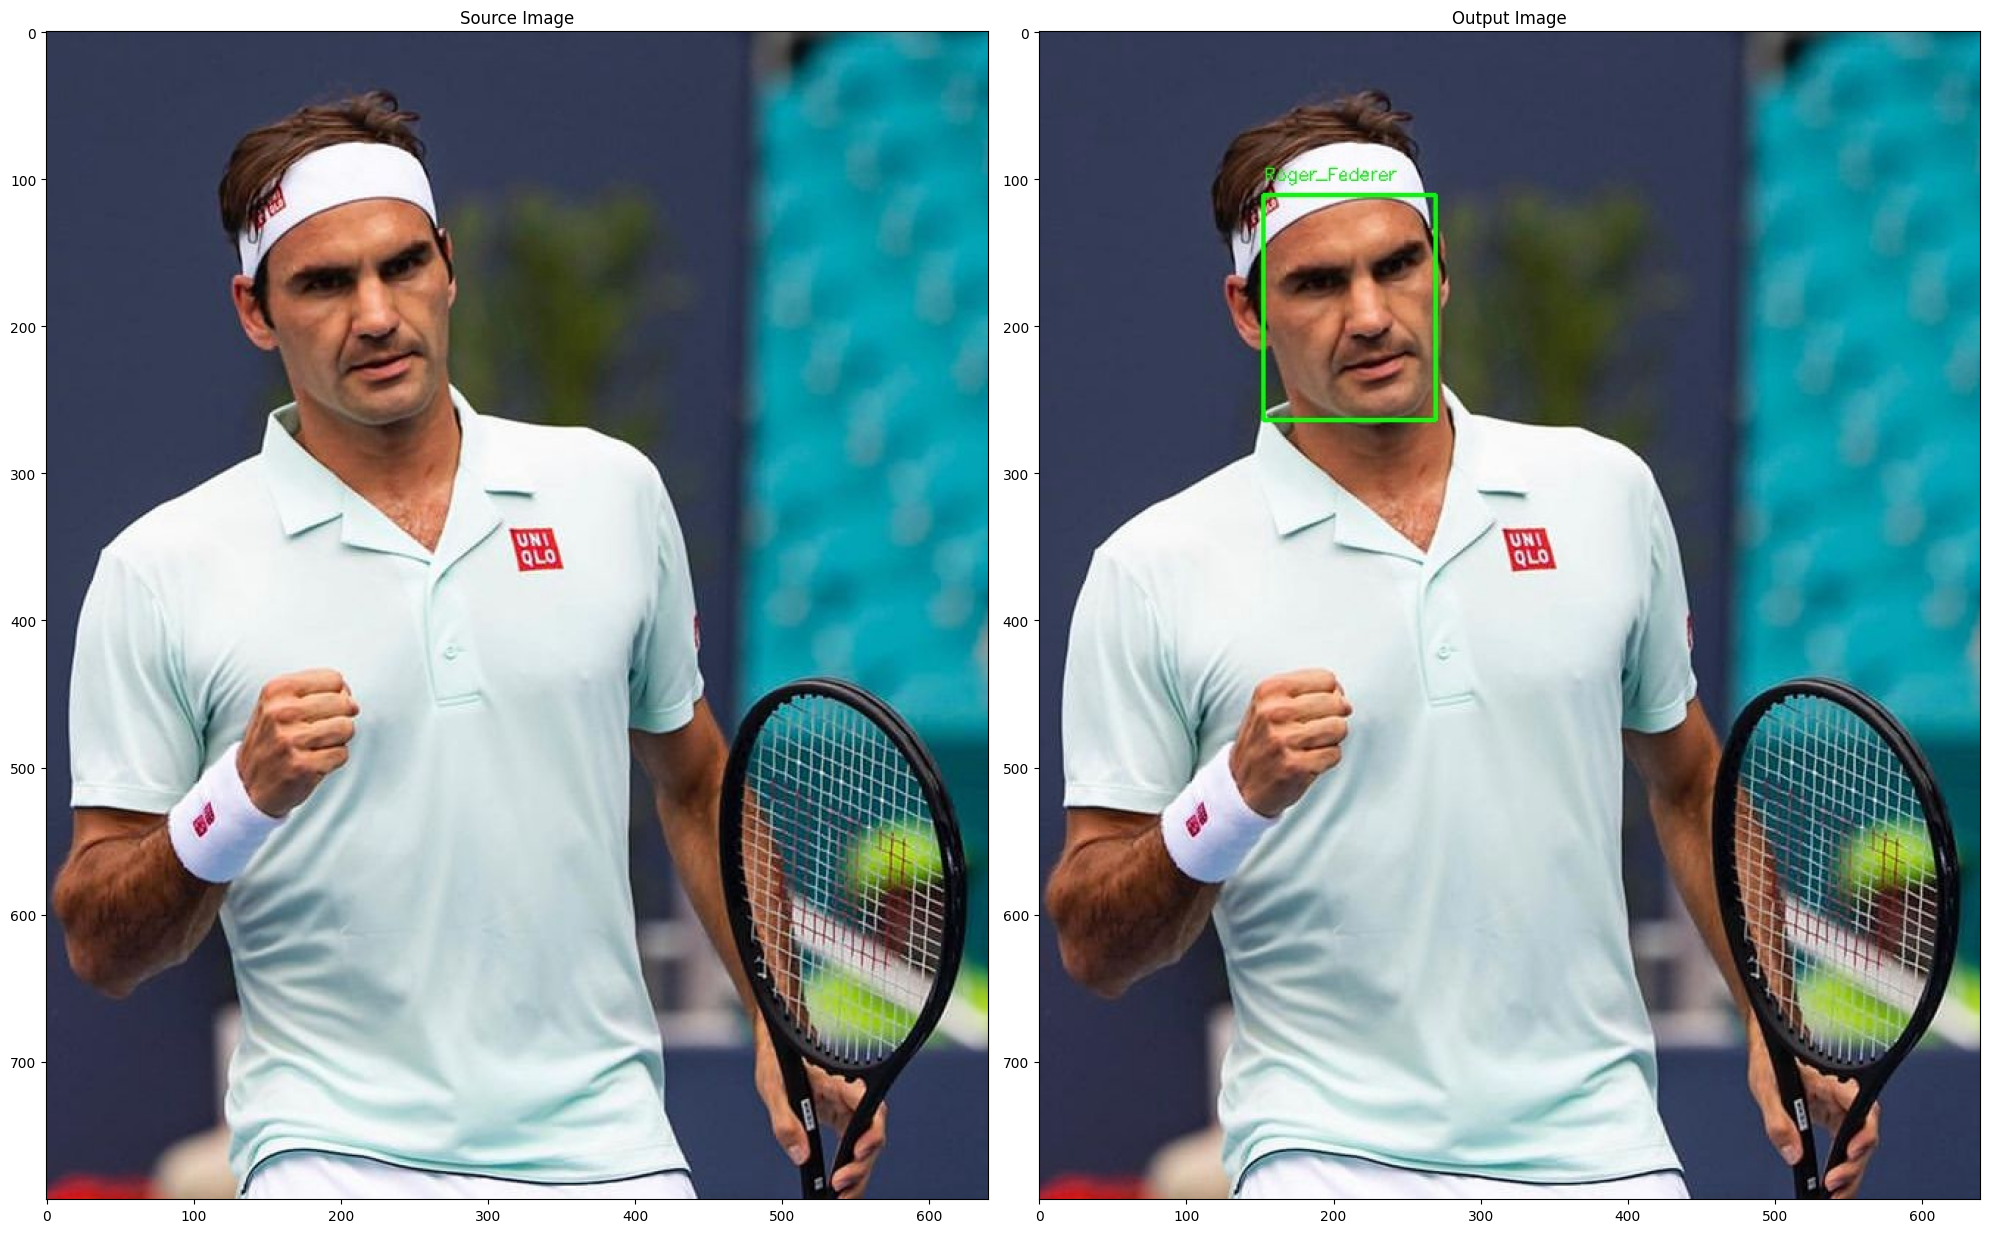

[{'box': (152, 111, 269, 264),
  'confidence': 0.634520024061203,
  'person': 'Roger_Federer'}]


In [15]:
path = "my_testing.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = fr.predict(path, threshold=0.3)
file_bytes = np.fromstring(base64.b64decode(result["frame"]), np.uint8)
output = cv2.imdecode(file_bytes,1)

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Source Image")
plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title("Output Image")
plt.tight_layout()
plt.show()


pprint(result["predictions"])